# The Data: Diabetes 130-US hospitals for years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

## Loading Data

Set pandas options:
+ Display max columns: 500
+ inf values are considered na

In [2]:
import pandas as pd
import numpy as np

In [3]:
# display options
pd.set_option('display.max_columns', 100)
pd.options.mode.use_inf_as_na = True
df = pd.read_csv('diabetic_data.csv')
print(df.shape)
df.head()

C:\Users\buiha\AppData\Local\Temp\ipykernel_17936\2048790284.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


(101766, 50)


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

## Data investigation

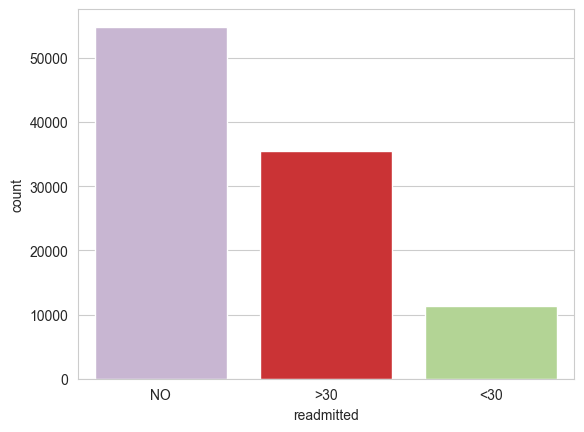

In [4]:
# plot the distribution of the target variable with bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='readmitted', data=df, palette='Paired_r',hue='readmitted')

plt.show()
# possible values for palette 

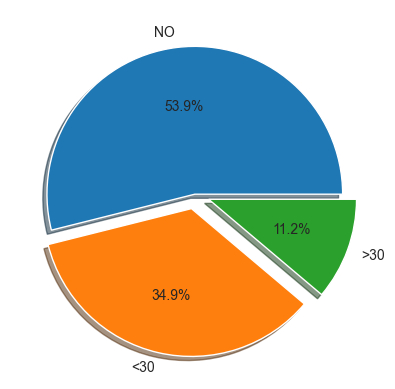

In [5]:
# plot using pie chart
plt.pie(df['readmitted'].value_counts(),labels=['NO','<30','>30'],autopct='%1.1f%%',shadow=True,explode=(0,0.1,0.1))
plt.show()

### We can see the class imbalance occurs here if we try to classify 3 classes, so we decide to just classify between readmitted (<30,>30) or not readmitted (No)

In [6]:
df['readmitted'].replace(['NO','<30','>30'],[0,1,1],inplace=True)
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0       NaN        No          No          No             No          No   
1       NaN        No          No          No             No          No   
2       NaN        No          No          No             No          No   
3       NaN        No          No          No             No          No   
4       NaN        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

### + Turn "?",'Unknown/Invalid','None','Not Mapped','Not Available' into np.nan for easier manipulation

In [7]:
# df.replace(['?','Unknown/Invalid','None','Not Mapped','Not Available'],np.nan,inplace=True)
# df.head()

FUNCTION TO SUMMARY DATA

In [8]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available']).sum()
    summary_df['missing%'] = (df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available']).sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df)


dtypes  missing#  missing%  unique   count
encounter_id               int64         0  0.000000  101766  101766
patient_nbr                int64         0  0.000000   71518  101766
race                      object      2273  0.022336       6  101766
gender                    object         3  0.000029       3  101766
age                       object         0  0.000000      10  101766
weight                    object     98569  0.968585      10  101766
admission_type_id          int64         0  0.000000       8  101766
discharge_disposition_id   int64         0  0.000000      26  101766
admission_source_id        int64         0  0.000000      17  101766
time_in_hospital           int64         0  0.000000      14  101766
payer_code                object     40256  0.395574      18  101766
medical_specialty         object     49949  0.490822      73  101766
num_lab_procedures         int64         0  0.000000     118  101766
num_procedures             int64         0  0.000000       7  101766
num_medications            int64         0  0.000000      75  101766
number_outpatient          int64         0  0.000000      39  101766
number_emergency           int64         0  0.000000      33  101766
number_inpatient           int64         0  0.000000      21  101766
diag_1                    object        21  0.000206     717  101766
diag_2                    object       358  0.003518     749  101766
diag_3                    object      1423  0.013983     790  101766
number_diagnoses           int64         0  0.000000      16  101766
max_glu_serum             object     96420  0.947468       3    5346
A1Cresult                 object     84748  0.832773       3   17018
metformin                 object         0  0.000000       4  101766
repaglinide               object         0  0.000000       4  101766
nateglinide               object         0  0.000000       4  101766
chlorpropamide            object         0  0.000000       4  101766
glimepiride               object         0  0.000000       4  101766
acetohexamide             object         0  0.000000       2  101766
glipizide                 object         0  0.000000       4  101766
glyburide                 object         0  0.000000       4  101766
tolbutamide               object         0  0.000000       2  101766
pioglitazone              object         0  0.000000       4  101766
rosiglitazone             object         0  0.000000       4  101766
acarbose                  object         0  0.000000       4  101766
miglitol                  object         0  0.000000       4  101766
troglitazone              object         0  0.000000       2  101766
tolazamide                object         0  0.000000       3  101766
examide                   object         0  0.000000       1  101766
citoglipton               object         0  0.000000       1  101766
insulin                   object         0  0.000000       4  101766
glyburide-metformin       object         0  0.000000       4  101766
glipizide-metformin       object         0  0.000000       2  101766
glimepiride-pioglitazone  object         0  0.000000       2  101766
metformin-rosiglitazone   object         0  0.000000       2  101766
metformin-pioglitazone    object         0  0.000000       2  101766
change                    object         0  0.000000       2  101766
diabetesMed               object         0  0.000000       2  101766
readmitted                 int64         0  0.000000       2  101766

max_glu_serum and A1Cresult have remarkable number of missing values, this is too much, we will delete these features

In [9]:
df.drop('max_glu_serum',axis=1,inplace=True)
df.drop('A1Cresult',axis=1,inplace=True)

### Now, we are going to look in detail what happens with all of our features. This will give us information when it comes to eliminating any features and handling missing values

Function to find percentage of readmission at any class in categorical feautures

In [10]:
def readmission_percentage(feature):
    percentage_list = []
    for i in df[feature].unique():
        percentage_list.append(len(df[ (df[feature] == i) & (df['readmitted'] == 1)]) / len(df[df[feature] == i]))
    return percentage_list

First, we gonna look at
+ encounter_id: Unique identifier of an encounter, every time patient go in hospital they have new encounter id
+ patient_nbr: Unique identifier of a patient, this is unique for any patient

In [11]:
# plot relation between encounter_id and patient_nbr using groupby, only show patient_nbr with more than 1 encounter_id
patient_encount_num = df.groupby(df['patient_nbr']).agg({'encounter_id':'count'}).sort_values(by='encounter_id',ascending=False)

# rename columns and reset index
patient_encount_num.rename(columns={'encounter_id':'encounter_num'},inplace=True)
patient_encount_num.reset_index(inplace=True)
patient_encount_num.head()

patient_visit_one = patient_encount_num[patient_encount_num['encounter_num'] == 1]
patient_visit_multi = patient_encount_num[patient_encount_num['encounter_num'] > 1]

print('Number of patients: ',len(patient_encount_num))
print('Number of patients with only one visit: ',len(patient_visit_one))
print('Number of patients with multiple visits: ',len(patient_visit_multi))

patient_encount_num.head()

Number of patients:  71518
Number of patients with only one visit:  54745
Number of patients with multiple visits:  16773


patient_nbr  encounter_num
0     88785891             40
1     43140906             28
2      1660293             23
3     23199021             23
4     88227540             23

In [12]:
# def for mapping encounter_num to patient_nbr in df
def map_encount_num(df):
    encounter_num_list = []
    for i in df['patient_nbr']:
        encounter_num_list.append(patient_encount_num[patient_encount_num['patient_nbr'] == i]['encounter_num'].values[0])
    df['encounter_num'] = encounter_num_list
    return encounter_num_list

map_encount_num(df)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 7,
 1,
 3,
 1,
 10,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 7,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 16,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 5,
 3,
 1,
 5,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 4,
 2,
 6,
 4,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1

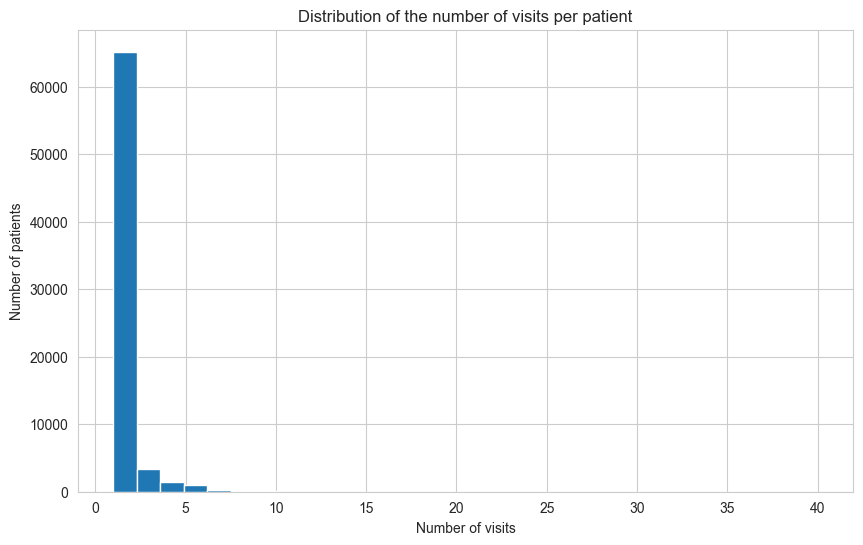

<Axes: xlabel='encounter_num', ylabel='count'>

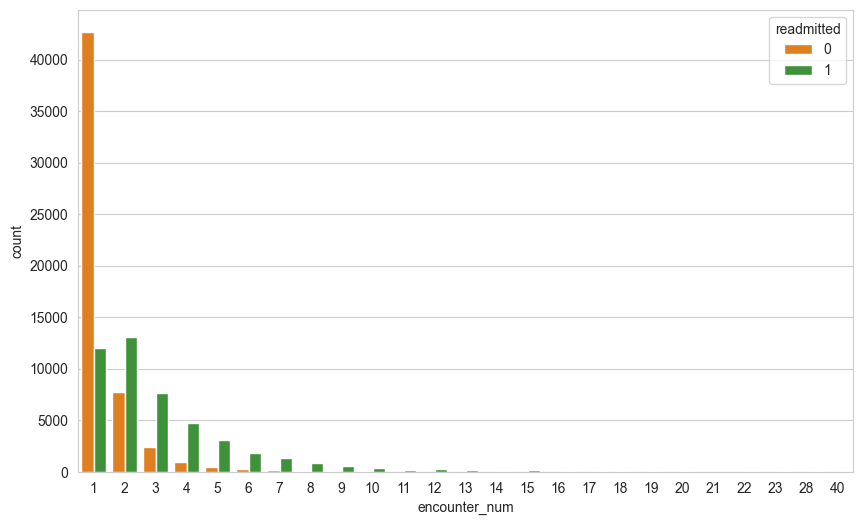

In [13]:
# plot the distribution of the number of visits per patient
# add readmitted column to patient_encount_num

plt.figure(figsize=(10,6))
plt.hist(patient_encount_num['encounter_num'],bins=30)
plt.xlabel('Number of visits')
plt.ylabel('Number of patients')
plt.title('Distribution of the number of visits per patient')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='encounter_num', hue='readmitted', data=df, palette='Paired_r')

# Customize the plot
# plt.title('Readmission by number of visits per patient')
# plt.xlabel('Number of visits')
# plt.ylabel('Count')
# plt.legend(title='number of visit', labels=['Not Readmitted', 'Readmitted'])
# plt.show()


In [14]:
# readmission percentage by number of visits per patient
df.head()


encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses metformin  \
0                 0  250.83       ?      ?                 1        No   
1                 0     276  250.01    255                 9        No   
2                 1     648     250    V27                 6        No   
3                 0       8  250.43    403                 7        No   
4                 0     197     157    250                 5        No   

  repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide  \
0          No          No             No          No            No        No   
1          No          No             No          No            No        No   
2          No          No             No          No            No    Steady   
3          No          No             No          No            No        No   
4          No          No             No          No            No    Steady   

  glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol  \
0        No          No           No            No       No       No   
1        No          No           No            No       No       No   
2        No          No           No            No       No       No   
3        No          No           No            No       No       No   
4        No          No           No            No       No       No   

  troglitazone tolazamide examide citoglipton insulin glyburide-metformin  \
0           No         No      No          No      No                  No   
1           No         No      No          No      Up                  No   
2           No         No      No          No      No                  No   
3           No         No      No          No      Up                  No   
4           No         No      No          No  Steady                  No   

  glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
0                  No                       No                      No   
1                  No                       No                      No   
2                  No                       No                      No   
3                  No                       No                      No   
4            

Text(0.5, 1.0, 'Readmission percentage by num_procedures')

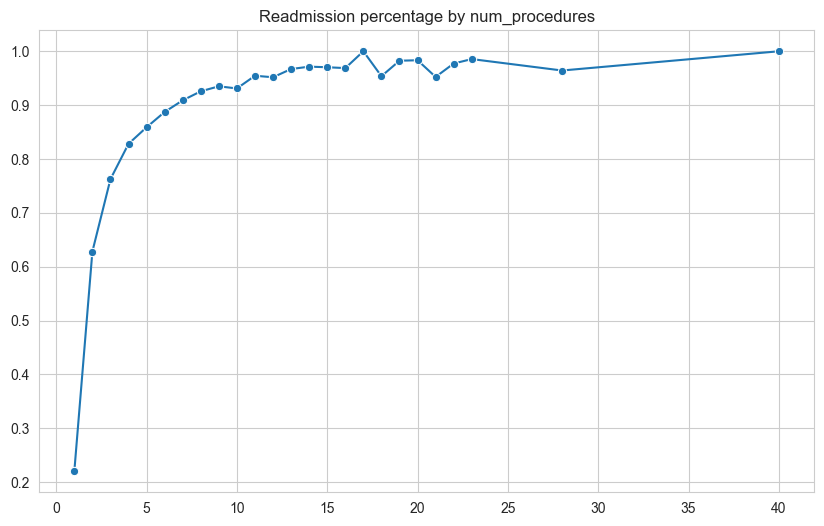

In [15]:
readmission_percentage('encounter_num')

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['encounter_num'].unique(),y=readmission_percentage('encounter_num'),marker='o')
plt.title('Readmission percentage by num_procedures')

+ Out of 71518 patients, we got 54745 patients who only visit 1 times
+ 16773 patients visit more than 1 times
+ The more visits a patient have, the more likely that that patient will be readmitted

### Next, we will consider "race" feature

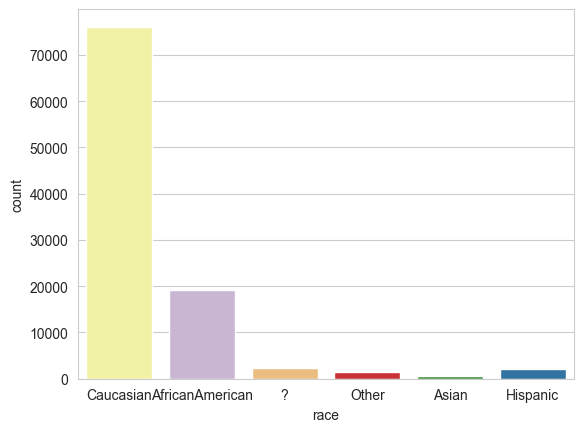

In [16]:
# plot the distribution of race types
sns.countplot(x='race', data=df, palette='Paired_r',hue='race')
plt.show()


+ We can see that Caucasian accounts for most of patients
+ Lots of "?" can be seen too.

But, "?" can be thought as missing values or "Other", because anyone must belongs to 1 race and it hardly that the staff hospital can not specify which race is the patient as those information is pretty clear, so we decide to set "?" as "Other" for "race" feature

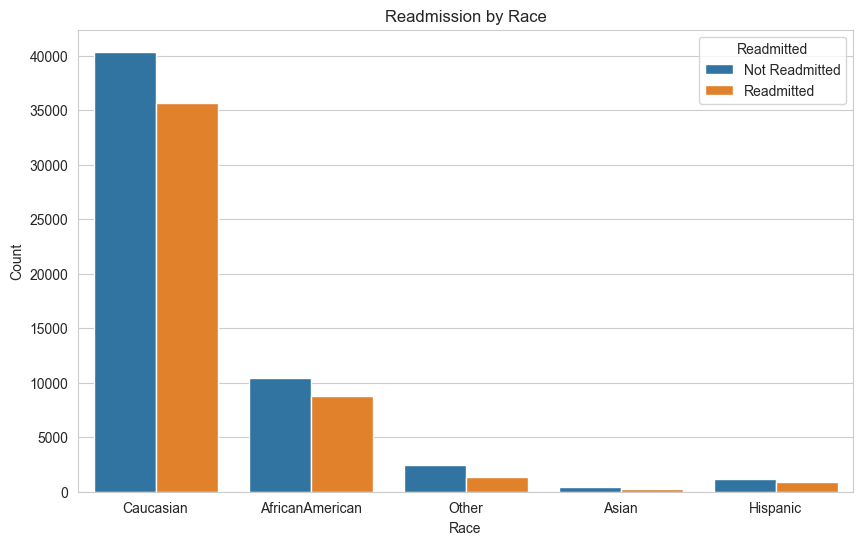

In [17]:
df['race'].replace('?','Other',inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=df)

# Customize the plot
plt.title('Readmission by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()


In [18]:
readmission_percentage('race')

[0.46933599653083485,
 0.4575221238938053,
 0.34850489547499336,
 0.35257410296411856,
 0.41924398625429554]

+ Readmitted rate and not readmitted rate for any race does not have much differences, so it might be that "race" does not have big impact on target variable.
+ Caucasian in The USA accounts for most of the population, that is why there is a bias toward this race, creating category imbalance
==> we will omit this feature

In [19]:
df.drop('race',axis=1,inplace=True)

### Next is for "gender" ,"age","weight"

We will look at gender to see if it has any impact

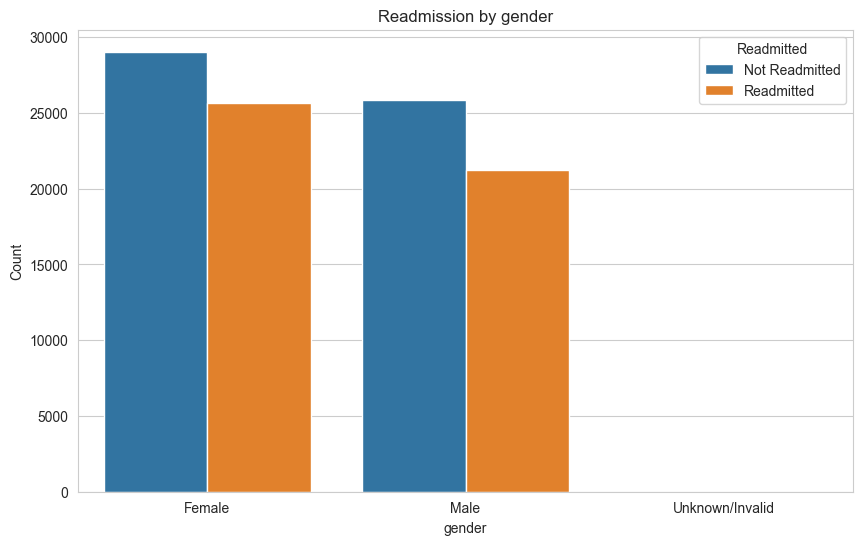

Percentage of female patients readmitted:  46.92 %
Percentage of female patients readmitted:  38.81 %


In [20]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='readmitted', data=df)

# Customize the plot
plt.title('Readmission by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])

plt.show()


# Percentage of female patients readmitted
per = len(df[ (df['gender'] == "Female") & (df['readmitted'] == 1)]) / len(df[df['gender'] == 'Female'])
print('Percentage of female patients readmitted: ',round(per*100,2),'%')


per = len(df[ (df['gender'] == "Male") & (df['readmitted'] == 1)]) / len(df[df['gender'] == 'Female'])
print('Percentage of female patients readmitted: ',round(per*100,2),'%')


+ Readmission rates for both gender are slightly balance, there are more female patient to be readmitted as well as not redmitted, this could be because the population in this data have more female. However, It is 46.92% female out of all female readmitted, this number for male is lower with 38.81%
==> possibly female are more likely to be readmitted


For age, we first want to look at all possible values of this features, because it is described as categorical whereas age is mostly number.

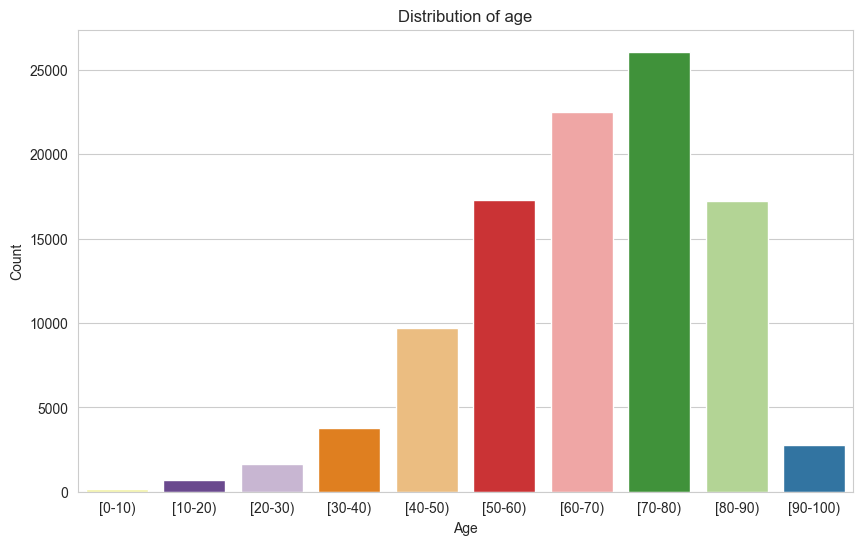

In [21]:
# plot the distribution of age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='age', data=df, palette='Paired_r')
plt.title('Distribution of age')

# Customize the plot
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


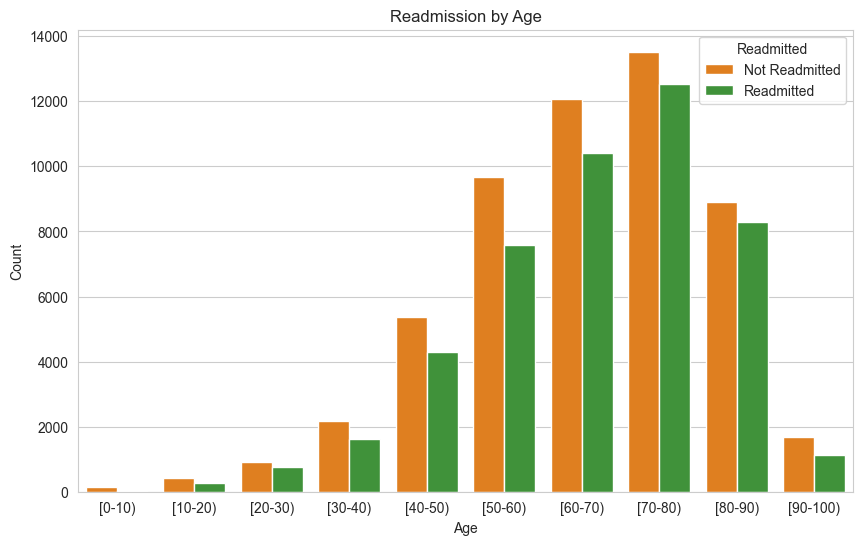

In [22]:
# Countplot for age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=df, palette='Paired_r')

# Customize the plot
plt.title('Readmission by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

In [23]:
readmission_percentage('age')

[0.18012422360248448,
 0.38205499276411,
 0.45021122510561257,
 0.4267549668874172,
 0.4445018069179143,
 0.4395572554473806,
 0.4625272428056754,
 0.48120300751879697,
 0.4827004710123859,
 0.4002864303616183]

+ Rate of not readmitted in this dataset are always higher than readmitted rate; The older the patient, the higher the risk that he/she will be readmitted

### Let see the readmission percentage at each age gap

In [24]:
percent_readmitted_age = []
for i in df['age'].unique():
    per = len(df[ (df['age'] == i) & (df['readmitted'] == 1)]) / len(df[df['age'] == i])
    percent_readmitted_age.append(per)

We see if "weight" has some hidden pattern to readmission


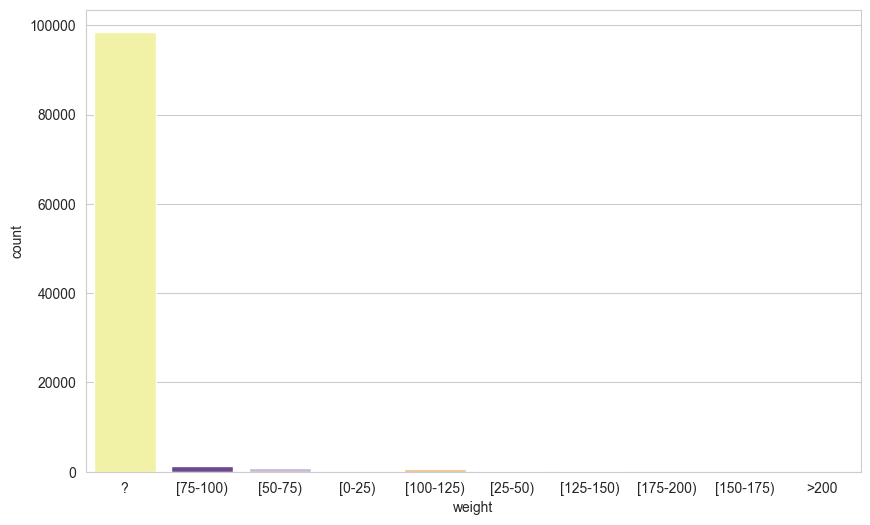

In [25]:
# plot the distribution of weight
plt.figure(figsize=(10, 6))
sns.countplot(x='weight', hue='weight', data=df, palette='Paired_r')
plt.show()

This feature has to many missing values, we will drop it.

In [26]:
df.drop('weight',axis=1,inplace=True)

## The next 3 features:
+ admission_type_id: 9 distinct values indicate types of admission
+ discharge_disposition_id: 29 distinct values indicate different reasons to discharge
+ admission_source_id: 21 distinct values indicates source of admission of patient

### admission_type

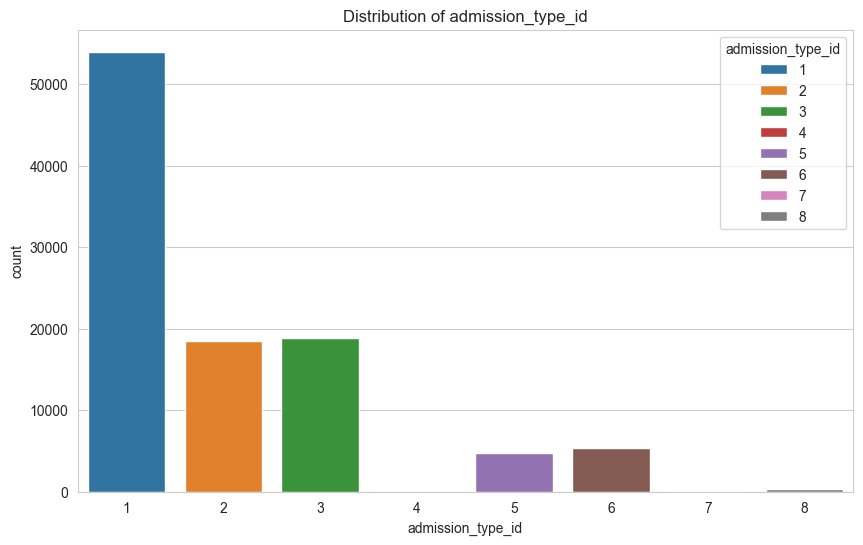

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [27]:
#plot the distribution of admission_type_id
plt.figure(figsize=(10, 6))

sns.countplot(x='admission_type_id', hue='admission_type_id', data=df, palette='tab10')
plt.title('Distribution of admission_type_id')
plt.show()

df['admission_type_id'].value_counts()

See them in relationship with readmitted

Text(0.5, 1.0, 'Readmission by admission_type_id')

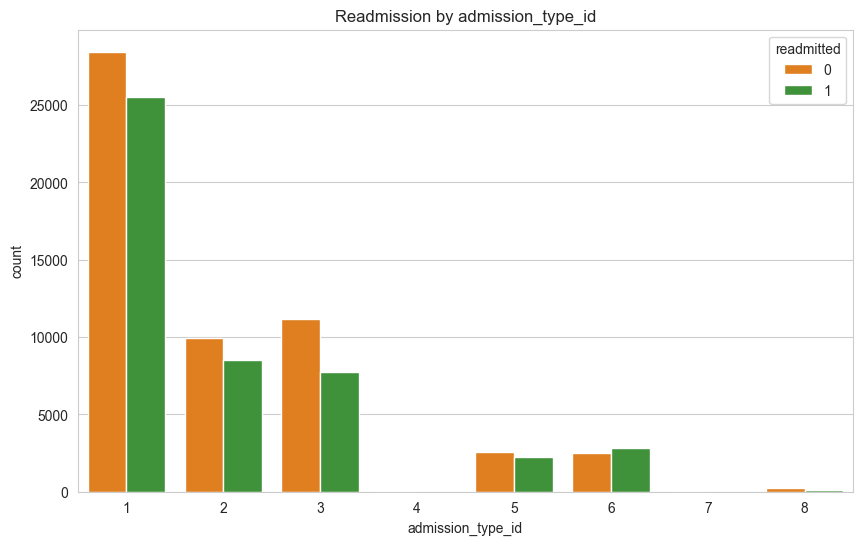

In [28]:
# plot to see the relation between admission_type_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by admission_type_id')


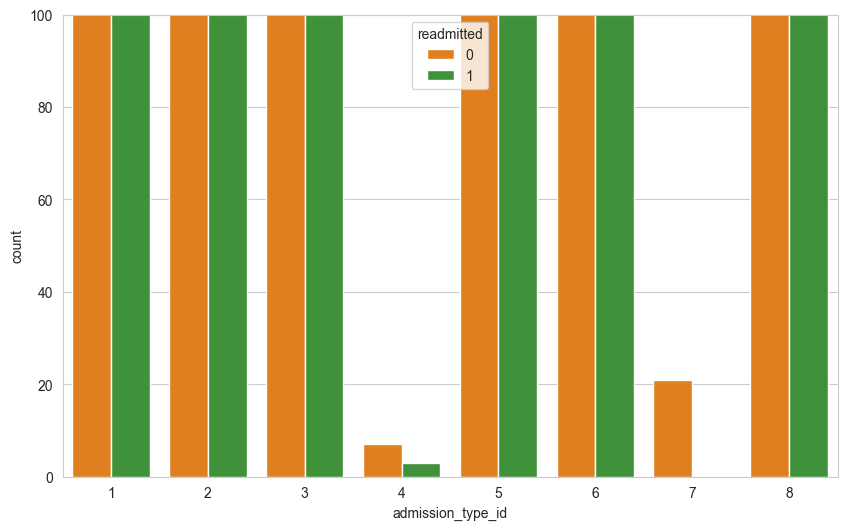

In [29]:
# zoom in to see bar that is too low
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='Paired_r')
plt.ylim(0, 100)
plt.show()

As we do not know what exactly mapping values for these categories, it is hard to say if this feature really have any impact or not.

### we will look at discharge_disposition_id and admission_source_id

Discharge_disposition_id

<Axes: xlabel='discharge_disposition_id', ylabel='count'>

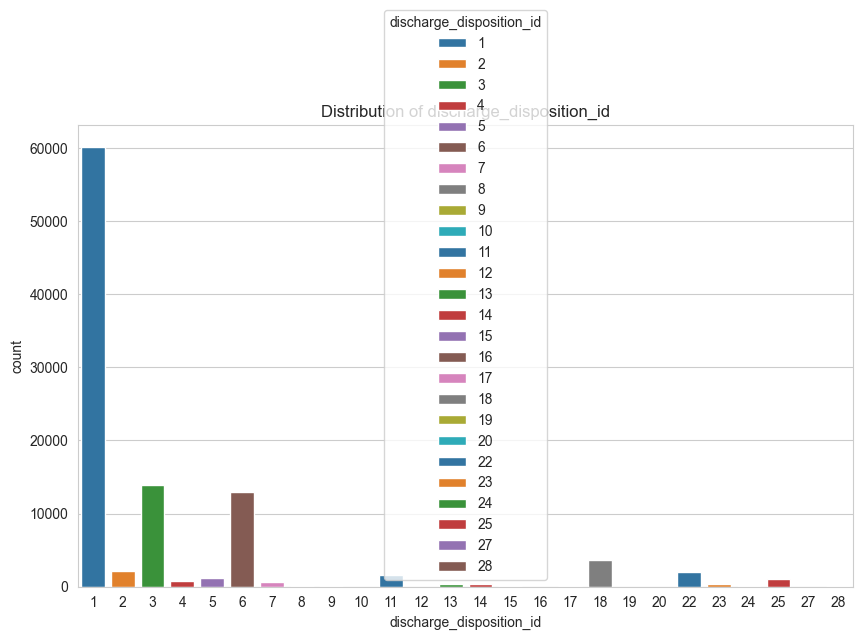

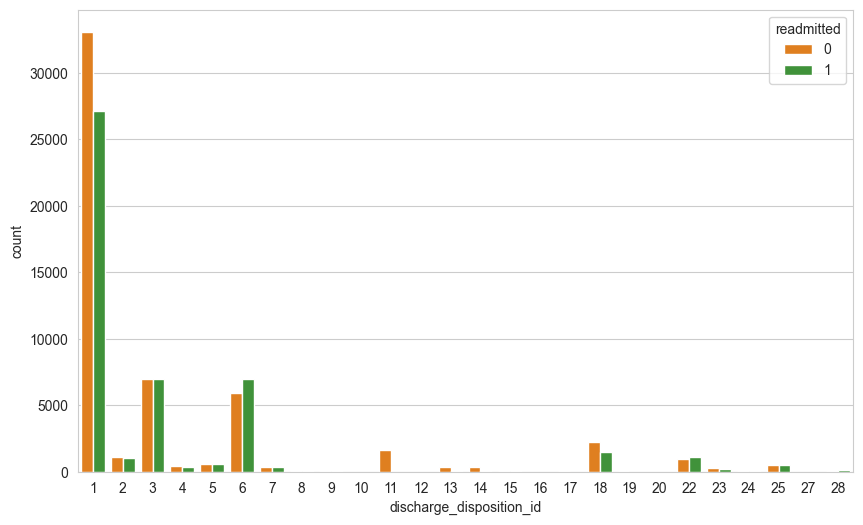

In [30]:
# plot the distribution of discharge_disposition_id
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='discharge_disposition_id', data=df, palette='tab10')
plt.title('Distribution of discharge_disposition_id')

# plot to see the relation between discharge_disposition_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df, palette='Paired_r')


Admission_source_id

<Axes: xlabel='admission_source_id', ylabel='count'>

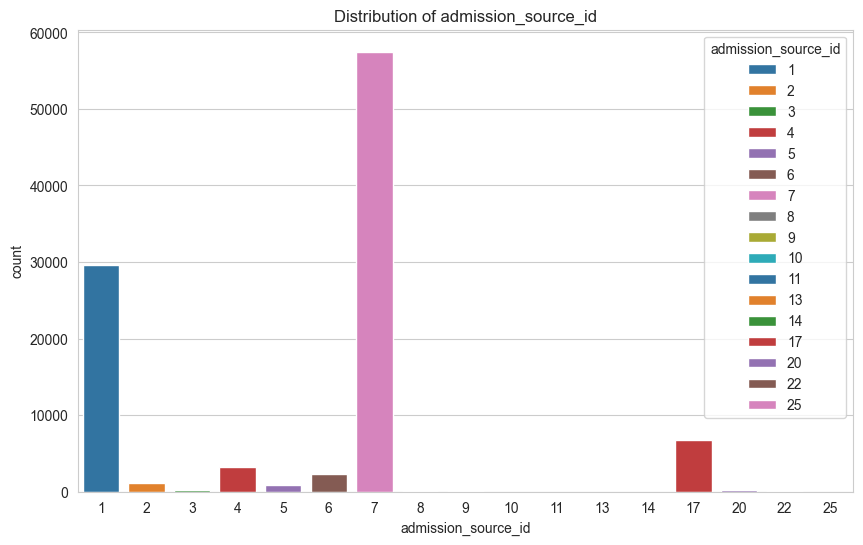

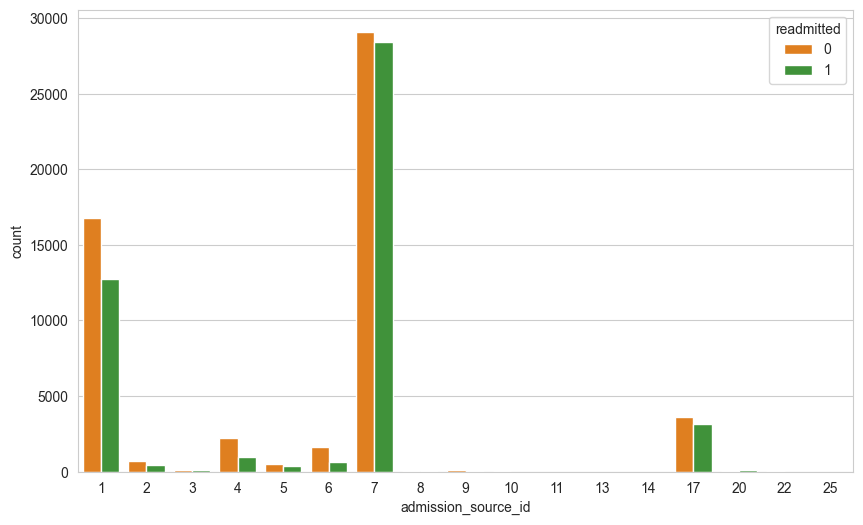

In [31]:
# plot the distribution of admission_source_id
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_source_id', hue='admission_source_id', data=df, palette='tab10')
plt.title('Distribution of admission_source_id')

# plot to see the relation between admission_source_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_source_id', hue='readmitted', data=df, palette='Paired_r')

These 3 features do not have exact mapping values so it is hard to say anything about them, we will leave them there.

## Analysis for
+ Time_in_hospital: time patient stayed in hospital
+ Payer_code, medical_specialty: we will leave them alone as these features have the same problem as admissuion_source_id

<Axes: xlabel='time_in_hospital', ylabel='count'>

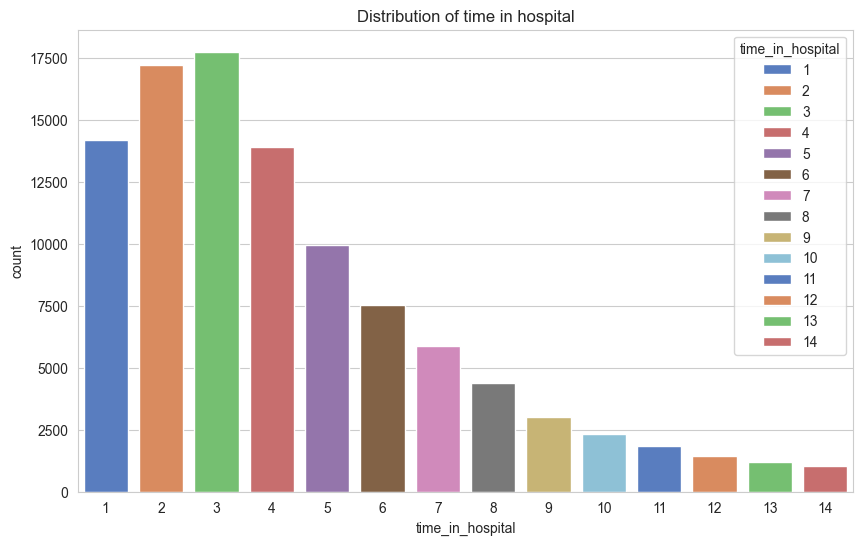

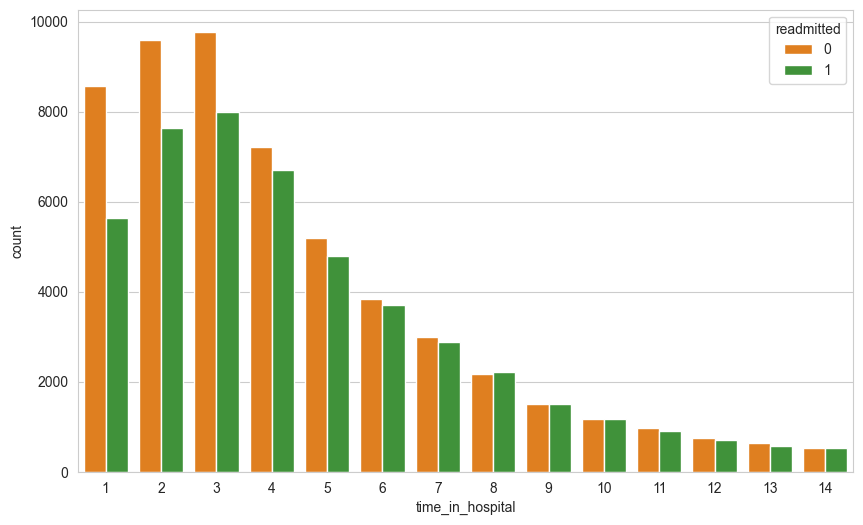

In [32]:
# plot the distribution of time_in_hospital
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='time_in_hospital', data=df, palette='muted')
plt.title('Distribution of time in hospital')

# plot to see the relation between time_in_hospital and readmitted, as histogram
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df, palette='Paired_r')



It is kinda hard to see any pattern as the distribution of readmission and not readmission rate is imbalance for all class in time_in_hospital.
So it is crucial that we see how readmission rate change by looking at percentage of readmission at each class of time_in_hospital

In [33]:
# percentage of patients readmitted by time_in_hospital
percent_readmitted_timeInHospital = []
for i in df['time_in_hospital'].unique():
    percent_readmitted_timeInHospital.append(len(df[(df['time_in_hospital'] == i) & (df['readmitted'] == 1)]) / len(df[df['time_in_hospital'] == i]))
percent_readmitted_timeInHospital


[0.39646677927927926,
 0.44936922730344675,
 0.44304458894565724,
 0.4817581154840563,
 0.48013245033112584,
 0.47107438016528924,
 0.4910220994475138,
 0.5033311125916056,
 0.4906980713432326,
 0.5012809564474808,
 0.49131184507229075,
 0.48194070080862533,
 0.5042131632885447,
 0.4923224568138196]

### ==> It is possible that the more time in hospital the higher rate of readmission, We also see that the gap between orange bar for (not readmitted) and green bar (readmitted) getting smaller as time_in_hospital increase

The majority of patients spent from 1-4 days in hospital. It could be that

### Payer code and Medical_specialty

+ Payer_code represent type of payment
+ Medical_specialty refers to type of a specialty of the admitting physician
==> Let's plot them down

Text(0.5, 1.0, 'Distribution of payer_code')

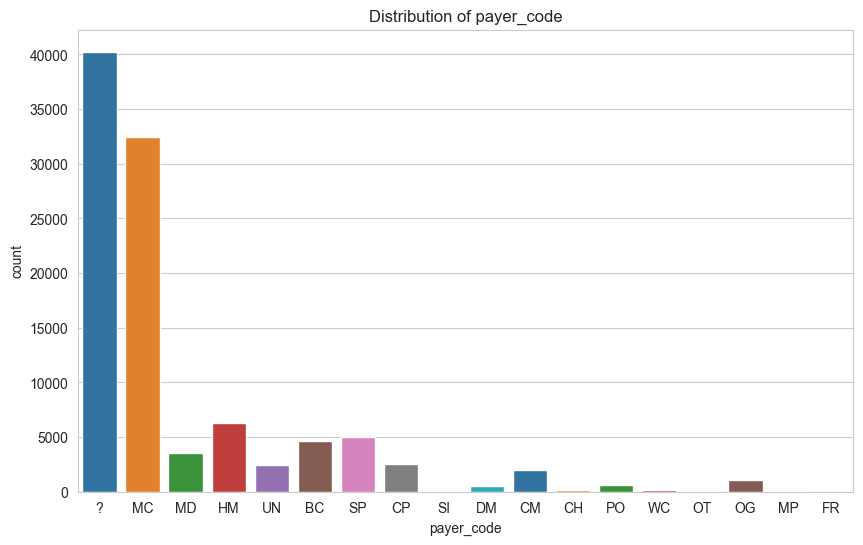

In [34]:
#plot the distribution of payer_code
plt.figure(figsize=(10, 6))
sns.countplot(x='payer_code', hue='payer_code', data=df, palette='tab10')
plt.title('Distribution of payer_code')


Logically, how one patient pay for their hospitalization does not really tell if that patient will be readmitted or not. Plus, number of missing values here in this feature accounts for >30% overall. We'd rather not use this feature

In [35]:
df.drop('payer_code',axis=1,inplace=True)

### Medical_Specialty

Text(0.5, 1.0, 'Distribution of medical_specialty')

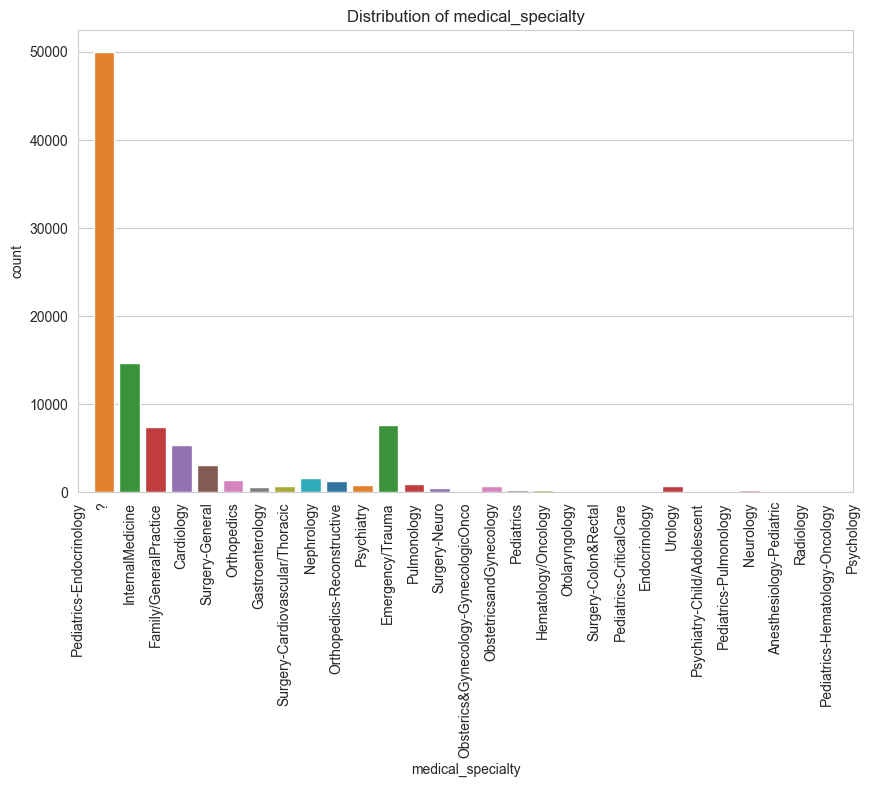

In [36]:
#plot the distribution of medical_specialty
plt.figure(figsize=(10, 6))
sns.countplot(x='medical_specialty', hue='medical_specialty', data=df, palette='tab10')
plt.xticks(rotation=90)
plt.xlim(0, 30)
plt.title('Distribution of medical_specialty')

This information of medical specialty might be a very predictive feature as patients with certain medical specialty could be more likely to be readmitted; however, Missing values are too much in this feature. ==> Not use this

In [37]:
df.drop('medical_specialty',axis=1,inplace=True)   

### num_lab_procedures, num_procedures, num_medications

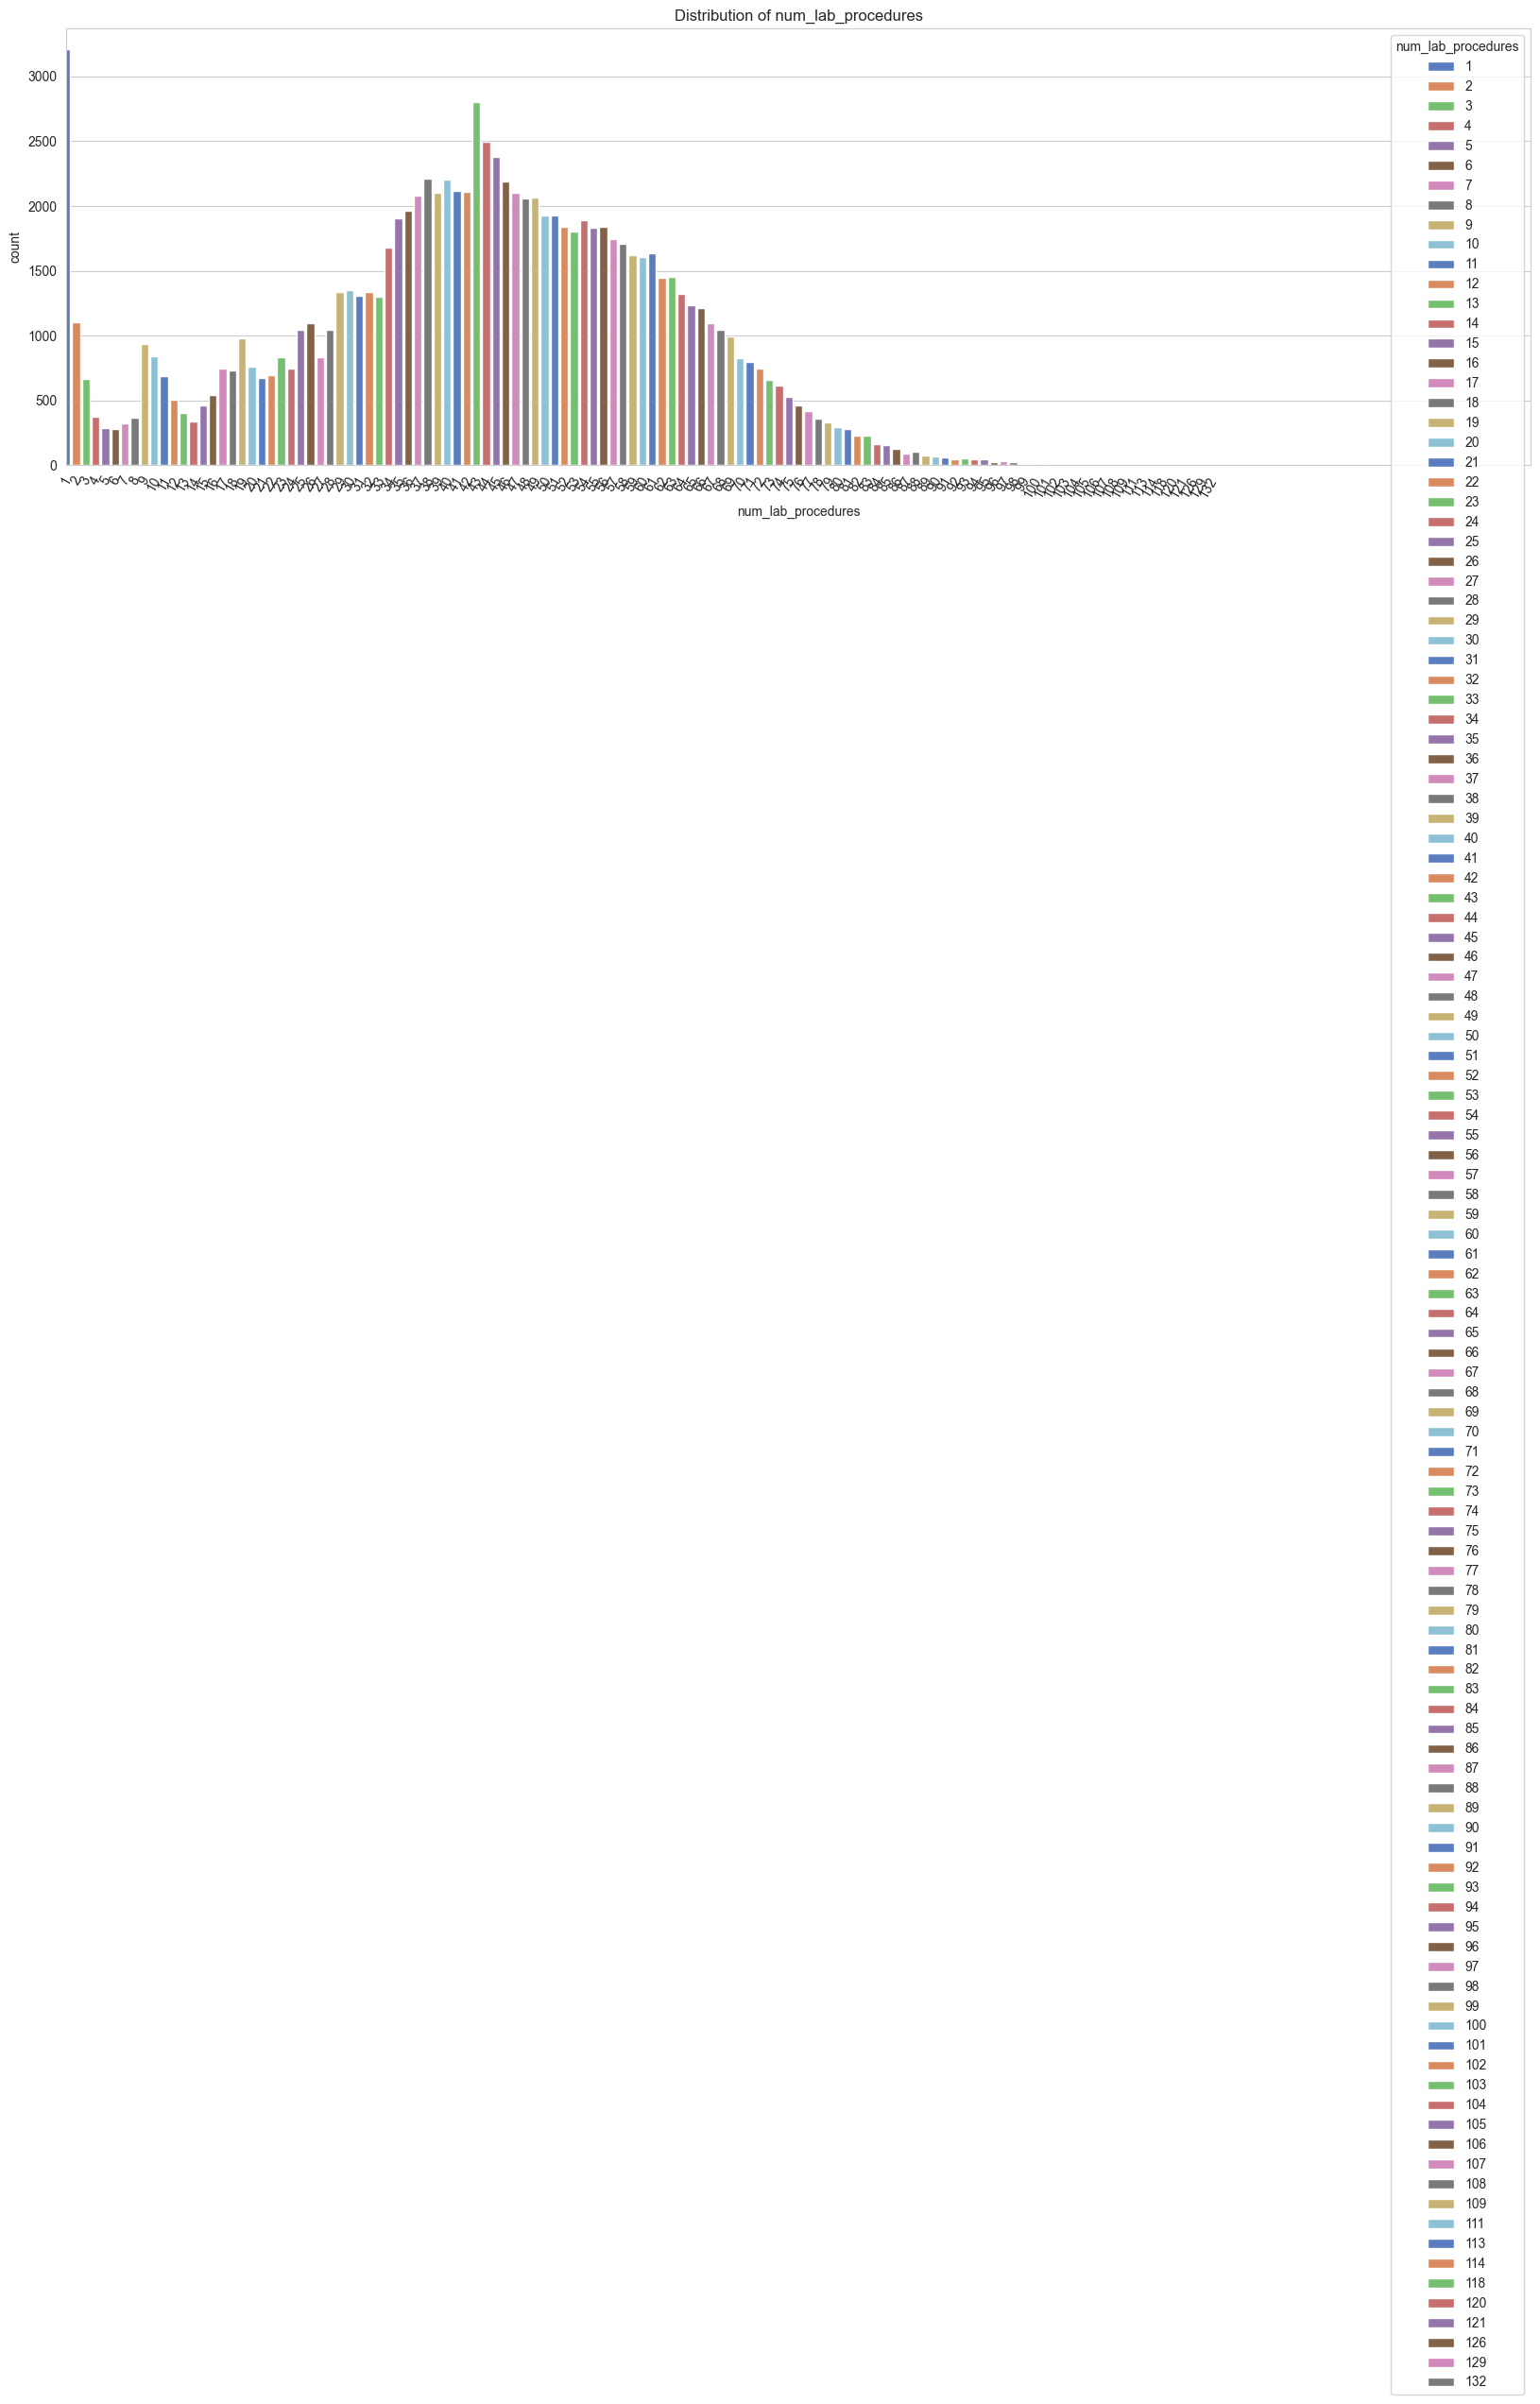

<Figure size 2000x600 with 0 Axes>

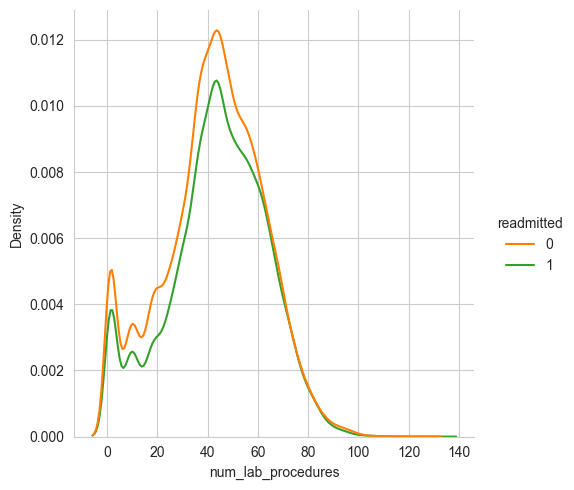

In [38]:
#plot the distribution of num_lab_procedures
plt.figure(figsize=(20, 6))
sns.countplot(x='num_lab_procedures', hue='num_lab_procedures', data=df, palette='muted')
plt.xticks(rotation=60)
plt.xlim(0, 150)
plt.title('Distribution of num_lab_procedures')

plt.figure(figsize=(20, 6))
sns.displot(x='num_lab_procedures', hue='readmitted', data=df, palette='Paired_r',kind='kde')


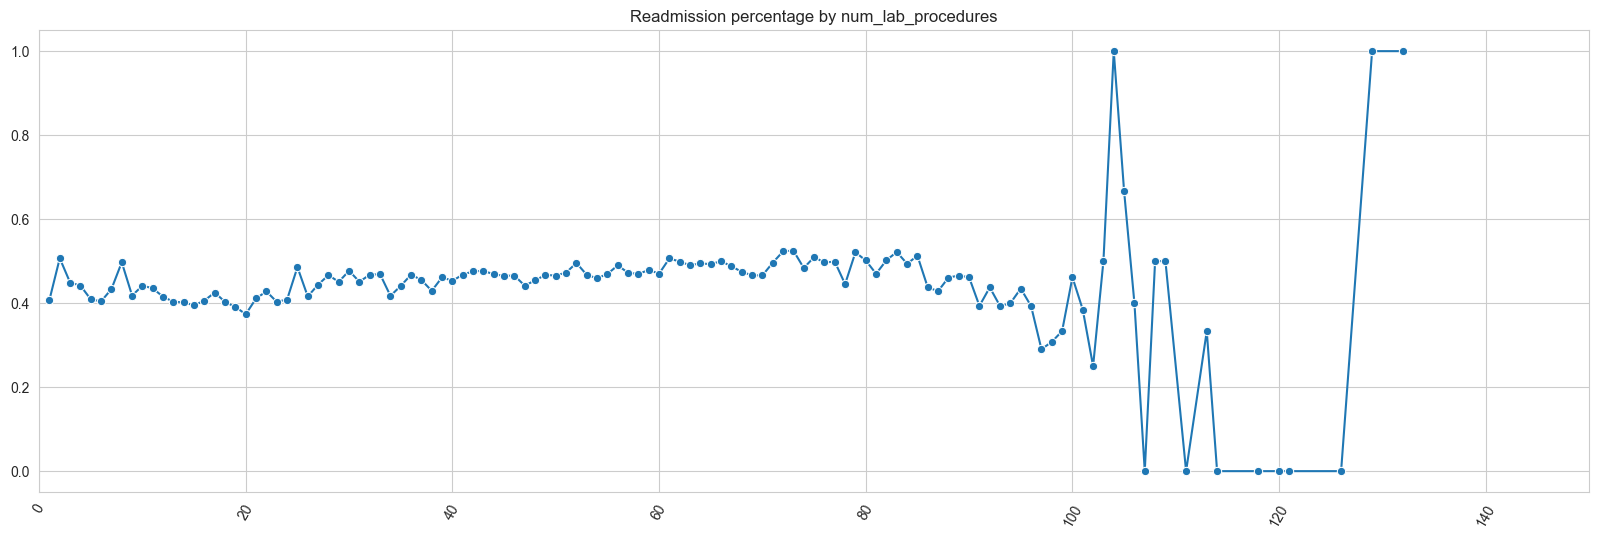

In [39]:
# Readmission percentage by num_lab_procedures
readmission_percentage('num_lab_procedures')

#plot readmission percentage
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['num_lab_procedures'].unique(),y=readmission_percentage('num_lab_procedures'),marker='o')
plt.xticks(rotation=60)
plt.xlim(0, 150)
plt.title('Readmission percentage by num_lab_procedures')
plt.show()

Actually, number of lab procedures varies strongly but it does not have any clear pattern. Except for some certain value where readmission rate is at peak. Based on this, we see that this feature might not be potential for predicting. We will omit it.

In [40]:
df.drop('num_lab_procedures',axis=1,inplace=True)

### num_procedures

Text(0.5, 1.0, 'Readmission by num_procedures')

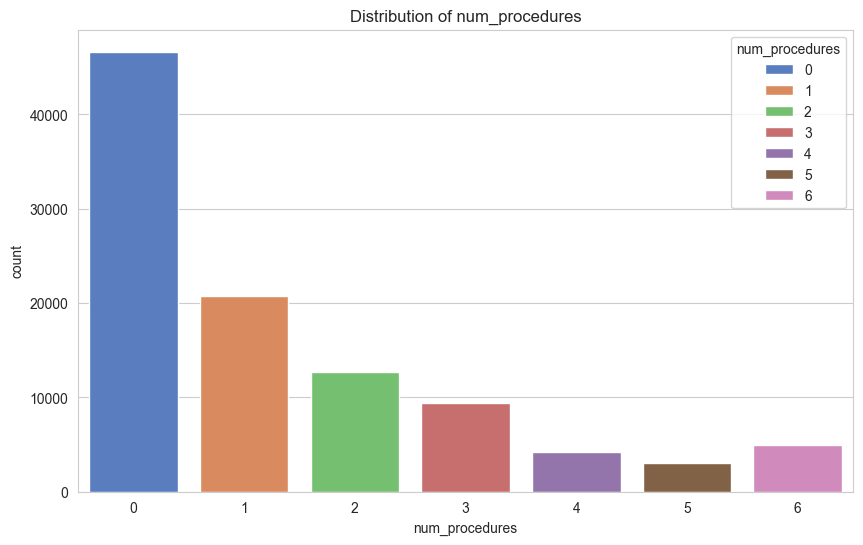

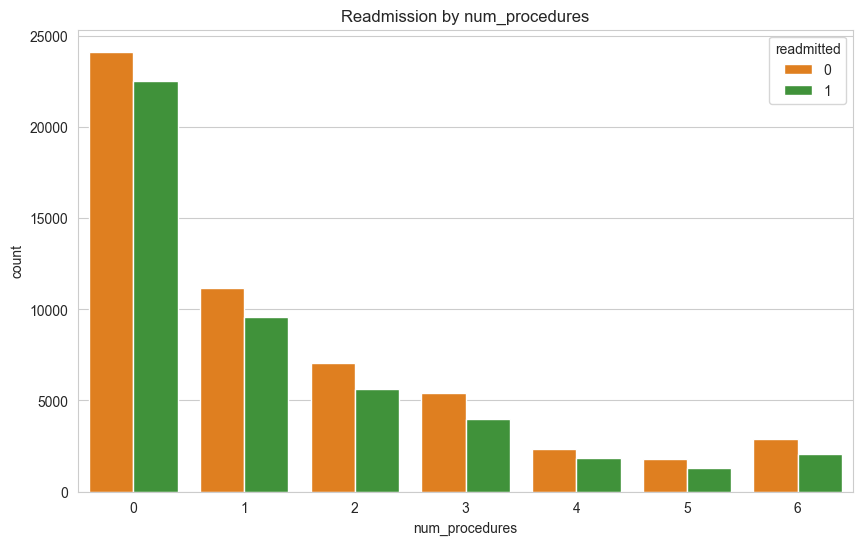

In [41]:
#plot the distribution of num_procedures
plt.figure(figsize=(10, 6))
sns.countplot(x='num_procedures', hue='num_procedures', data=df, palette='muted')
plt.title('Distribution of num_procedures')

plt.figure(figsize=(10, 6))
sns.countplot(x='num_procedures', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by num_procedures')


Text(0.5, 1.0, 'Readmission percentage by num_procedures')

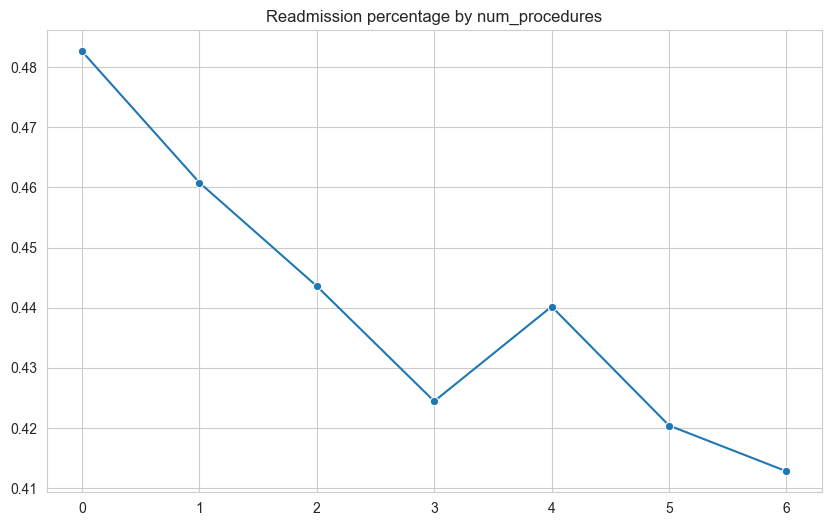

In [42]:
# readmission percentage by num_procedures
readmission_percentage('num_procedures')

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['num_procedures'].unique(),y=readmission_percentage('num_procedures'),marker='o')
plt.title('Readmission percentage by num_procedures')

The readmission rate actually goes down, so we will keep this.

### num_medications

Text(0.5, 1.0, 'Distribution of num_medications over readmission')

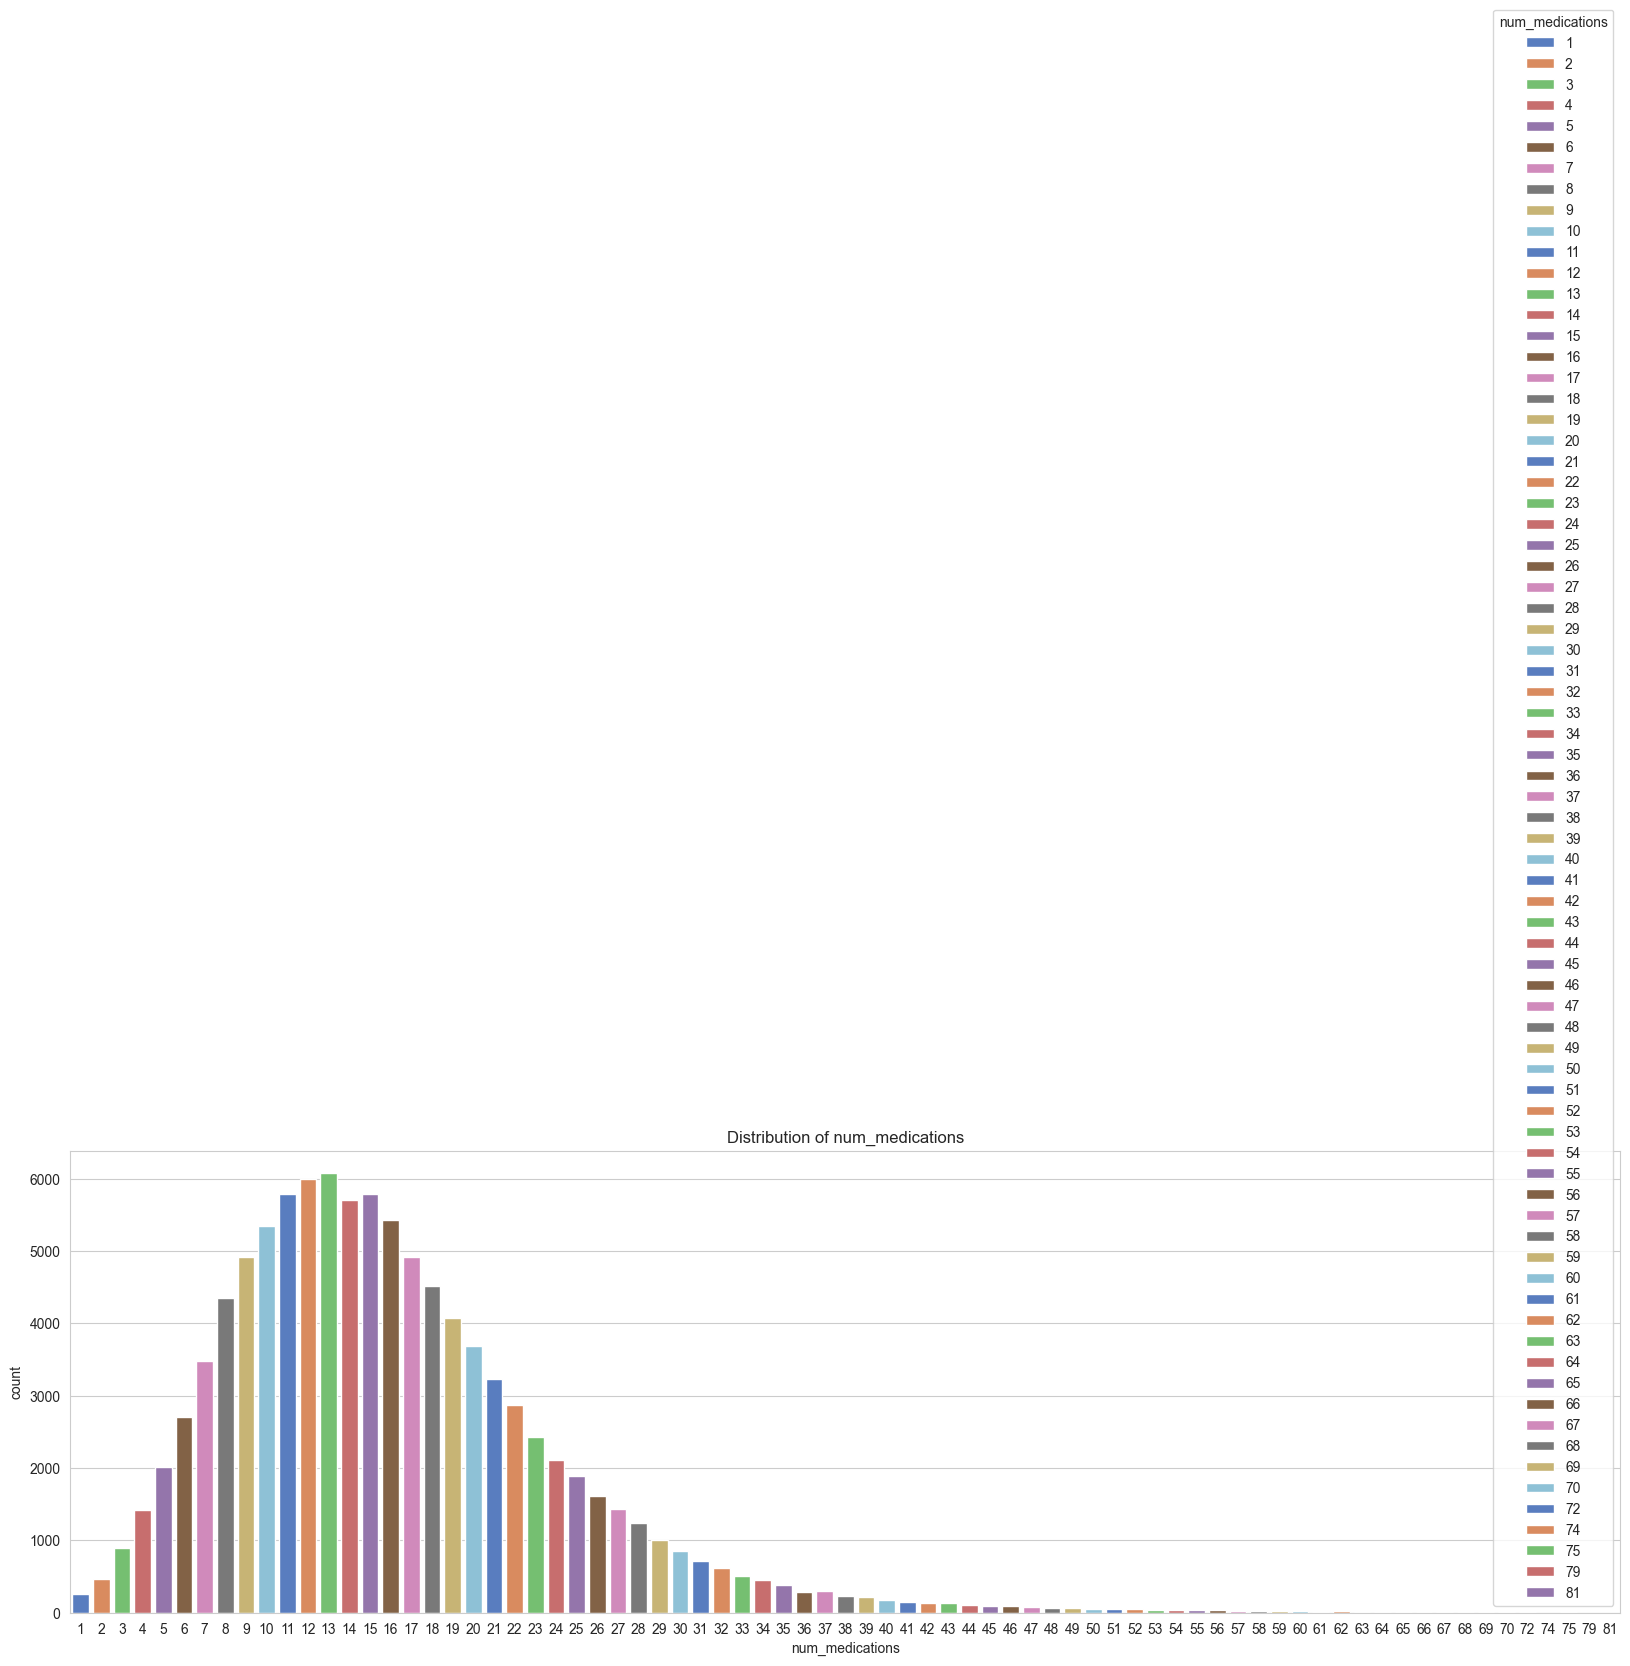

<Figure size 2000x600 with 0 Axes>

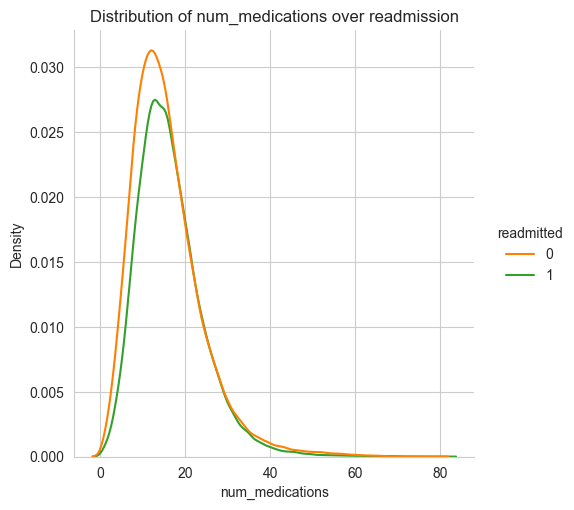

In [43]:
#plot the distribution of num_medications
plt.figure(figsize=(20, 6))
sns.countplot(x='num_medications', hue='num_medications', data=df, palette='muted')
plt.title('Distribution of num_medications')

plt.figure(figsize=(20, 6))
sns.displot(x='num_medications', hue='readmitted', data=df, palette='Paired_r',kind='kde')
plt.title('Distribution of num_medications over readmission')




[0.31679389312977096, 0.5051956665929692, 0.4751889582648702, 0.4953959484346225, 0.4063864001837813, 0.5148606811145511, 0.46319120586275814, 0.49472830494728304, 0.48953039235616996, 0.45297670405522, 0.48152624309392267, 0.5112359550561798, 0.30851063829787234, 0.5024732069249794, 0.49852869053457577, 0.39351320321469574, 0.5050121918179356, 0.46749605747327844, 0.43060231949120836, 0.4895397489539749, 0.42397720333808264, 0.4993016759776536, 0.4952330508474576, 0.34932956951305577, 0.47030497592295345, 0.3771767321230085, 0.46996466431095407, 0.5024875621890548, 0.514461830251304, 0.4503968253968254, 0.3406048587010411, 0.37799043062200954, 0.30444444444444446, 0.507, 0.35714285714285715, 0.43575418994413406, 0.41304347826086957, 0.4246575342465753, 0.4425087108013937, 0.46799116997792495, 0.5077319587628866, 0.32727272727272727, 0.33858267716535434, 0.375, 0.4232081911262799, 0.20930232558139536, 0.4780701754385965, 0.4431818181818182, 0.24242424242424243, 0.2777777777777778, 0.37

Text(0.5, 1.0, 'Readmission percentage by num_medications')

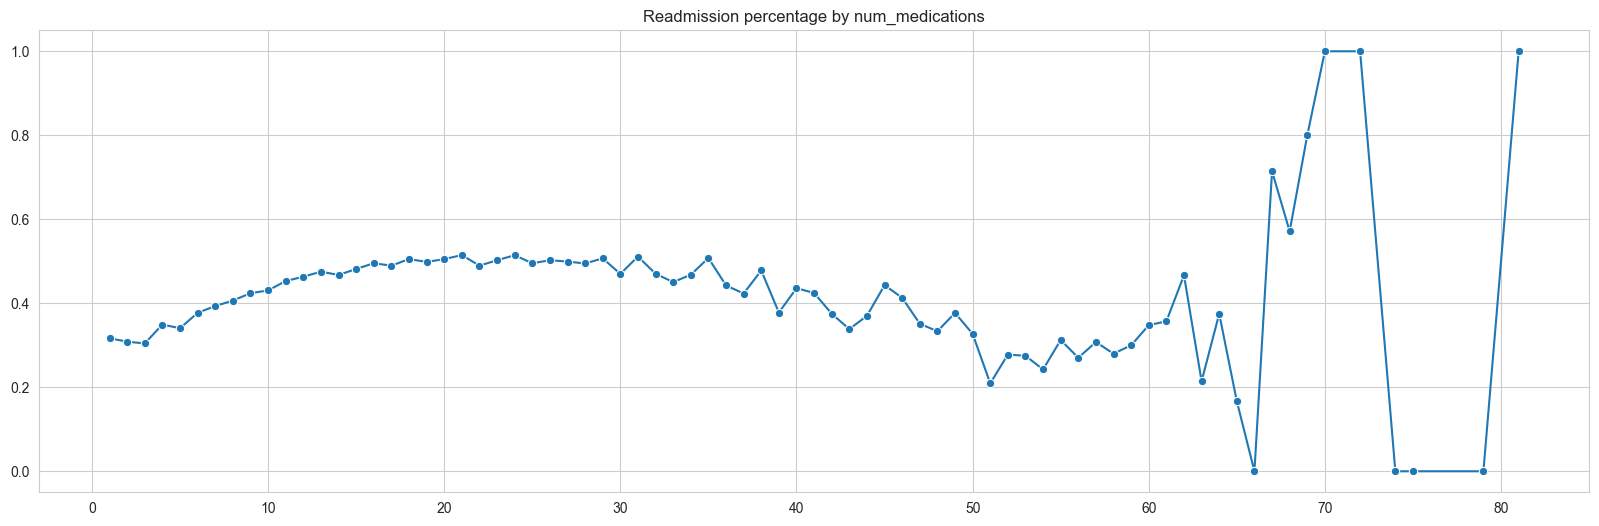

In [44]:
# readmission percentage by num_medications
print(readmission_percentage('num_medications'))

#plot line plot
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['num_medications'].unique(),y=readmission_percentage('num_medications'),marker='o')
plt.title('Readmission percentage by num_medications')

This feature has the same problem with num_lab_procedures. We do not use this.

In [45]:
df.drop('num_medications',axis=1,inplace=True)

### number_outpatient, number_emergency, number_inpatient

number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

Text(0.5, 1.0, 'Readmission by number_outpatient')

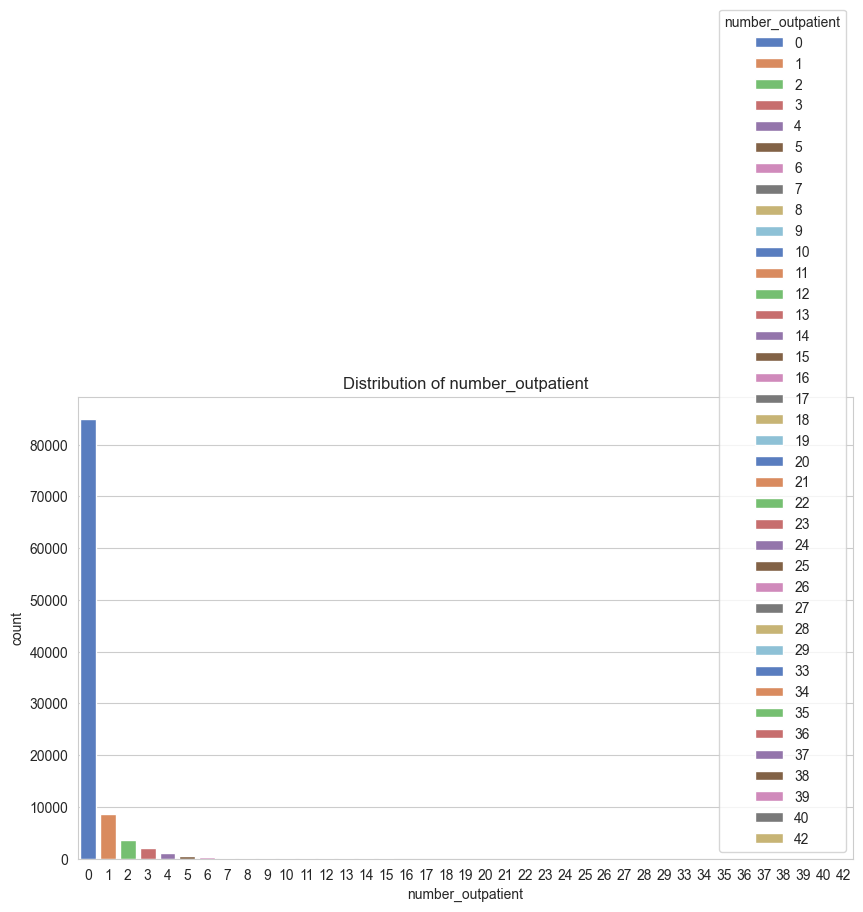

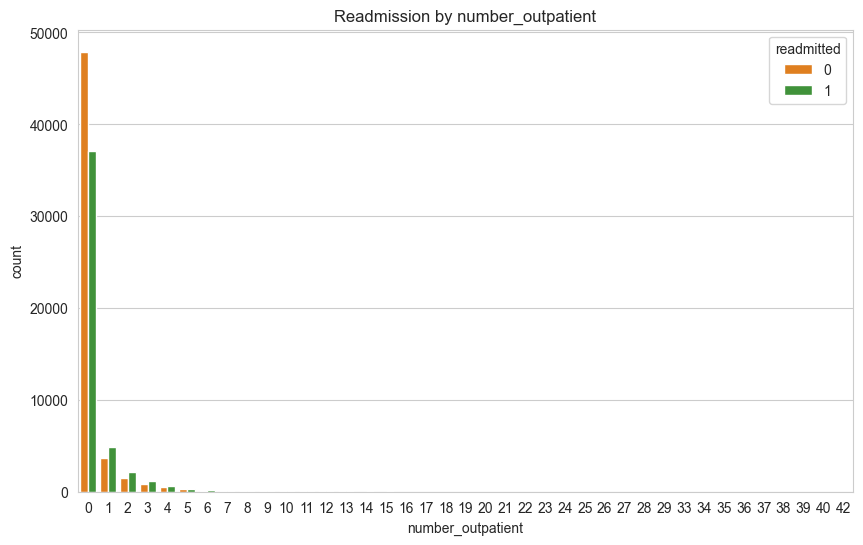

In [46]:
#plot the distribution of number_outpatient
plt.figure(figsize=(10, 6))
sns.countplot(x='number_outpatient', hue='number_outpatient', data=df, palette='muted')
plt.title('Distribution of number_outpatient')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_outpatient', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_outpatient')

[0.43650840321309703, 0.6010016694490818, 0.5737685737685738, 0.574108818011257, 0.6903225806451613, 0.6144578313253012, 0.5744368266405485, 0.45918367346938777, 0.5878070973612375, 0.7, 0.7142857142857143, 0.6402640264026402, 0.5714285714285714, 0.8, 0.7017543859649122, 0.6451612903225806, 0.7857142857142857, 0.5333333333333333, 0.5714285714285714, 0.5, 0.5, 0.5, 0.5, 0.8, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_outpatient')

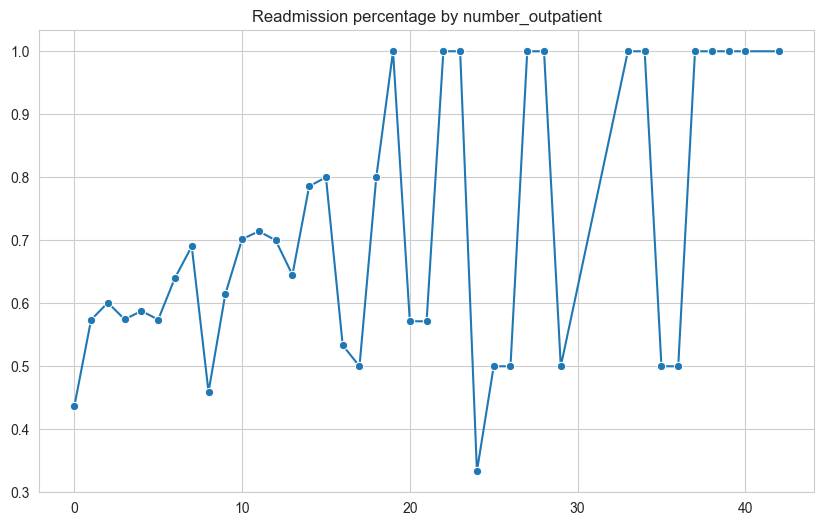

In [47]:
# readmission percentage by number_outpatient
print(readmission_percentage('number_outpatient'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_outpatient'].unique(),y=readmission_percentage('number_outpatient'),marker='o')
plt.title('Readmission percentage by number_outpatient')

The values in this line plot fluctuates a lot; But different from the one of num_medications, most high values of number_outpatient have high readmission rate except for some outliers, we will process those later. So we will use this.

### number_emergency

Text(0.5, 1.0, 'Readmission by number_emergency')

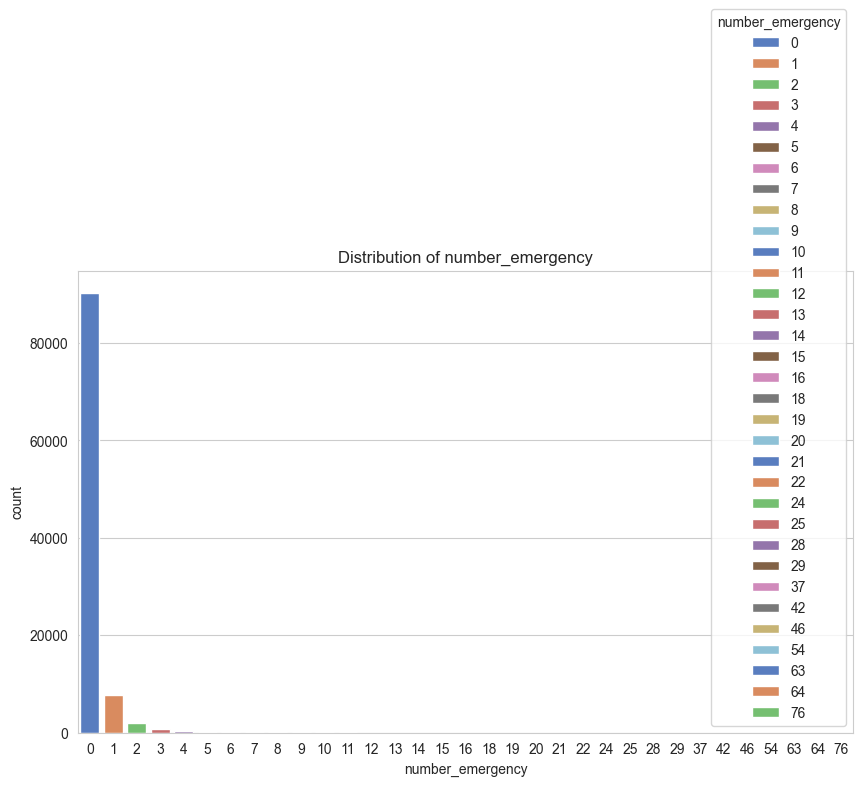

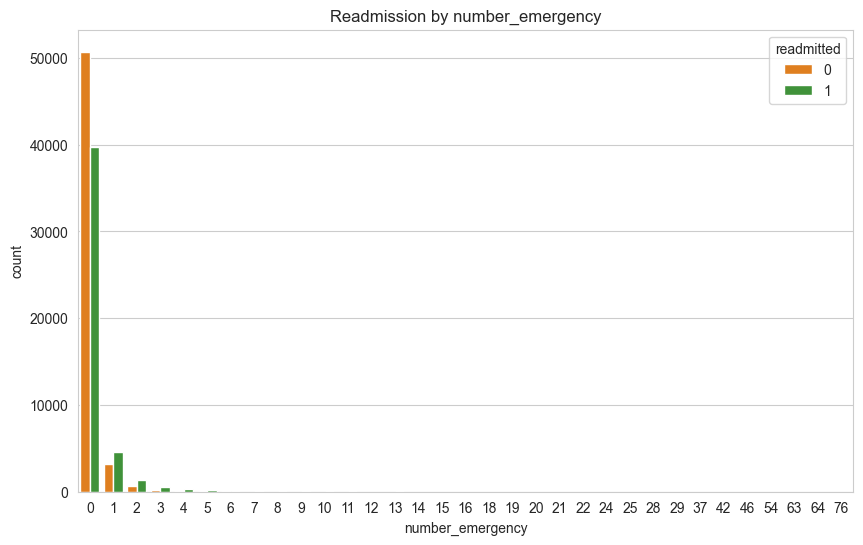

In [48]:
#plot the distribution of number_emergency
plt.figure(figsize=(10, 6))
sns.countplot(x='number_emergency', hue='number_emergency', data=df, palette='muted')
plt.title('Distribution of number_emergency')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_emergency', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_emergency')

[0.43894316409059225, 0.592939950501498, 0.6709108716944172, 0.8155080213903744, 0.7186206896551725, 0.9090909090909091, 0.8020833333333334, 0.9041095890410958, 0.8404255319148937, 0.82, 1.0, 0.0, 1.0, 0.9166666666666666, 1.0, 0.8, 0.8695652173913043, 1.0, 1.0, 0.6666666666666666, 1.0, 0.8, 1.0, 0.75, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_emergency')

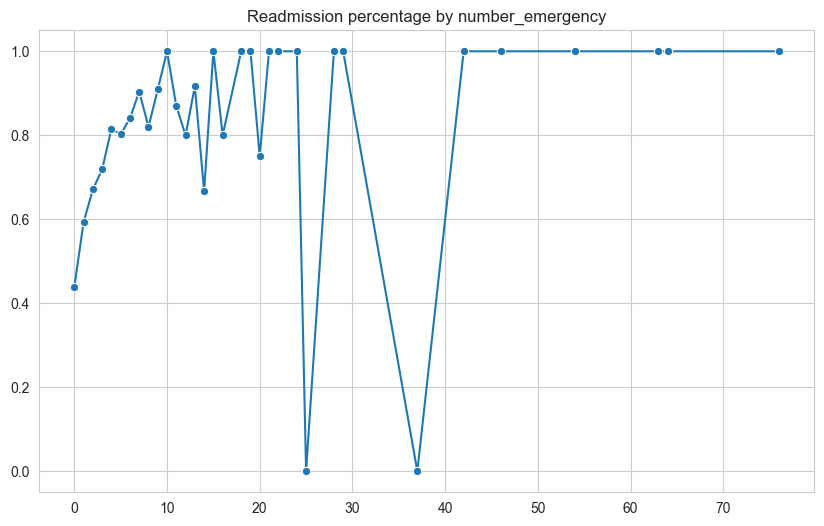

In [49]:
# readmission percentage by number_emergency
print(readmission_percentage('number_emergency'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_emergency'].unique(),y=readmission_percentage('number_emergency'),marker='o')
plt.title('Readmission percentage by number_emergency')

The trend is increasing, same to number_outpatient, outliers appear at value around 25 and 37 of number emergency. We will keep this.

### number_inpatient

Text(0.5, 1.0, 'Readmission by number_inpatient')

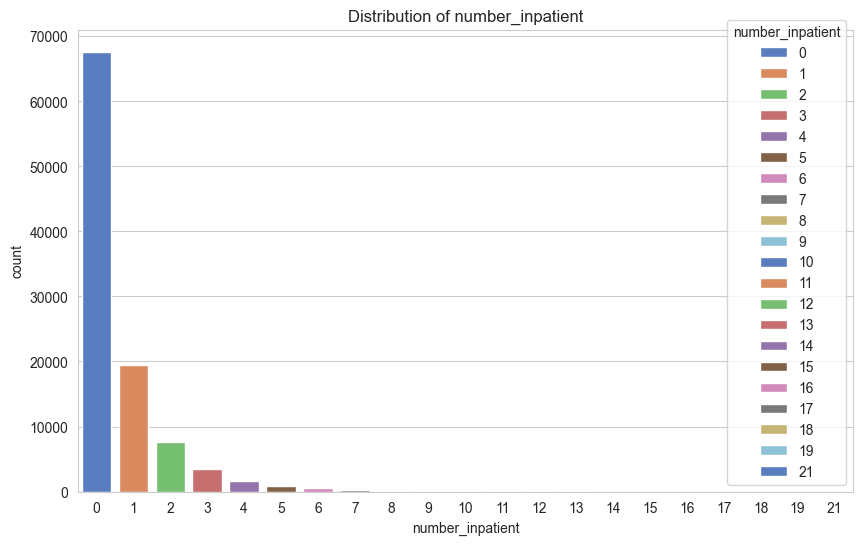

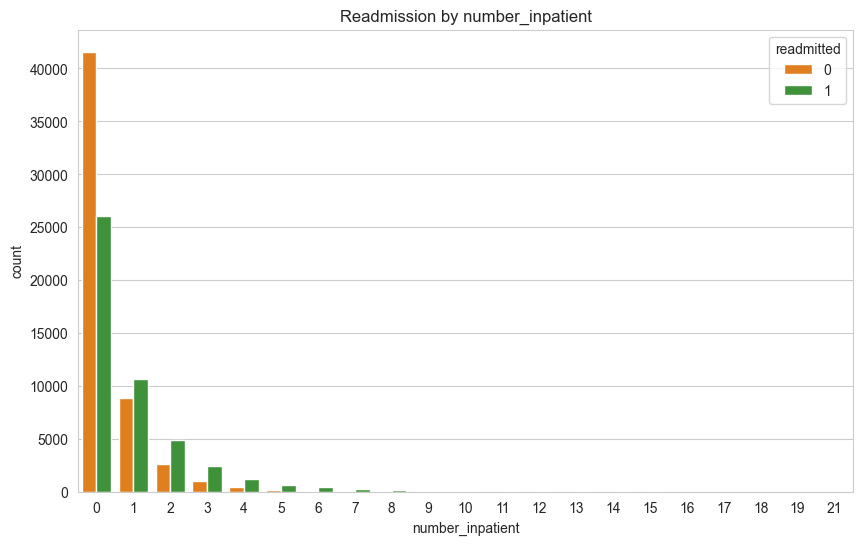

In [50]:
#plot the distribution of number_inpatient
plt.figure(figsize=(10, 6))
sns.countplot(x='number_inpatient', hue='number_inpatient', data=df, palette='muted')
plt.title('Distribution of number_inpatient')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_inpatient', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_inpatient')

[0.38494750850214404, 0.5476153885559142, 0.6493523658472112, 0.6971562591615362, 0.8416666666666667, 0.8004926108374384, 0.7422934648581998, 0.8097014925373134, 0.9072847682119205, 0.8828828828828829, 1.0, 0.8524590163934426, 1.0, 1.0, 0.8823529411764706, 0.9, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_inpatient')

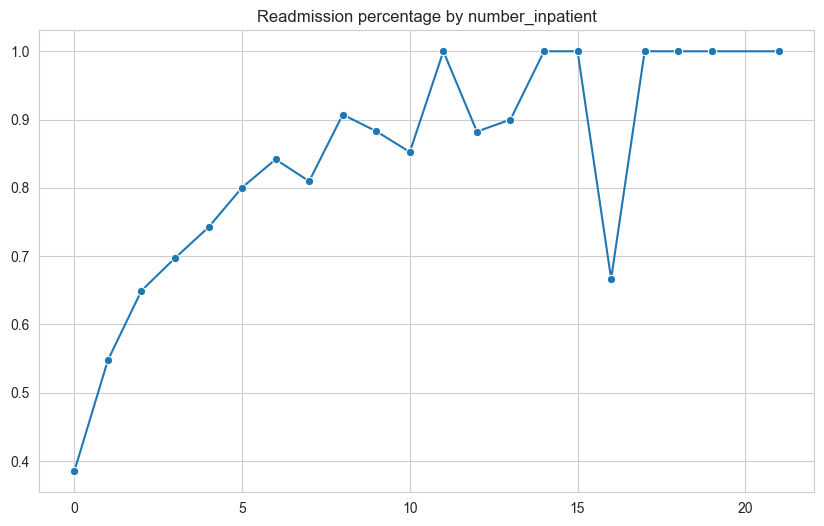

In [51]:
# readmission percentage by number_inpatient
print(readmission_percentage('number_inpatient'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_inpatient'].unique(),y=readmission_percentage('number_inpatient'),marker='o')
plt.title('Readmission percentage by number_inpatient')

The higher the number_inpatient values, the higher the readmission rate. This feature is potential. 

## Diag_1,diag_2,diag_3

### diag_1: The primary diagnosis

In [52]:
# # readmission percentage by diag_1
# # print(readmission_percentage('diag_1'))

# # plot line plot
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_1'].unique(),y=readmission_percentage('diag_1'),marker='o')
# plt.title('Readmission percentage by diag_1')

### diag_2: Secondary diagnosis

In [53]:
# # readmission percentage by diag_2
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_2'].unique(),y=readmission_percentage('diag_2'),marker='o')
# plt.title('Readmission percentage by diag_2')


### diag_3 : Additional secondary diagnosis

In [54]:
# # readmission percentage by diag_3
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_3'].unique(),y=readmission_percentage('diag_3'),marker='o')
# plt.title('Readmission percentage by diag_3')


+ For these 3 diag features, we do not know mapping values, so we will do nothing of this.

### number_diagnoses

Text(0.5, 1.0, 'Readmission by number_diagnoses')

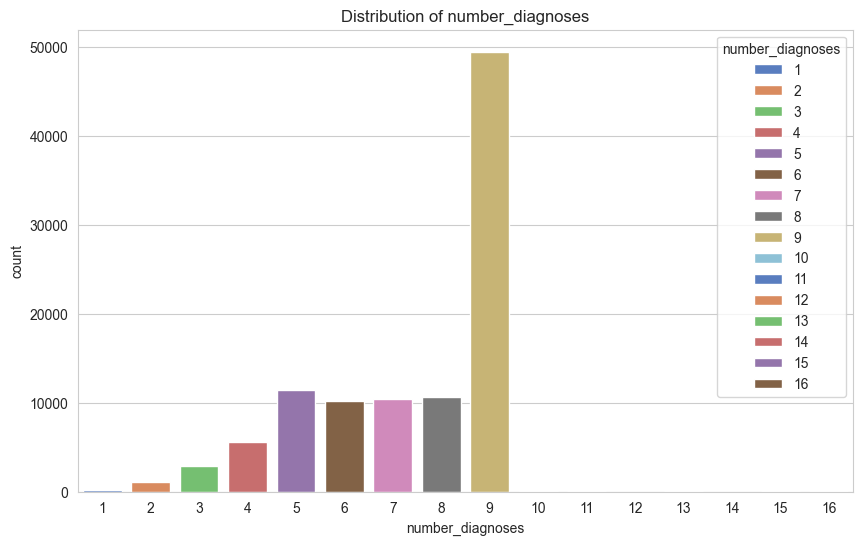

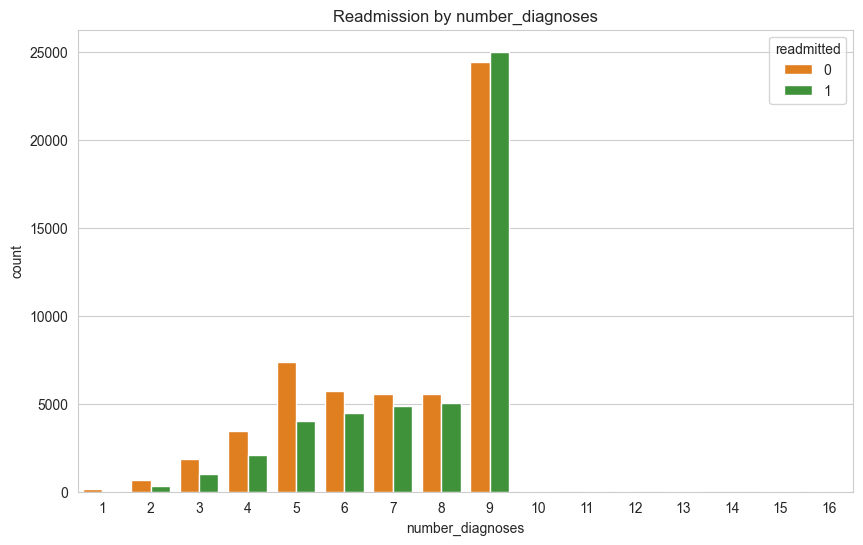

In [55]:
# plot the distribution of number_diagnoses
plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', hue='number_diagnoses', data=df, palette='muted')
plt.title('Distribution of number_diagnoses')


# plot to see the relation between number_diagnoses and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_diagnoses')

[0.2374429223744292, 0.5058414520758379, 0.43844109831709477, 0.46675647070143367, 0.3545159308347231, 0.4758854559155991, 0.34285714285714286, 0.37258443200288965, 0.3284457478005865, 0.4, 0.4444444444444444, 0.5625, 0.5, 0.47058823529411764, 0.7272727272727273, 0.5714285714285714]


Text(0.5, 1.0, 'Readmission percentage by number_diagnoses')

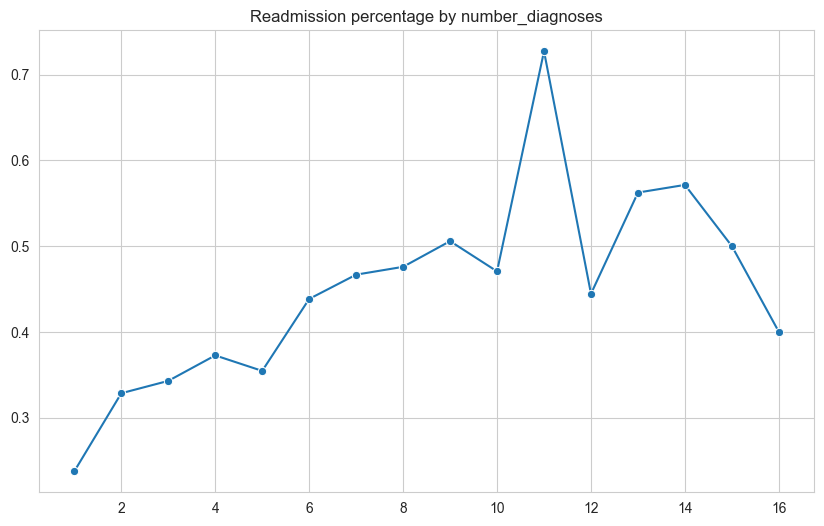

In [56]:

# readmission percentage by number_diagnoses
print(readmission_percentage('number_diagnoses'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_diagnoses'].unique(),y=readmission_percentage('number_diagnoses'),marker='o')
plt.title('Readmission percentage by number_diagnoses')

The more number of diagnoses, the higher the readmission rate. It is quite clear even though the rate getting lower when number_diagnoses >= 12

### metformin

Text(0.5, 1.0, 'Readmission by metformin')

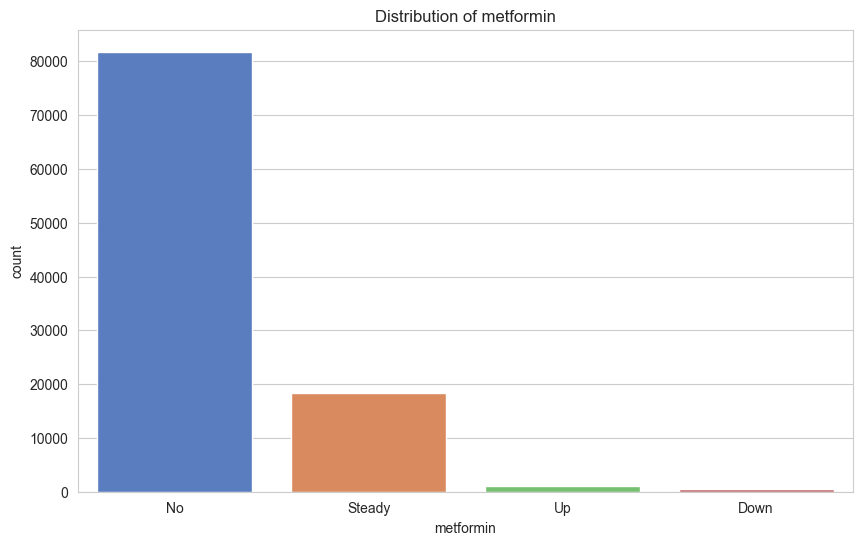

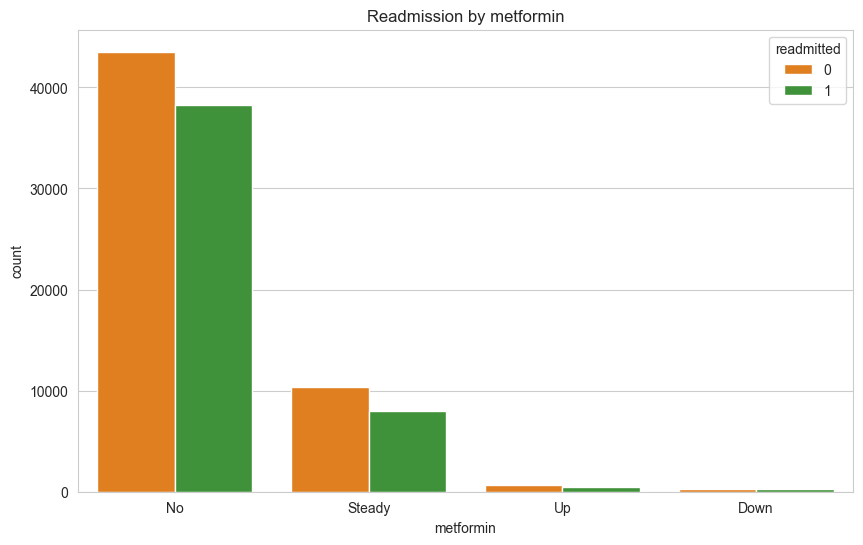

In [57]:
#plot the distribution of metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin', hue='metformin', data=df, palette='muted')
plt.title('Distribution of metformin')

# plot to see the relation between metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin')


[0.46781530484971506, 0.4333914749809223, 0.4076850984067479, 0.4504347826086956]


Text(0.5, 1.0, 'Readmission percentage by metformin')

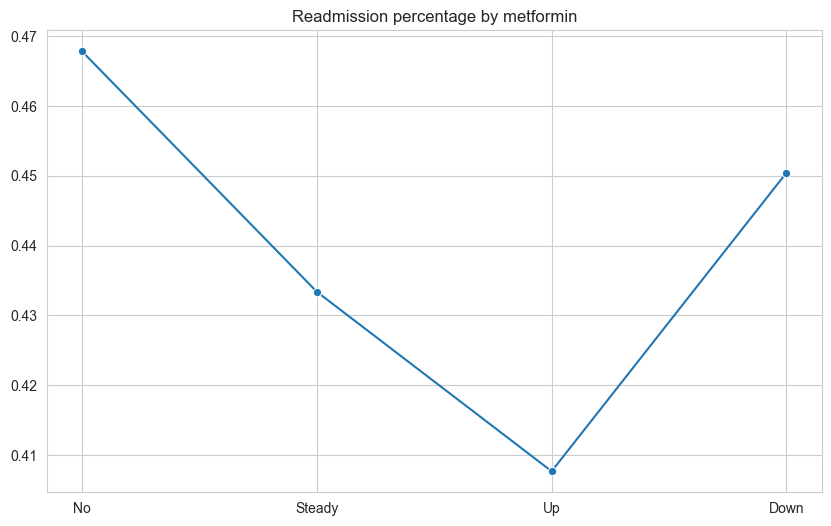

In [58]:
# readmission percentage by metformin
print(readmission_percentage('metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin'].unique(),y=readmission_percentage('metformin'),marker='o')
plt.title('Readmission percentage by metformin')


The prescription for metformin goes down or not prescripted usually results in higher readmission rate while keeping it steady or increase dosage would make the rate go down.

## repaglinide

Text(0.5, 1.0, 'Readmission by repaglinide')

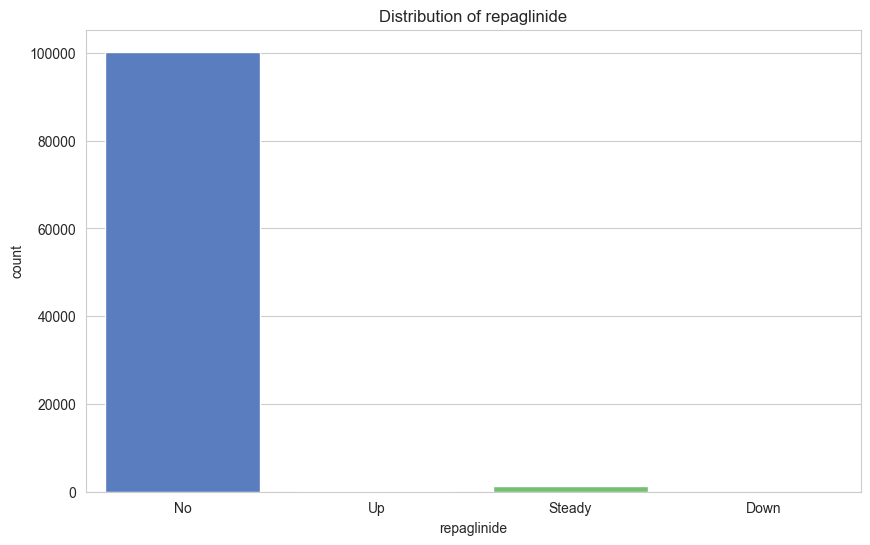

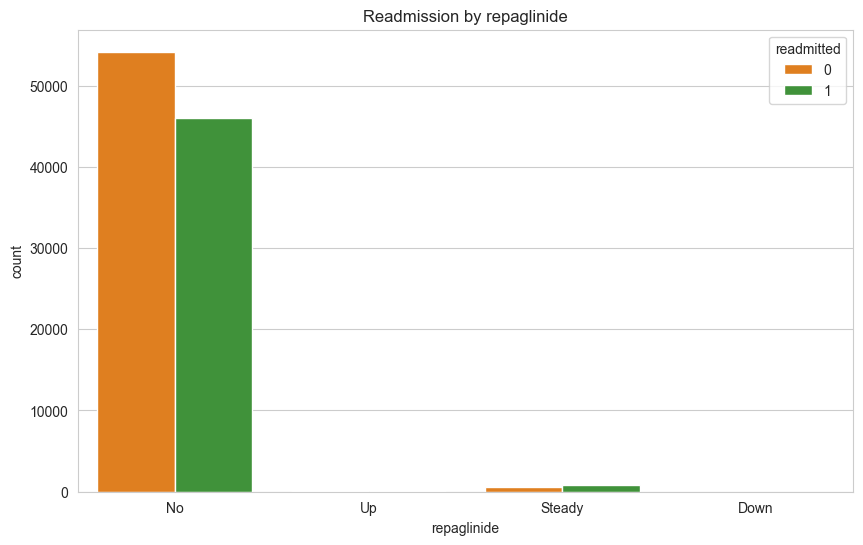

In [59]:
#plot the distribution of repaglinide
plt.figure(figsize=(10, 6))
sns.countplot(x='repaglinide', hue='repaglinide', data=df, palette='muted',legend=False)
plt.title('Distribution of repaglinide')

# plot to see the relation between repaglinide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='repaglinide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by repaglinide')

[0.45952687399602904, 0.4818181818181818, 0.5563583815028902, 0.4888888888888889]


Text(0.5, 1.0, 'Readmission percentage by repaglinide')

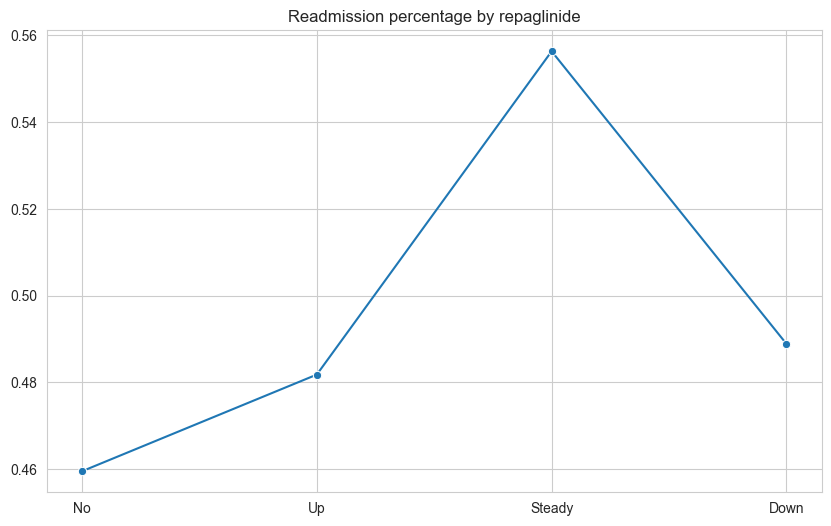

In [60]:
# readmission percentage by repaglinide
print(readmission_percentage('repaglinide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['repaglinide'].unique(),y=readmission_percentage('repaglinide'),marker='o')
plt.title('Readmission percentage by repaglinide')

The prescription for repqglinide goes up, usually results in higher readmission rate while keeping it steady or decrease dosage would make the rate go down.

As we see here the percentages of the patient use this kind of medicine seem to increase and a go down a little to the 'down' status. Althought the data of the patient use this medicine is too small but based on the lineplot percentages we will try to keep it.

## nateglinide

Text(0.5, 1.0, 'Readmission by nateglinide')

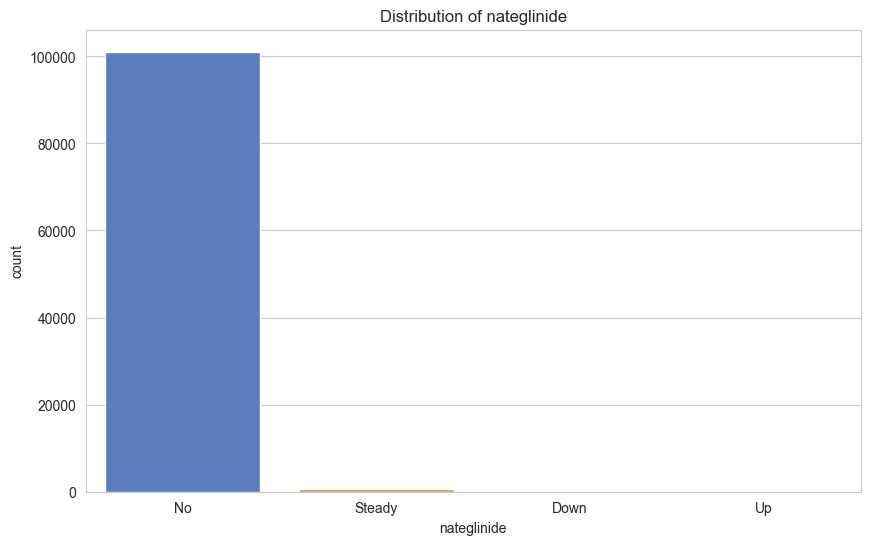

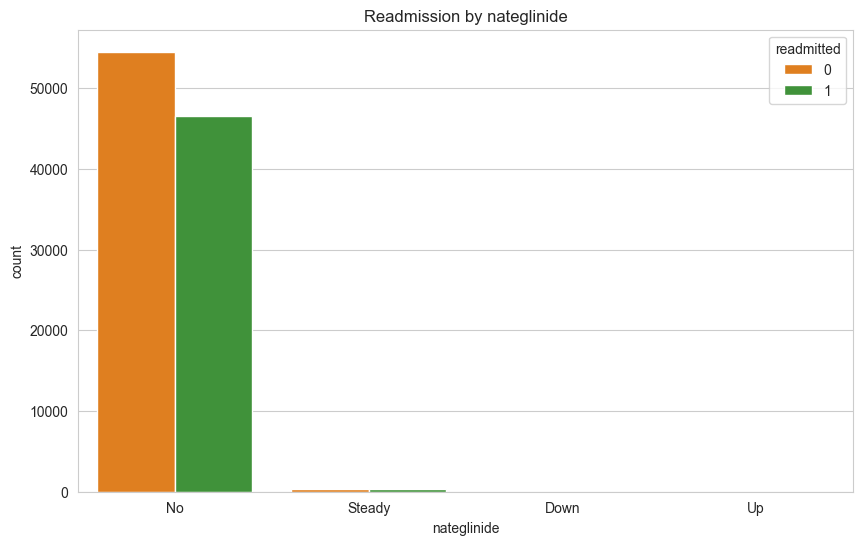

In [61]:
#plot the distribution of nateglinide
plt.figure(figsize=(10, 6))
sns.countplot(x='nateglinide', hue='nateglinide', data=df, palette='muted',legend=False)
plt.title('Distribution of nateglinide')

# plot to see the relation between nateglinide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='nateglinide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by nateglinide')

[0.4607027299803093, 0.4880239520958084, 0.45454545454545453, 0.4583333333333333]


Text(0.5, 1.0, 'Readmission percentage by nateglinide')

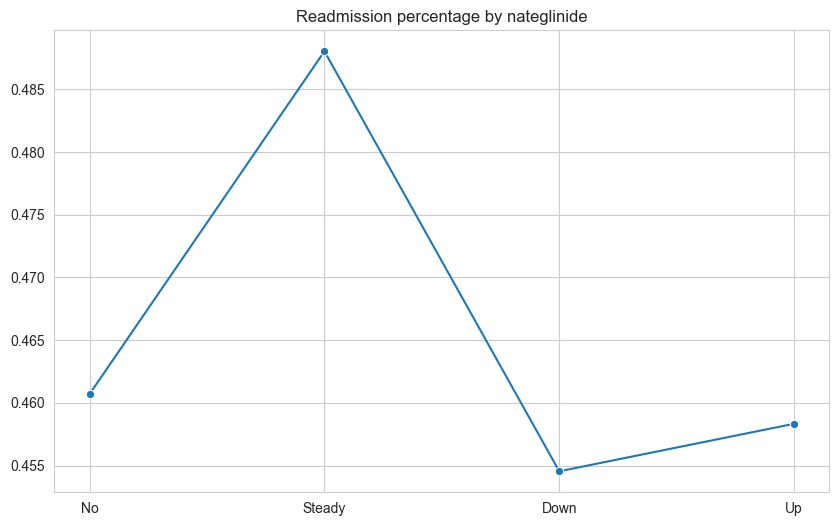

In [62]:
# readmission percentage by nateglinide
print(readmission_percentage('nateglinide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['nateglinide'].unique(),y=readmission_percentage('nateglinide'),marker='o')
plt.title('Readmission percentage by nateglinide')

The prescription for repqglinide results in higher readmission rate while keeping it steady and decrease dosage would make the rate go down significantly and increase dosage would make the rate go up slightly.

## chlorpropamide

Text(0.5, 1.0, 'Readmission by chlorpropamide')

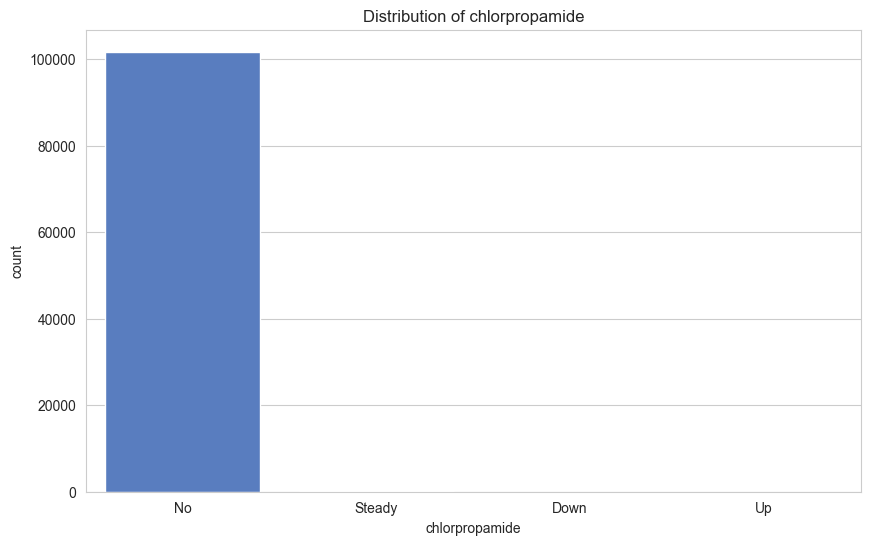

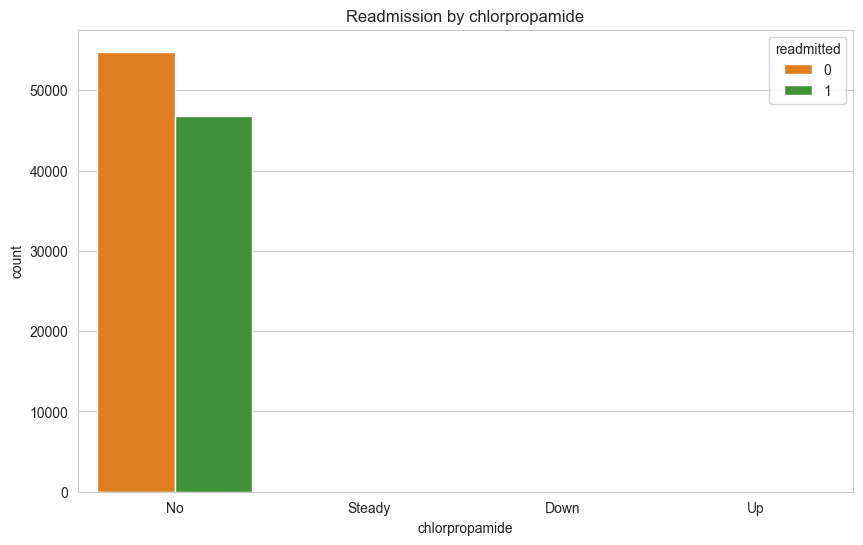

In [63]:
#plot the distribution of chlorpropamide
plt.figure(figsize=(10, 6))
sns.countplot(x='chlorpropamide', hue='chlorpropamide', data=df, palette='muted',legend=False)
plt.title('Distribution of chlorpropamide')

# plot to see the relation between chlorpropamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='chlorpropamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by chlorpropamide')

[0.46088709677419354, 0.43037974683544306, 0.0, 0.8333333333333334]


Text(0.5, 1.0, 'Readmission percentage by chlorpropamide')

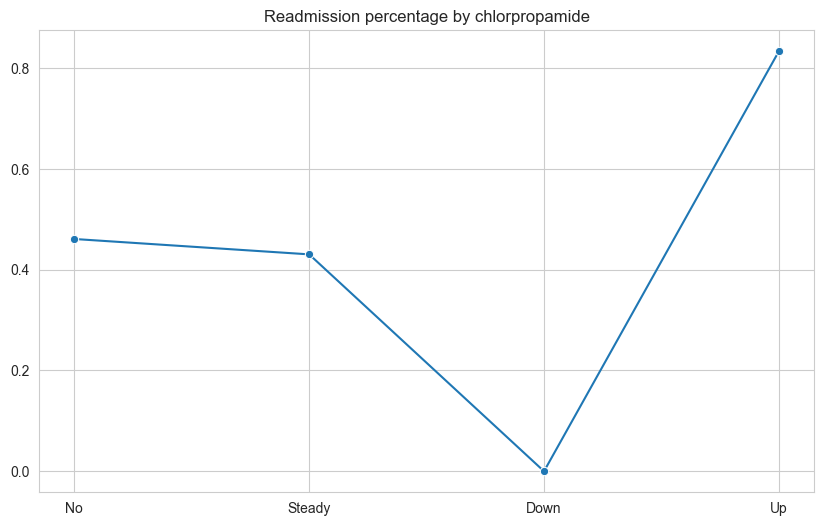

In [64]:
# readmission percentage by chlorpropamide
print(readmission_percentage('chlorpropamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['chlorpropamide'].unique(),y=readmission_percentage('chlorpropamide'),marker='o')
plt.title('Readmission percentage by chlorpropamide')

The prescription for chlorpropamide results readmission rate go down slightly while keeping it steady. Decrease dosage would make the rate go down significantly then reach the bottom. Increase dosage would make it reach the highest percentages of the readmission rate.

## glimepiride

Text(0.5, 1.0, 'Readmission by glimepiride')

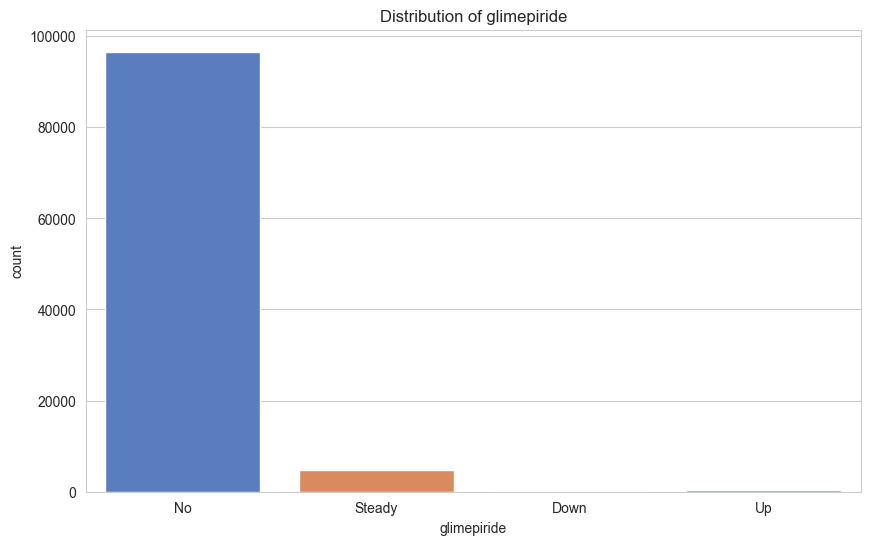

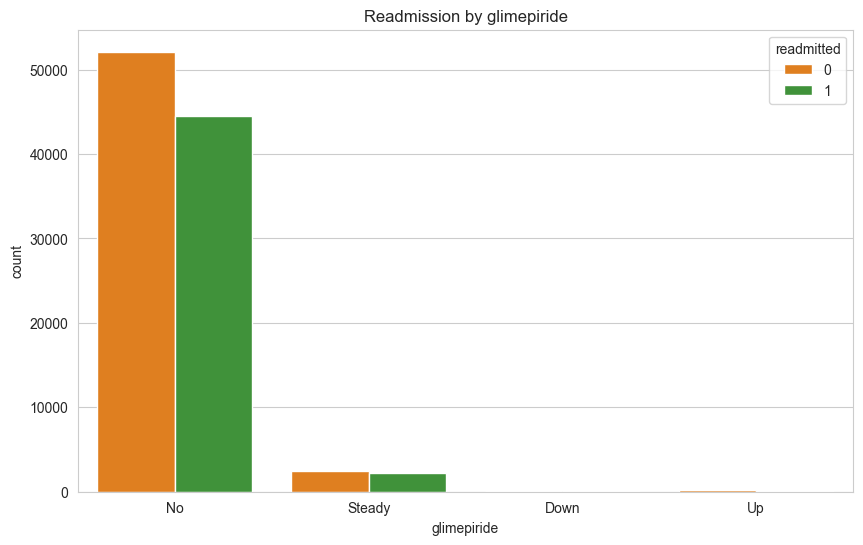

In [65]:
#plot the distribution of glimepiride
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride', hue='glimepiride', data=df, palette='muted',legend=False)
plt.title('Distribution of glimepiride')

# plot to see the relation between glimepiride and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glimepiride')

[0.46041936318923116, 0.4721627408993576, 0.4793814432989691, 0.42507645259938837]


Text(0.5, 1.0, 'Readmission percentage by glimepiride')

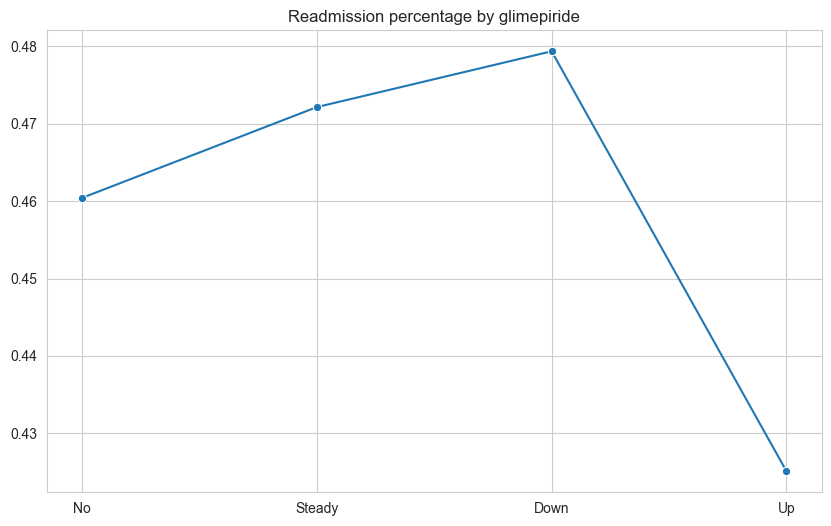

In [66]:
# readmission percentage by glimepiride
print(readmission_percentage('glimepiride'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glimepiride'].unique(),y=readmission_percentage('glimepiride'),marker='o')
plt.title('Readmission percentage by glimepiride')

The prescription for glimepiride results readmission rate go up slightly while keeping it steady and reach the top when decrease the dosage. Increase dosage would make the rate go down significantly then reach the bottom.

## acetohexamide

Text(0.5, 1.0, 'Readmission by acetohexamide')

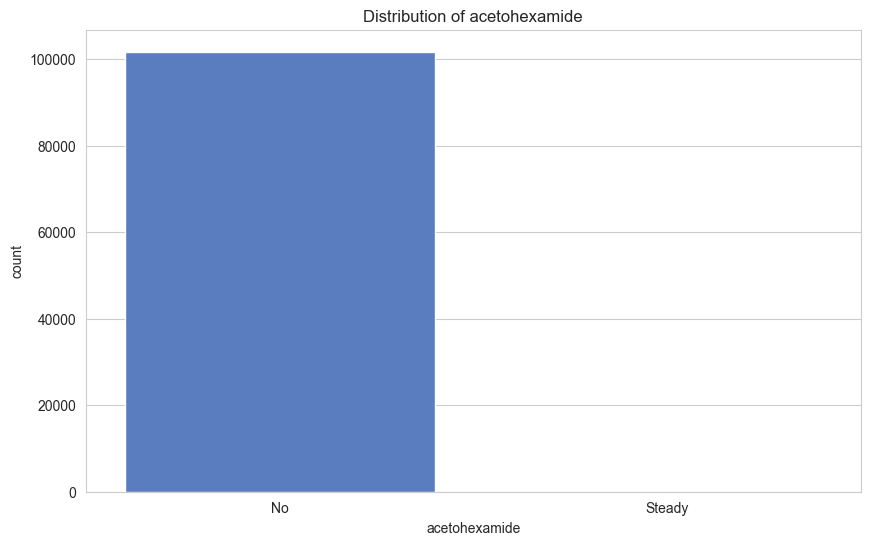

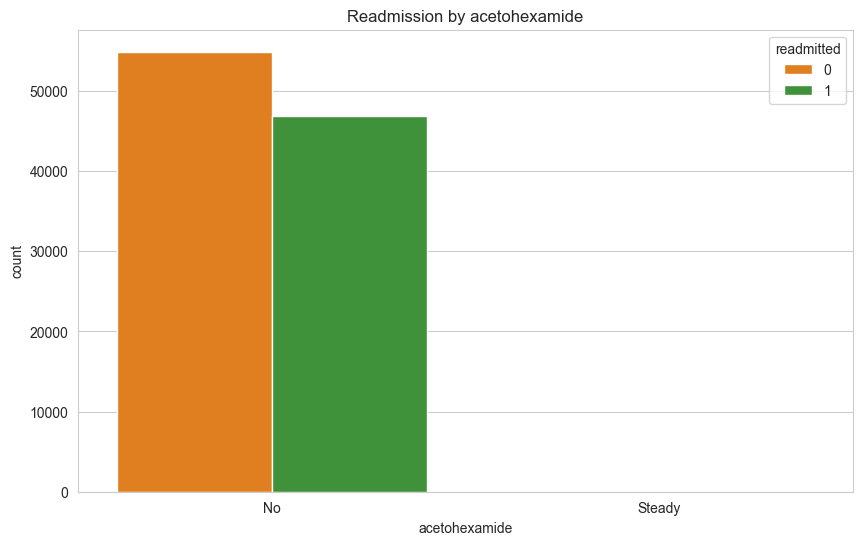

In [67]:
#plot the distribution of acetohexamide
plt.figure(figsize=(10, 6))
sns.countplot(x='acetohexamide', hue='acetohexamide', data=df, palette='muted',legend=False)
plt.title('Distribution of acetohexamide')

# plot to see the relation between acetohexamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='acetohexamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by acetohexamide')

[0.4608755466024665, 1.0]


Text(0.5, 1.0, 'Readmission percentage by acetohexamide')

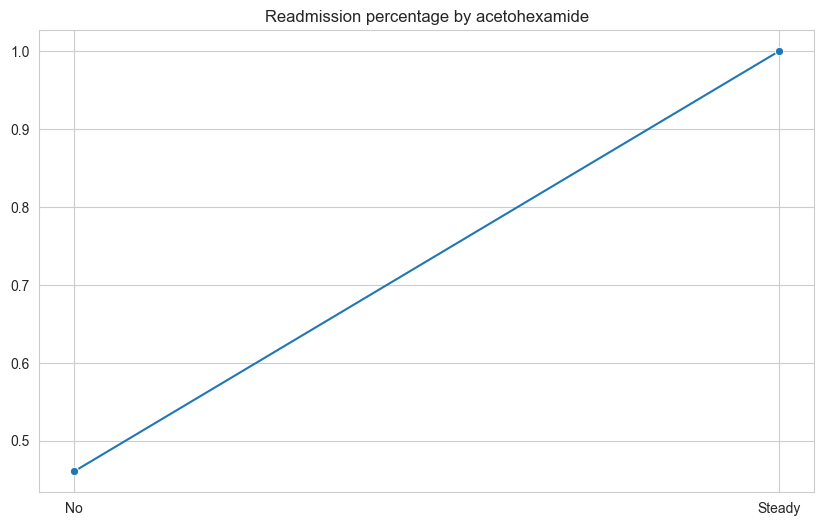

In [68]:
# readmission percentage by acetohexamide
print(readmission_percentage('acetohexamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['acetohexamide'].unique(),y=readmission_percentage('acetohexamide'),marker='o')
plt.title('Readmission percentage by acetohexamide')

The prescription for acetohexamide results readmission rate go up from non prescription to steady and reach the top at 100%

## glipizide

Text(0.5, 1.0, 'Readmission by glipizide')

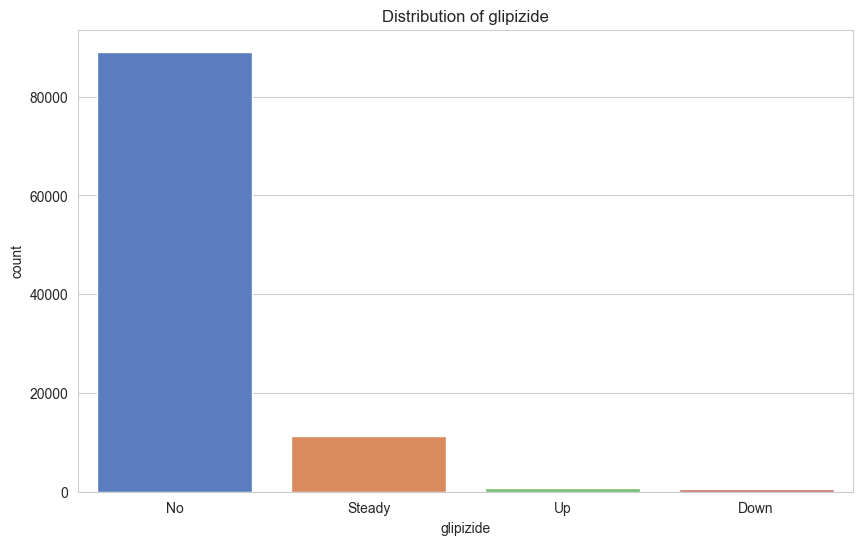

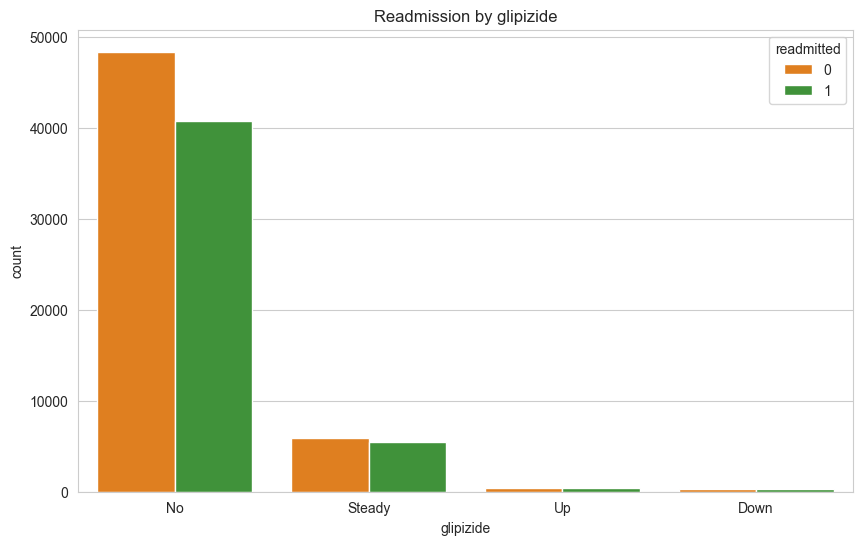

In [69]:
#plot the distribution of glipizide
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide', hue='glipizide', data=df, palette='muted',legend=False)
plt.title('Distribution of glipizide')

# plot to see the relation between glipizide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glipizide')

[0.4571171980242479, 0.4844135258893977, 0.5, 0.5285714285714286]


Text(0.5, 1.0, 'Readmission percentage by glipizide')

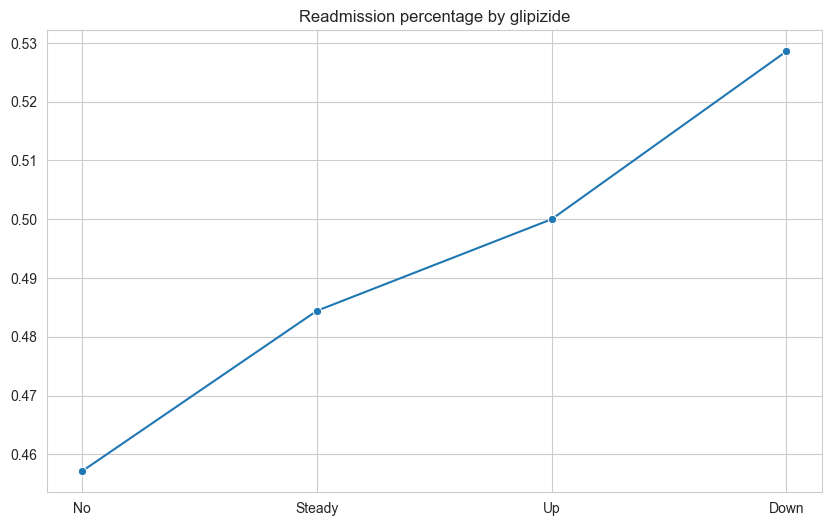

In [70]:
# readmission percentage by glipizide
print(readmission_percentage('glipizide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glipizide'].unique(),y=readmission_percentage('glipizide'),marker='o')
plt.title('Readmission percentage by glipizide')

The prescription for glipizide results readmission rate go up when keeping the dosage steady and slightly increase when increase the dosage then reach the top when decrease the dosage. 

## glyburide

Text(0.5, 1.0, 'Readmission by glyburide')

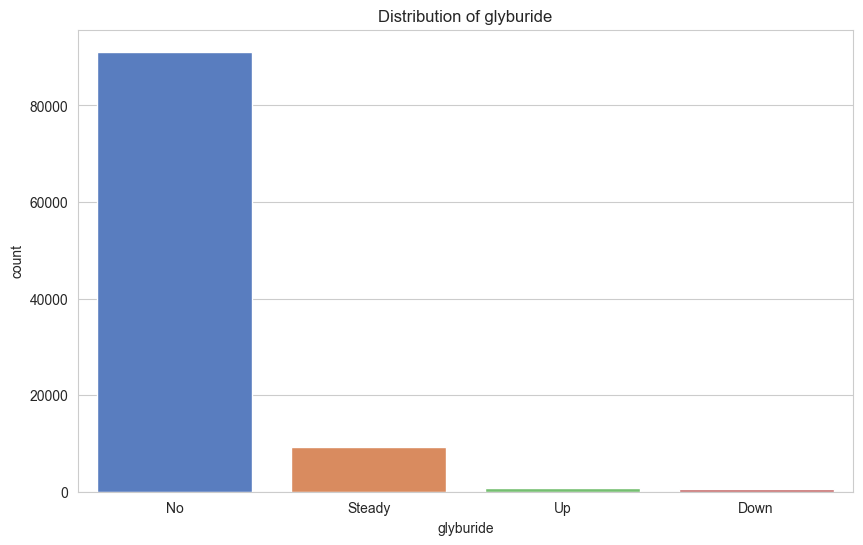

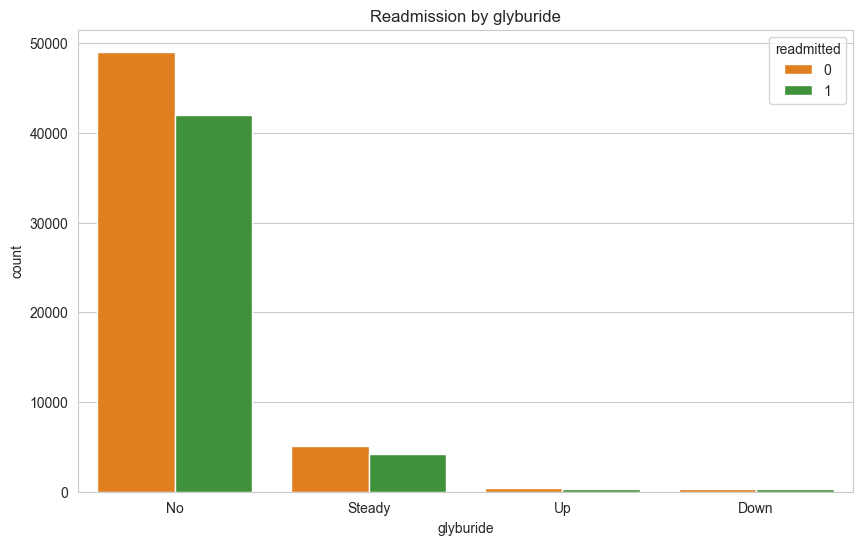

In [71]:
#plot the distribution of glyburide
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide', hue='glyburide', data=df, palette='muted',legend=False)
plt.title('Distribution of glyburide')

# plot to see the relation between glyburide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glyburide')

[0.4615215768909961, 0.4546042700021566, 0.4421182266009852, 0.4875886524822695]


Text(0.5, 1.0, 'Readmission percentage by glyburide')

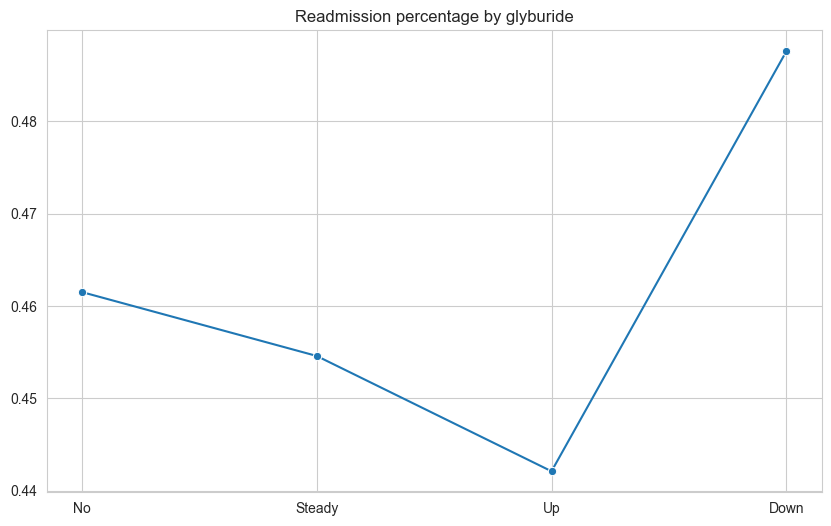

In [72]:
# readmission percentage by glyburide
print(readmission_percentage('glyburide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glyburide'].unique(),y=readmission_percentage('glyburide'),marker='o')
plt.title('Readmission percentage by glyburide')

The prescription for glipizide results readmission rate decrease when keeping the dosage steady and significantly decrease when increase the dosage then reach the top decrease the dosage. 

## tolbutamide

Text(0.5, 1.0, 'Readmission by tolbutamide')

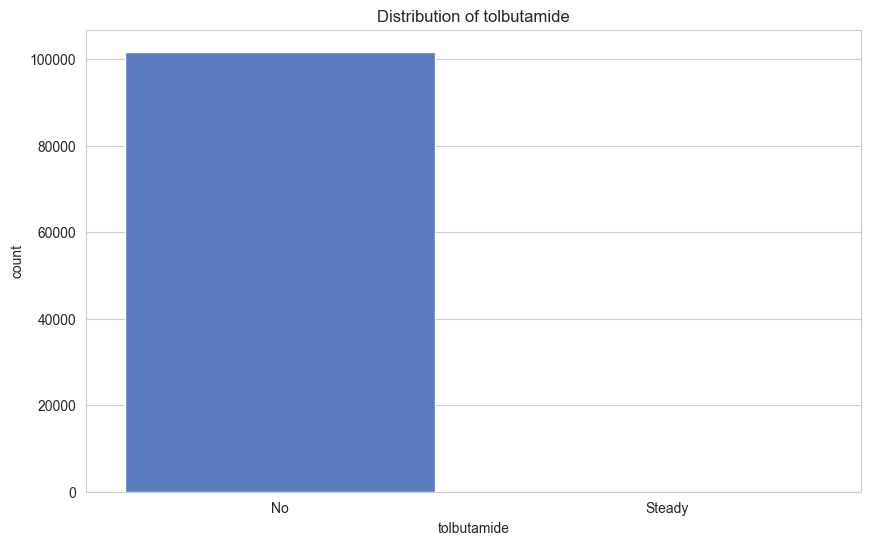

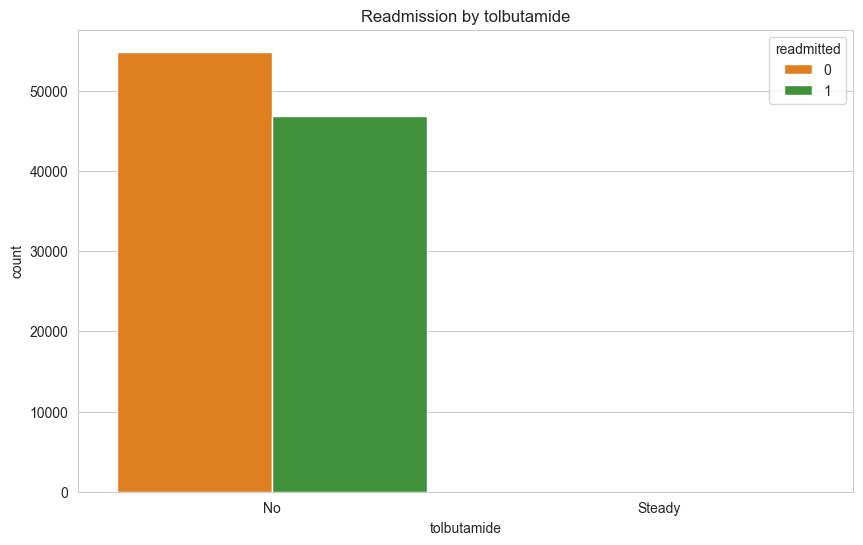

In [73]:
#plot the distribution of tolbutamide
plt.figure(figsize=(10, 6))
sns.countplot(x='tolbutamide', hue='tolbutamide', data=df, palette='muted',legend=False)
plt.title('Distribution of tolbutamide')

# plot to see the relation between tolbutamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='tolbutamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by tolbutamide')

[0.4609064014231937, 0.34782608695652173]


Text(0.5, 1.0, 'Readmission percentage by tolbutamide')

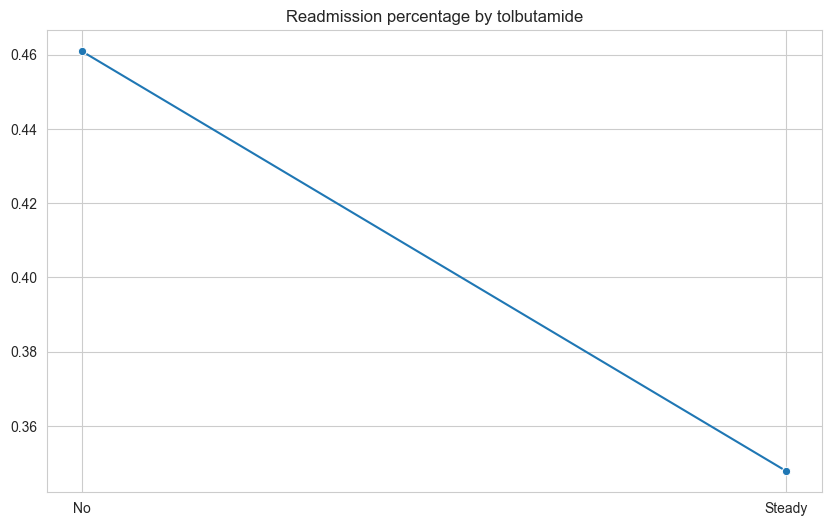

In [74]:
# readmission percentage by tolbutamide
print(readmission_percentage('tolbutamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['tolbutamide'].unique(),y=readmission_percentage('tolbutamide'),marker='o')
plt.title('Readmission percentage by tolbutamide')

The prescription for tolbutamide result the admission rate go down when keeping the dosage steady

## pioglitazone

Text(0.5, 1.0, 'Readmission by pioglitazone')

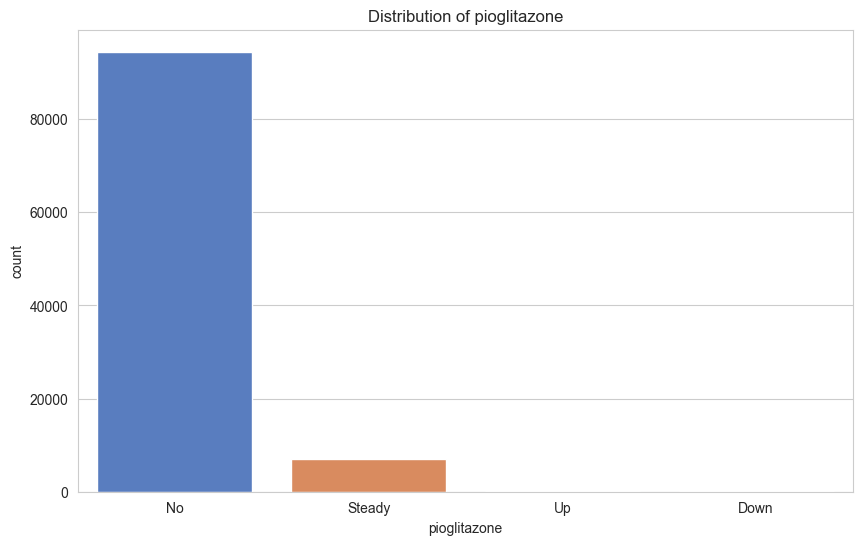

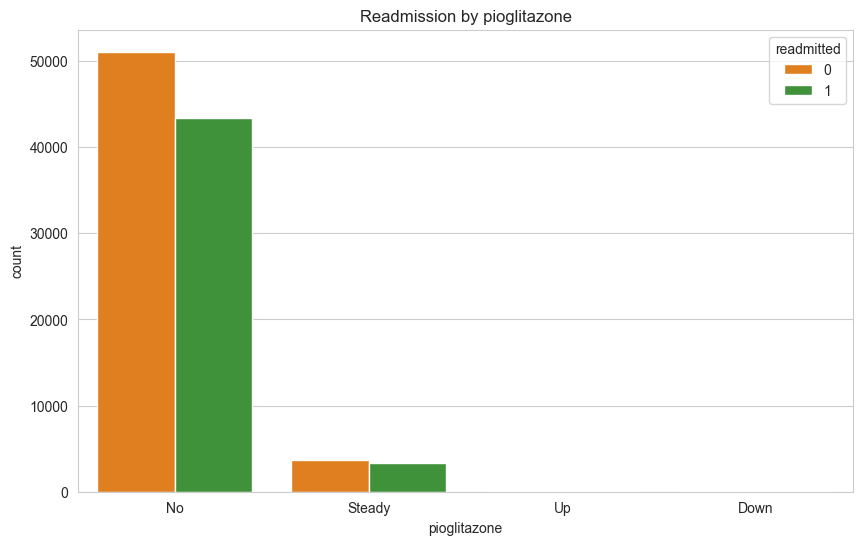

In [75]:
#plot the distribution of pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='pioglitazone', hue='pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of pioglitazone')

# plot to see the relation between pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by pioglitazone')

[0.4592536902518054, 0.4797878440366973, 0.5170940170940171, 0.5338983050847458]


Text(0.5, 1.0, 'Readmission percentage by pioglitazone')

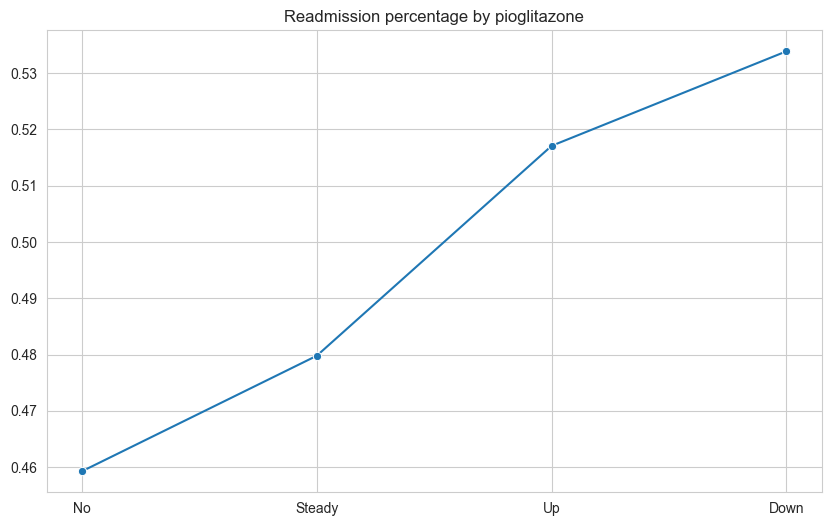

In [76]:
# readmission percentage by pioglitazone
print(readmission_percentage('pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['pioglitazone'].unique(),y=readmission_percentage('pioglitazone'),marker='o')
plt.title('Readmission percentage by pioglitazone')

The prescription for pioglitazone results the admission rate go up when keeping the dosage steady the get higher when increase the dosage then reach the top when decrease the dosage.

## rosiglitazone

Text(0.5, 1.0, 'Readmission by rosiglitazone')

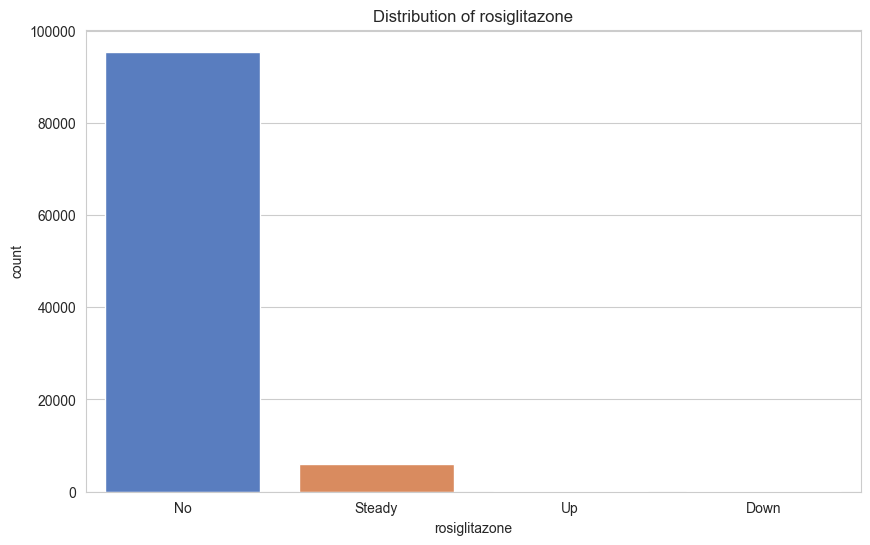

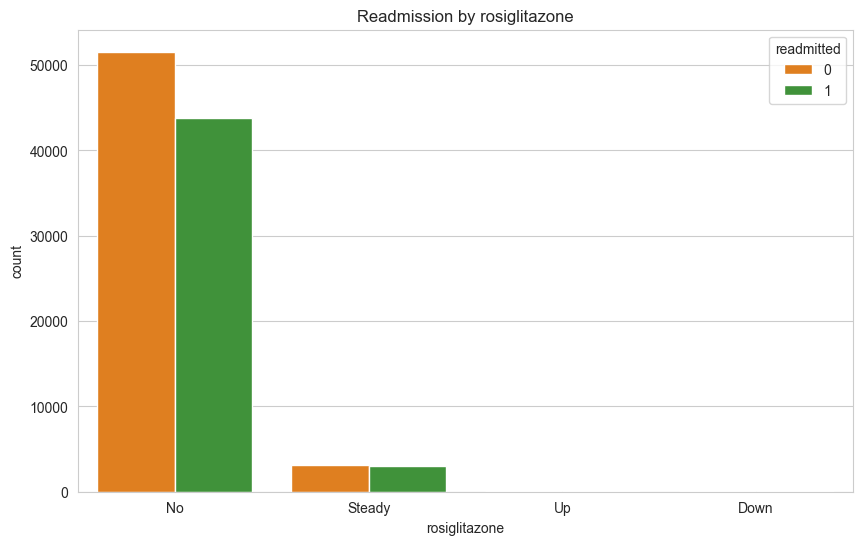

In [77]:
#plot the distribution of rosiglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='rosiglitazone', hue='rosiglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of rosiglitazone')

# plot to see the relation between rosiglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='rosiglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by rosiglitazone')

[0.45940818230416874, 0.4878688524590164, 0.398876404494382, 0.3103448275862069]


Text(0.5, 1.0, 'Readmission percentage by rosiglitazone')

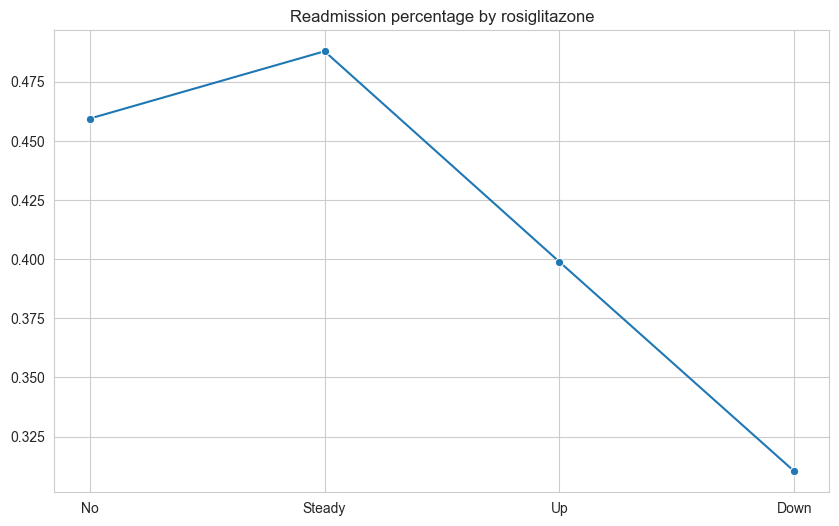

In [78]:
# readmission percentage by rosiglitazone
print(readmission_percentage('rosiglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['rosiglitazone'].unique(),y=readmission_percentage('rosiglitazone'),marker='o')
plt.title('Readmission percentage by rosiglitazone')

The prescription for rosiglitazone results the admission rate go down when keeping the dosage steady the get higher when increase the dosage then reach the top when decrease the dosage.

## acarbose

Text(0.5, 1.0, 'Readmission by acarbose')

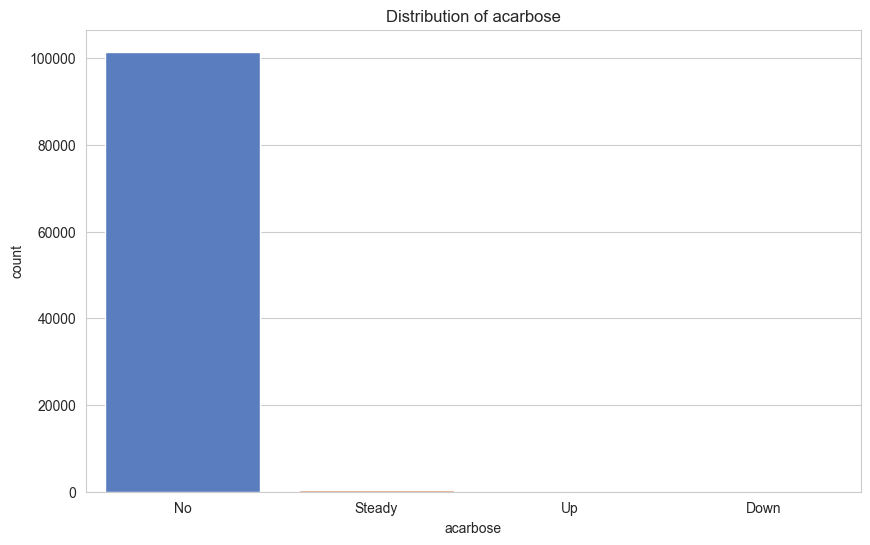

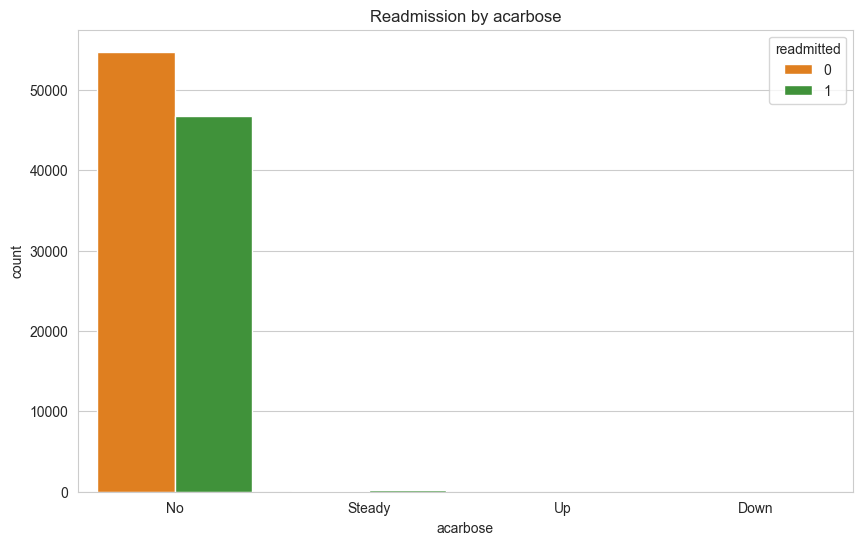

In [79]:
#plot the distribution of acarbose
plt.figure(figsize=(10, 6))
sns.countplot(x='acarbose', hue='acarbose', data=df, palette='muted',legend=False)
plt.title('Distribution of acarbose')

# plot to see the relation between acarbose and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='acarbose', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by acarbose')

[0.46047625618482524, 0.5932203389830508, 0.6, 0.6666666666666666]


Text(0.5, 1.0, 'Readmission percentage by acarbose')

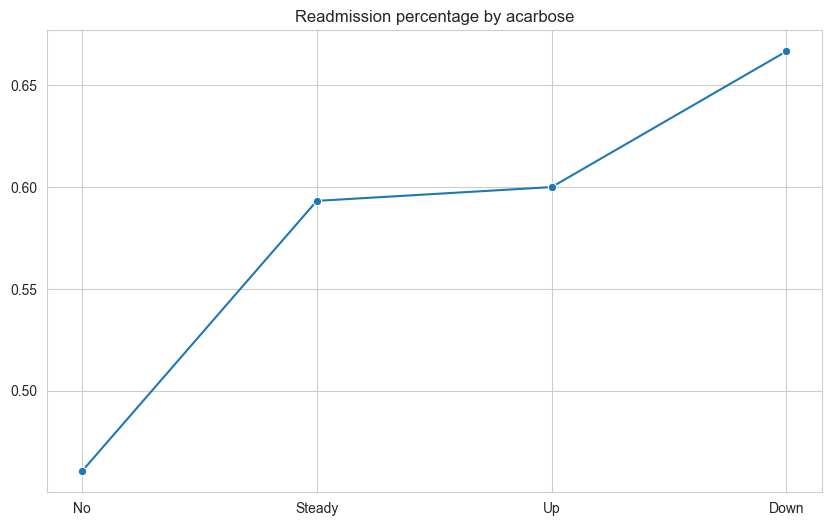

In [80]:
# readmission percentage by acarbose
print(readmission_percentage('acarbose'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['acarbose'].unique(),y=readmission_percentage('acarbose'),marker='o')
plt.title('Readmission percentage by acarbose')

The prescription for carbose results the admission rate go up when keeping the dosage steady. It barely increase when increase the dosage then reach the top when decrease the dosage.

## miglitol

Text(0.5, 1.0, 'Readmission by miglitol')

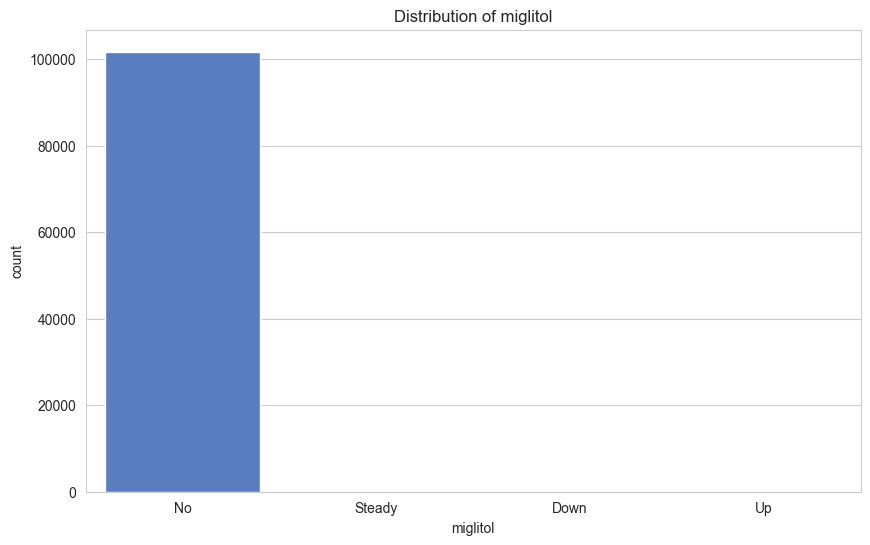

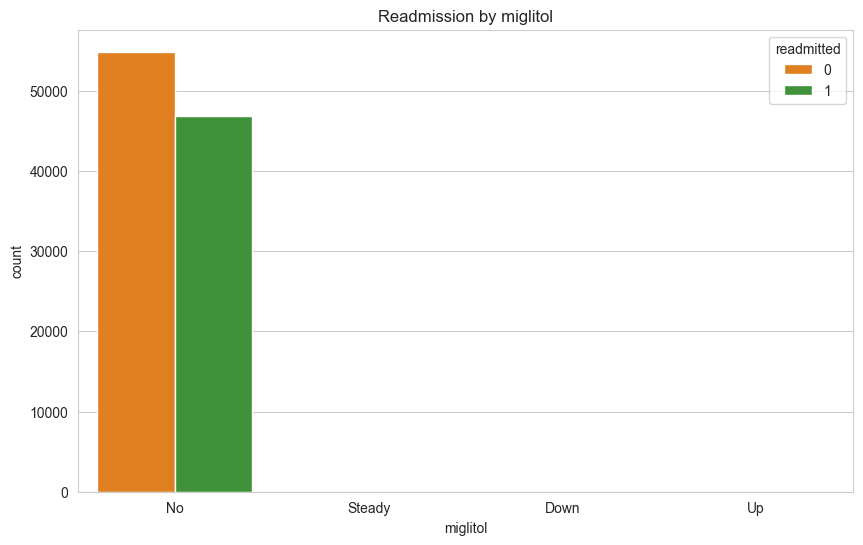

In [81]:
#plot the distribution of miglitol
plt.figure(figsize=(10, 6))
sns.countplot(x='miglitol', hue='miglitol', data=df, palette='muted',legend=False)
plt.title('Distribution of miglitol')

# plot to see the relation between miglitol and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='miglitol', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by miglitol')

[0.4608170808430324, 0.5806451612903226, 1.0, 0.5]


Text(0.5, 1.0, 'Readmission percentage by miglitol')

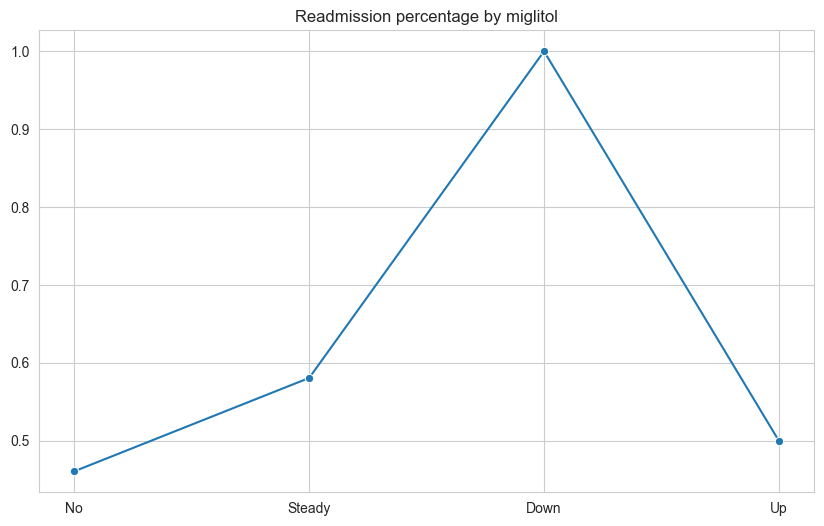

In [82]:
# readmission percentage by miglitol
print(readmission_percentage('miglitol'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['miglitol'].unique(),y=readmission_percentage('miglitol'),marker='o')
plt.title('Readmission percentage by miglitol')

The prescription for miglitol results the admission rate go up when keeping the dosage steady. It significantly go up when decrease the dosage then reach the top.  when the dosage increase the admission rate go down and nearly reach the bottom.

## troglitazone

Text(0.5, 1.0, 'Readmission by troglitazone')

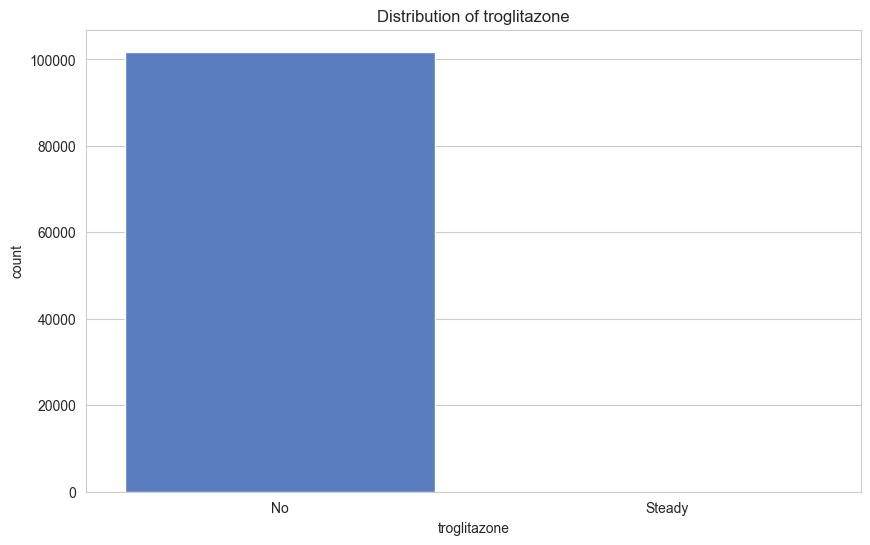

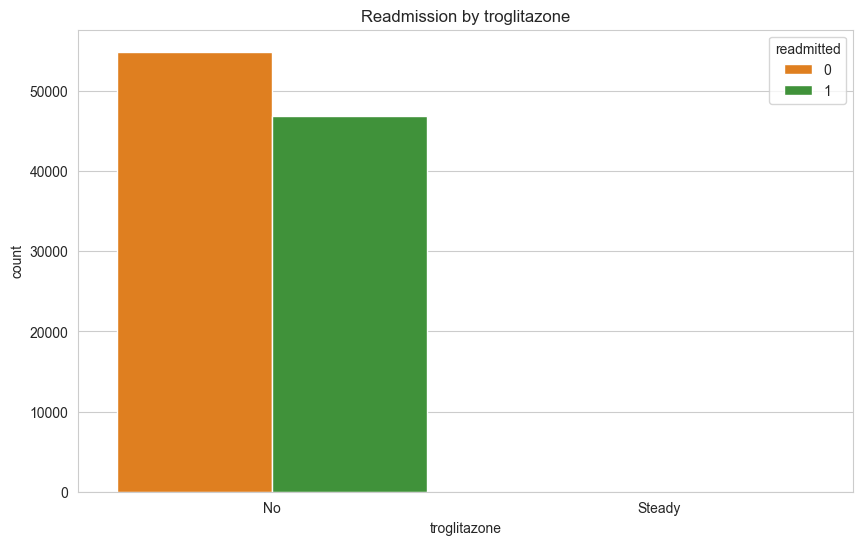

In [83]:
#plot the distribution of troglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='troglitazone', hue='troglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of troglitazone')

# plot to see the relation between troglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='troglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by troglitazone')

[0.4608747776696835, 0.6666666666666666]


Text(0.5, 1.0, 'Readmission percentage by troglitazone')

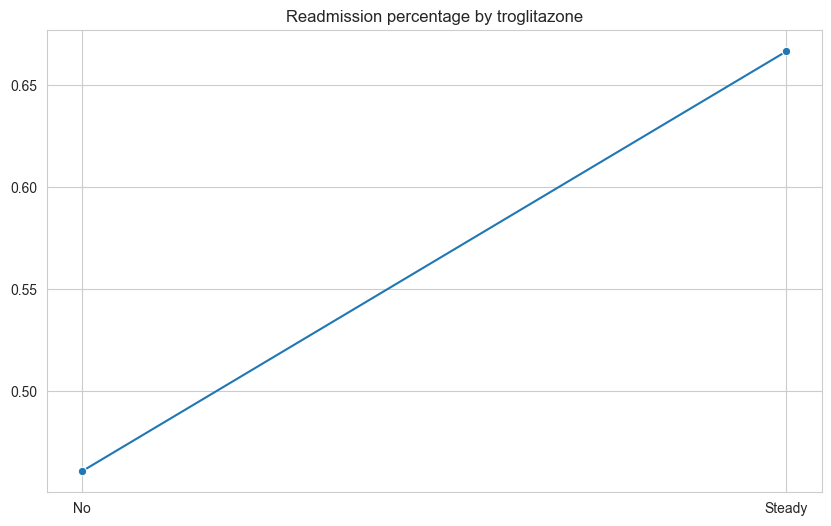

In [84]:
# readmission percentage by troglitazone
print(readmission_percentage('troglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['troglitazone'].unique(),y=readmission_percentage('troglitazone'),marker='o')
plt.title('Readmission percentage by troglitazone')

The prescription for troglitazone results the admission rate go up when keeping the dosage steady. 

## tolazamide

Text(0.5, 1.0, 'Readmission by tolazamide')

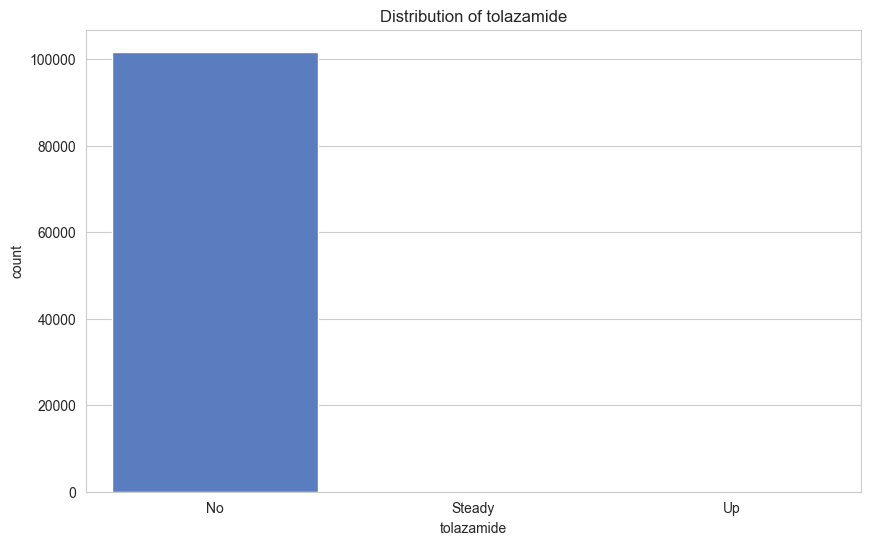

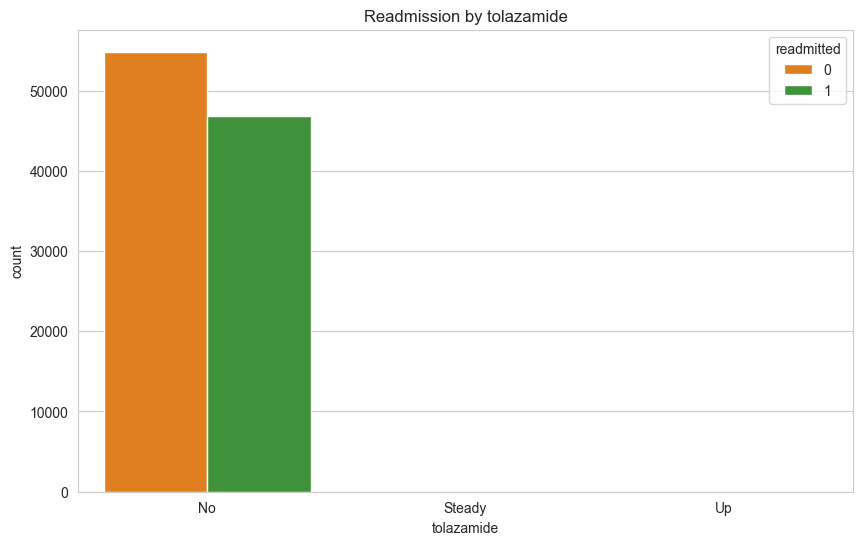

In [85]:
#plot the distribution of tolazamide
plt.figure(figsize=(10, 6))
sns.countplot(x='tolazamide', hue='tolazamide', data=df, palette='muted',legend=False)
plt.title('Distribution of tolazamide')

# plot to see the relation between tolazamide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='tolazamide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by tolazamide')

[0.4609297433326452, 0.3157894736842105, 1.0]


Text(0.5, 1.0, 'Readmission percentage by tolazamide')

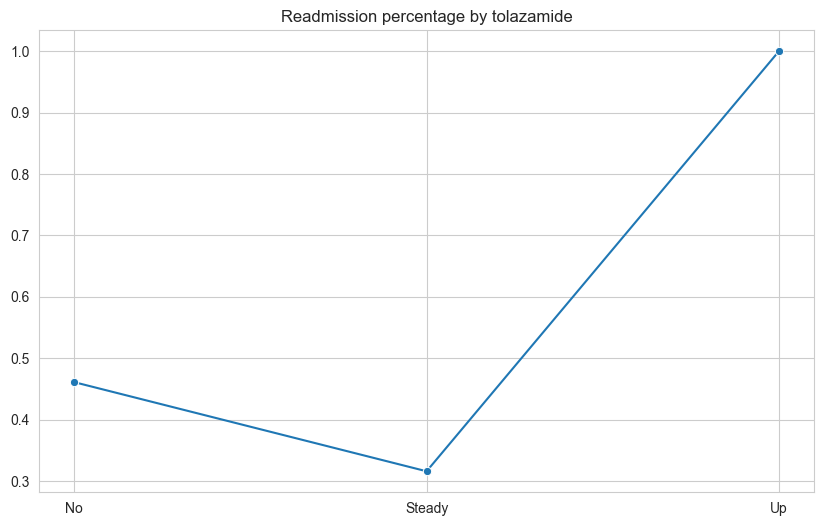

In [86]:
# readmission percentage by tolazamide
print(readmission_percentage('tolazamide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['tolazamide'].unique(),y=readmission_percentage('tolazamide'),marker='o')
plt.title('Readmission percentage by tolazamide')

The prescription for tolazamide results the admission rate go down when keeping the dosage steady. It significantly go up when increase the dosage then reach the top.

## examide

Text(0.5, 1.0, 'Readmission by examide')

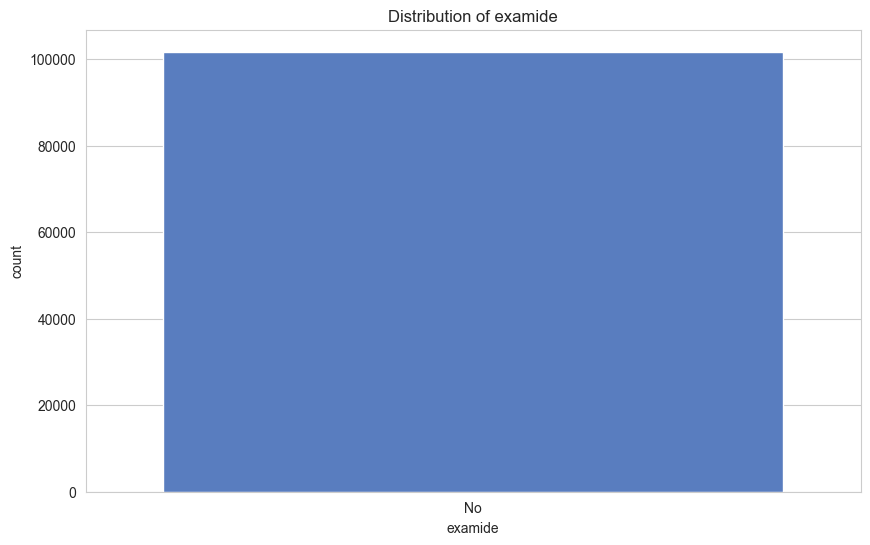

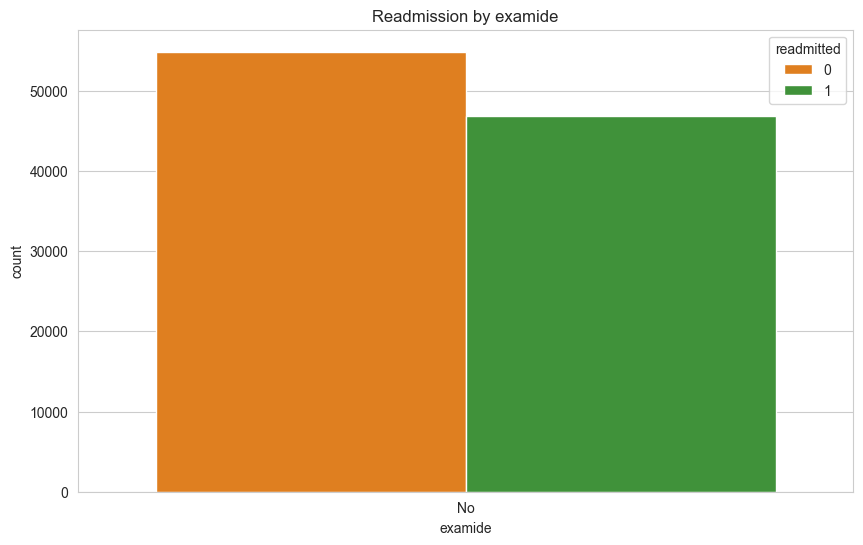

In [87]:
#plot the distribution of examide
plt.figure(figsize=(10, 6))
sns.countplot(x='examide', hue='examide', data=df, palette='muted',legend=False)
plt.title('Distribution of examide')

# plot to see the relation between examide and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='examide', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by examide')

[0.4608808442898414]


Text(0.5, 1.0, 'Readmission percentage by examide')

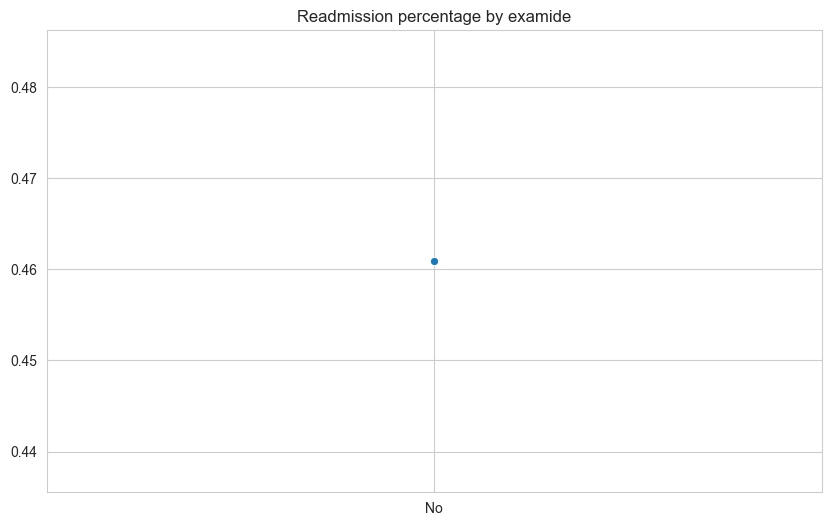

In [88]:
# readmission percentage by examide
print(readmission_percentage('examide'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['examide'].unique(),y=readmission_percentage('examide'),marker='o')
plt.title('Readmission percentage by examide')

We have no data for analyzing this attribute

## citoglipton

Text(0.5, 1.0, 'Readmission by citoglipton')

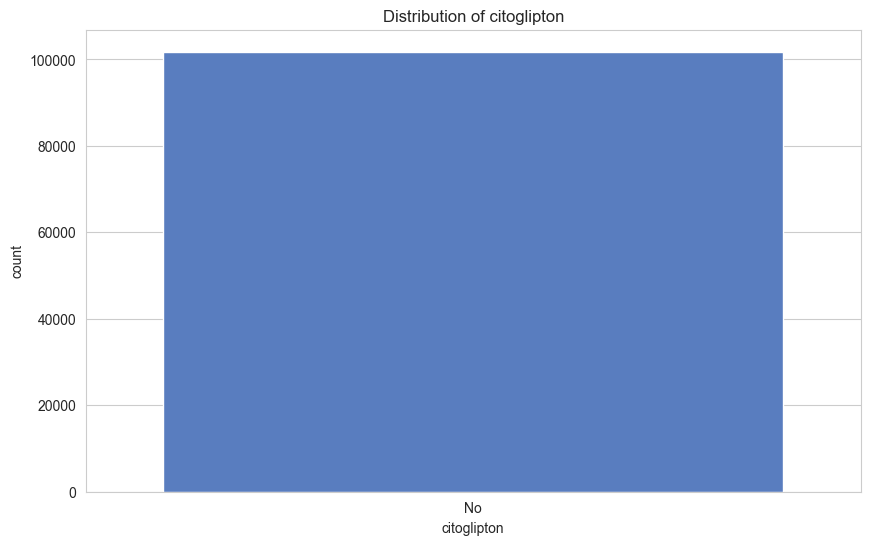

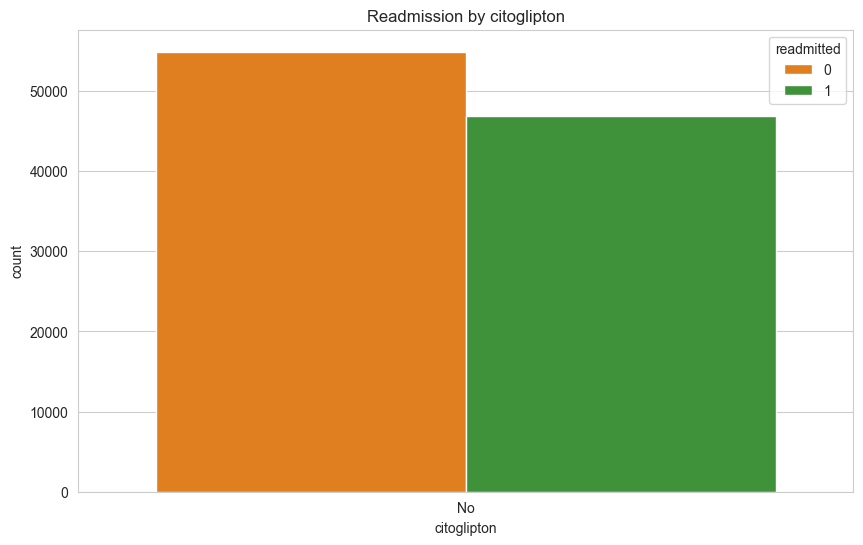

In [89]:
#plot the distribution of citoglipton
plt.figure(figsize=(10, 6))
sns.countplot(x='citoglipton', hue='citoglipton', data=df, palette='muted',legend=False)
plt.title('Distribution of citoglipton')

# plot to see the relation between citoglipton and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='citoglipton', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by citoglipton')

[0.4608808442898414]


Text(0.5, 1.0, 'Readmission percentage by citoglipton')

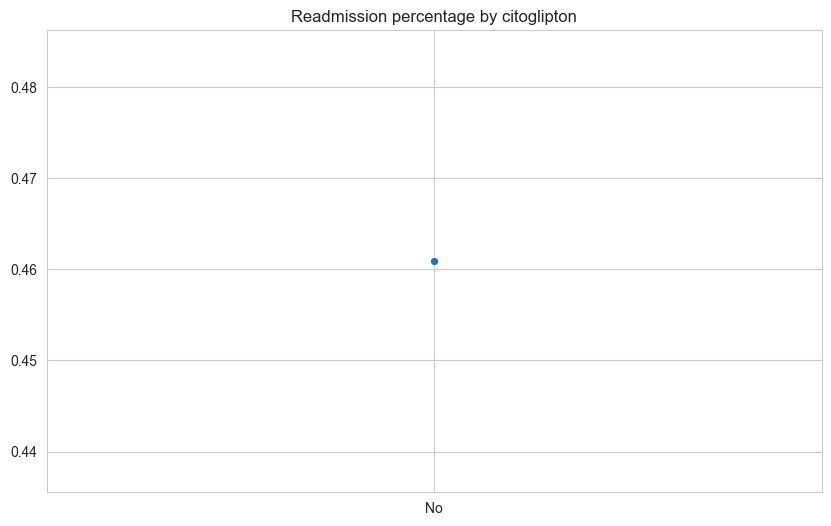

In [90]:
# readmission percentage by citoglipton
print(readmission_percentage('citoglipton'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['citoglipton'].unique(),y=readmission_percentage('citoglipton'),marker='o')
plt.title('Readmission percentage by citoglipton')

We have no data for analyzing this attribute

## insulin

Text(0.5, 1.0, 'Readmission by insulin')

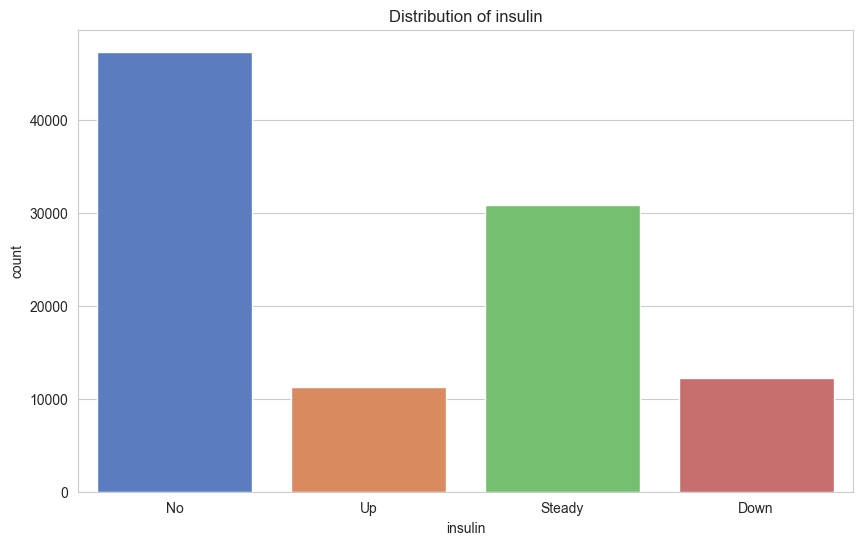

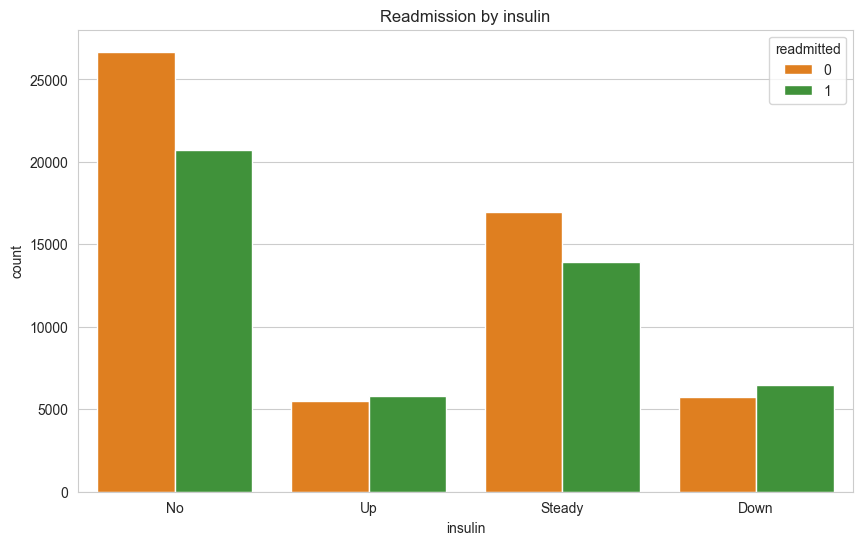

In [91]:
#plot the distribution of insulin
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='insulin', data=df, palette='muted',legend=False)
plt.title('Distribution of insulin')

# plot to see the relation between insulin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by insulin')

[0.43697106557204063, 0.5153764581124072, 0.45106810593536256, 0.5279096415125225]


Text(0.5, 1.0, 'Readmission percentage by insulin')

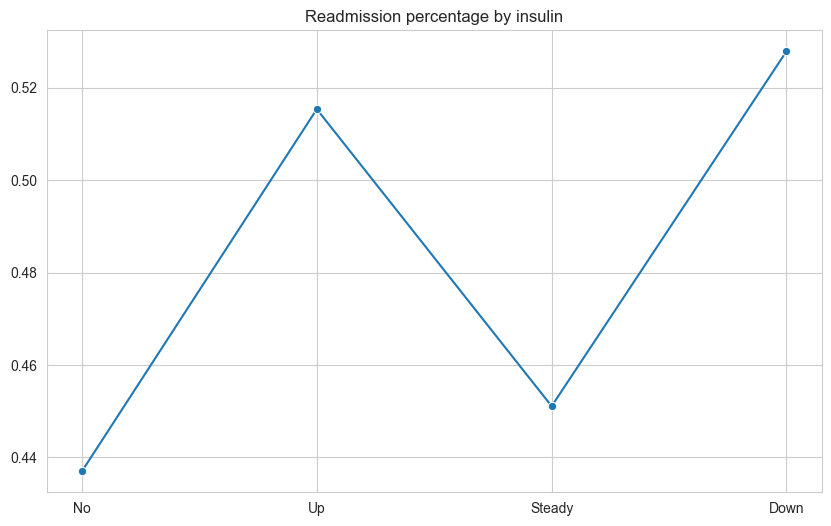

In [92]:
# readmission percentage by insulin
print(readmission_percentage('insulin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['insulin'].unique(),y=readmission_percentage('insulin'),marker='o')
plt.title('Readmission percentage by insulin')

The prescription for insulin results the admission rate significantly go up when increase the dosage. The line go down when keeping the dosage steady and then reach the top when decrease the dosage.

## glyburide-metformin

Text(0.5, 1.0, 'Readmission by glyburide-metformin')

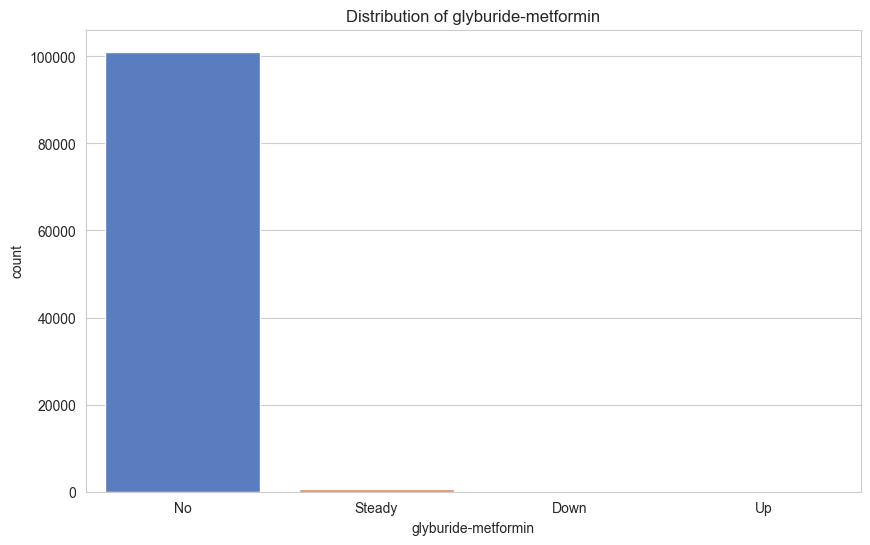

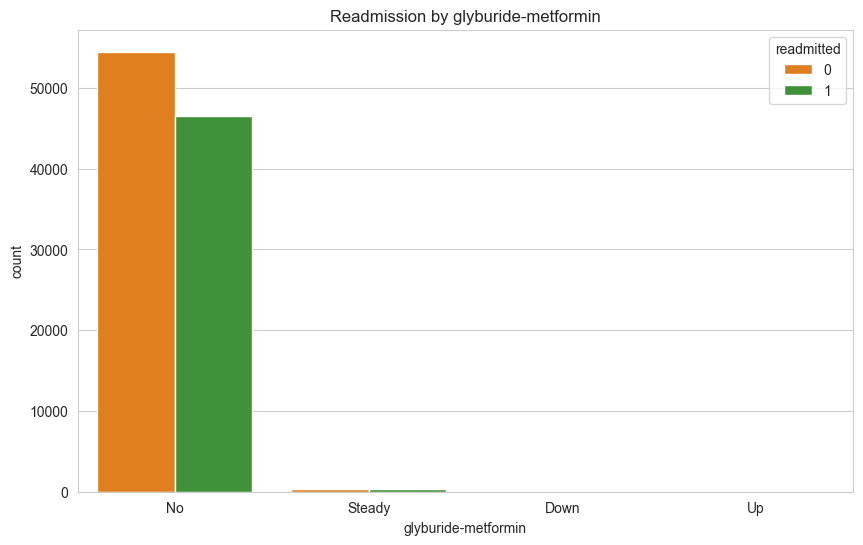

In [93]:
#plot the distribution of glyburide-metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide-metformin', hue='glyburide-metformin', data=df, palette='muted',legend=False)
plt.title('Distribution of glyburide-metformin')

# plot to see the relation between glyburide-metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glyburide-metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glyburide-metformin')

[0.46077577676627746, 0.48265895953757226, 0.16666666666666666, 0.125]


Text(0.5, 1.0, 'Readmission percentage by glyburide-metformin')

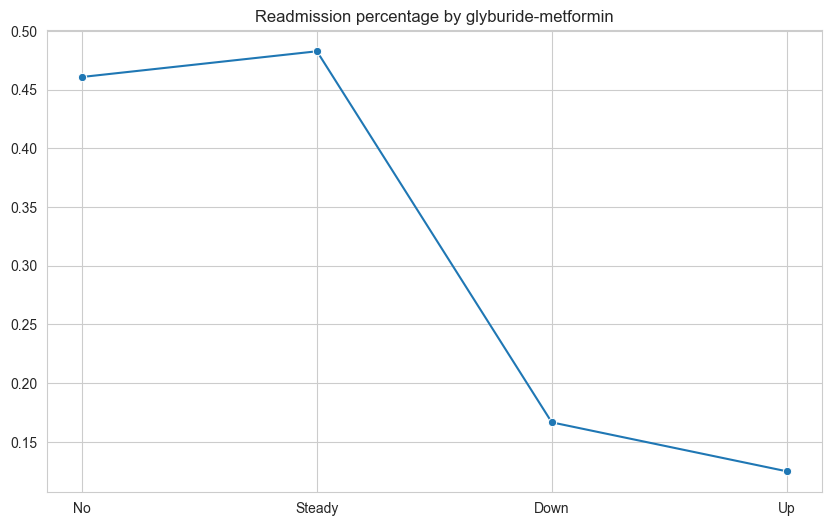

In [94]:
# readmission percentage by glyburide-metformin
print(readmission_percentage('glyburide-metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glyburide-metformin'].unique(),y=readmission_percentage('glyburide-metformin'),marker='o')
plt.title('Readmission percentage by glyburide-metformin')

The prescription for glyburide-metformin results the admission rate go up when keeping the dosage steady. It significantly go down when decrease the dosage then reach the bottom when increase the dosage.

## glipizide-metformin

Text(0.5, 1.0, 'Readmission by glipizide-metformin')

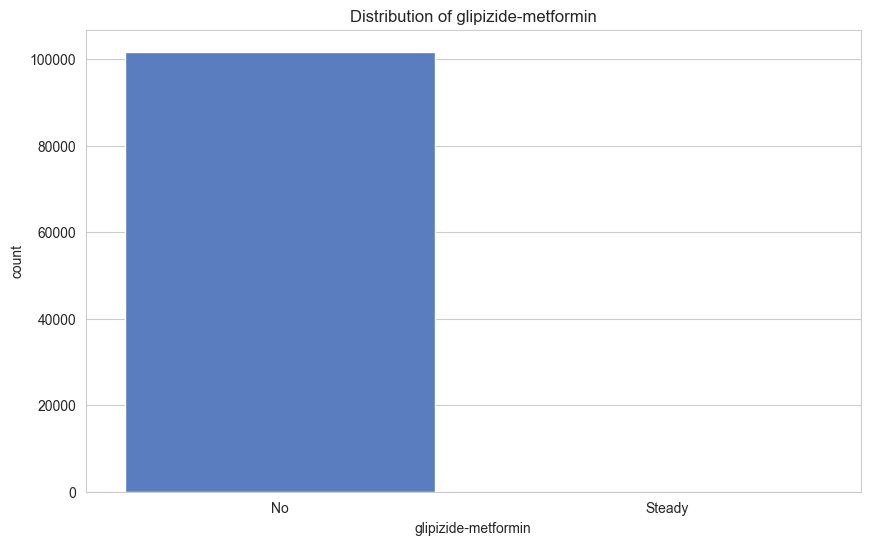

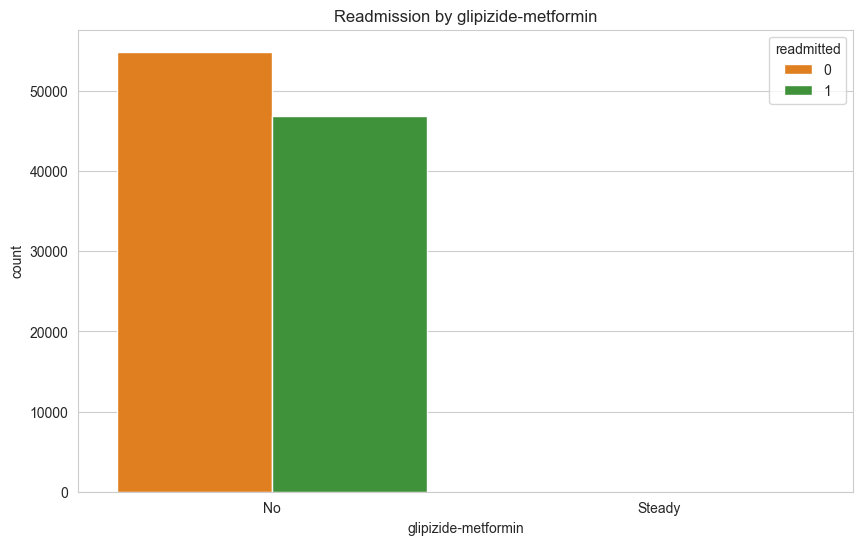

In [95]:
#plot the distribution of glipizide-metformin
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide-metformin', hue='glipizide-metformin', data=df, palette='muted',legend=False)
plt.title('Distribution of glipizide-metformin')

# plot to see the relation between glipizide-metformin and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glipizide-metformin', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glipizide-metformin')

[0.46086110483229, 0.6153846153846154]


Text(0.5, 1.0, 'Readmission percentage by glipizide-metformin')

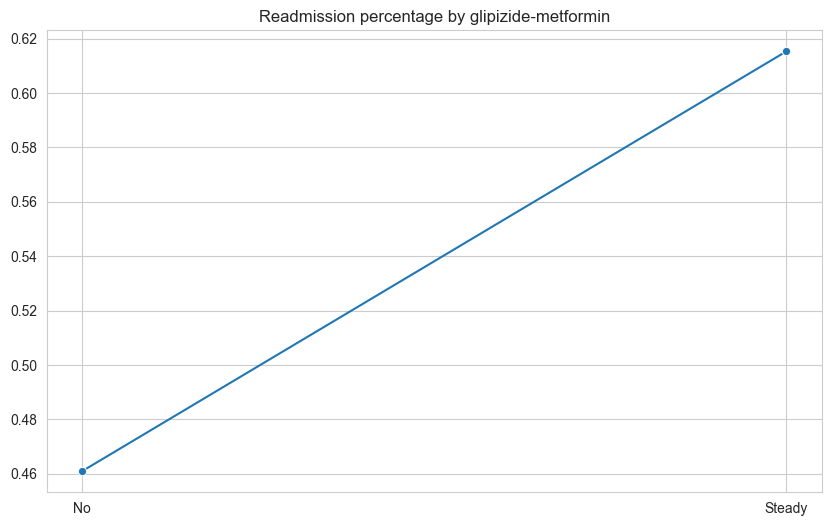

In [96]:
# readmission percentage by glipizide-metformin
print(readmission_percentage('glipizide-metformin'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glipizide-metformin'].unique(),y=readmission_percentage('glipizide-metformin'),marker='o')
plt.title('Readmission percentage by glipizide-metformin')

The prescription for glipizide-metformin results the admission rate go up when keeping the dosage steady.

## glimepiride-pioglitazone

Text(0.5, 1.0, 'Readmission by glimepiride-pioglitazone')

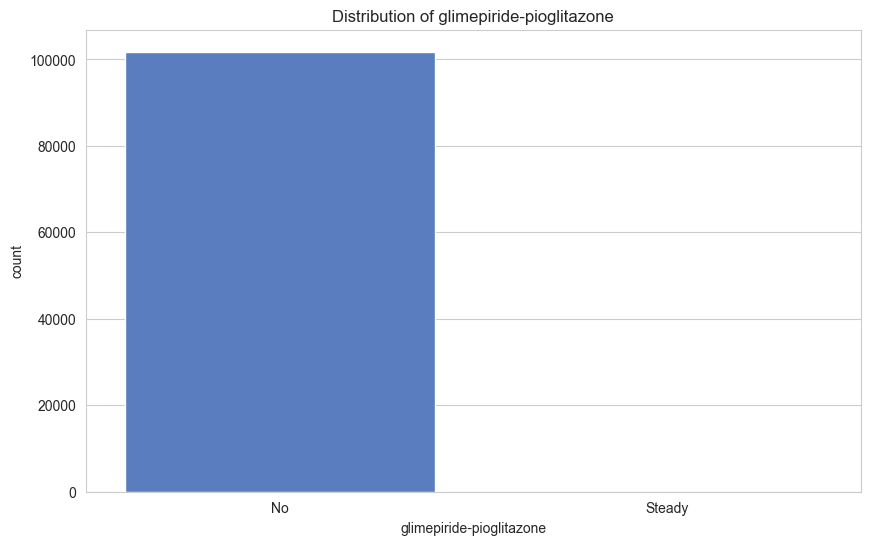

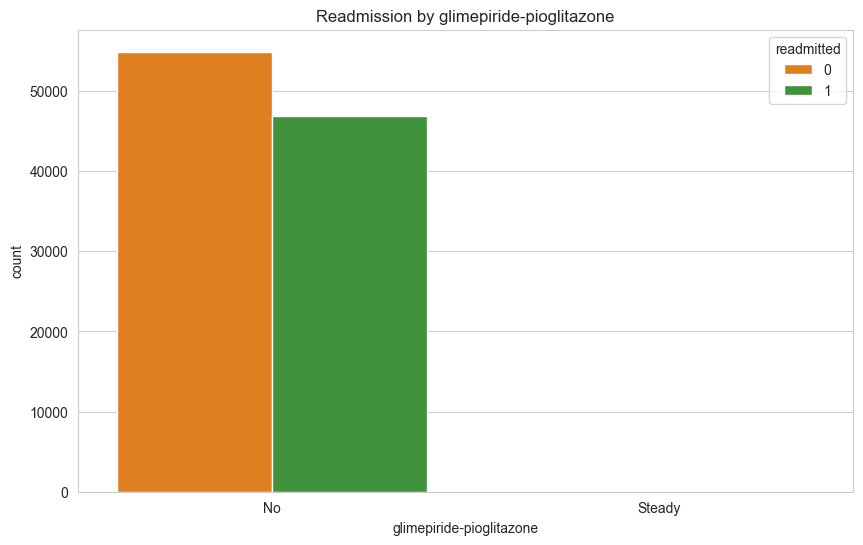

In [97]:
#plot the distribution of glimepiride-pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride-pioglitazone', hue='glimepiride-pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of glimepiride-pioglitazone')

# plot to see the relation between glimepiride-pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='glimepiride-pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by glimepiride-pioglitazone')

[0.4608755466024665, 1.0]


Text(0.5, 1.0, 'Readmission percentage by glimepiride-pioglitazone')

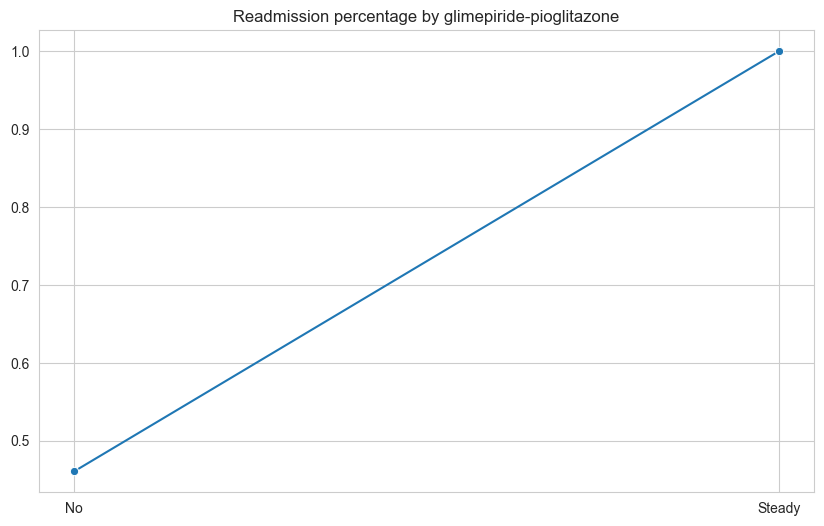

In [98]:
# readmission percentage by glimepiride-pioglitazone
print(readmission_percentage('glimepiride-pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['glimepiride-pioglitazone'].unique(),y=readmission_percentage('glimepiride-pioglitazone'),marker='o')
plt.title('Readmission percentage by glimepiride-pioglitazone')

The prescription for glimepiride-pioglitazone results the admission rate go up when keeping the dosage steady.

## metformin-rosiglitazone

Text(0.5, 1.0, 'Readmission by metformin-rosiglitazone')

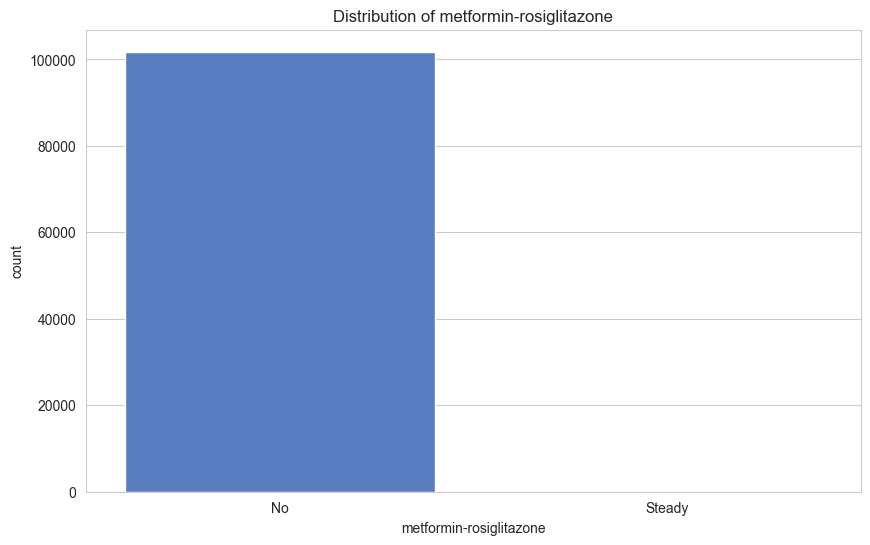

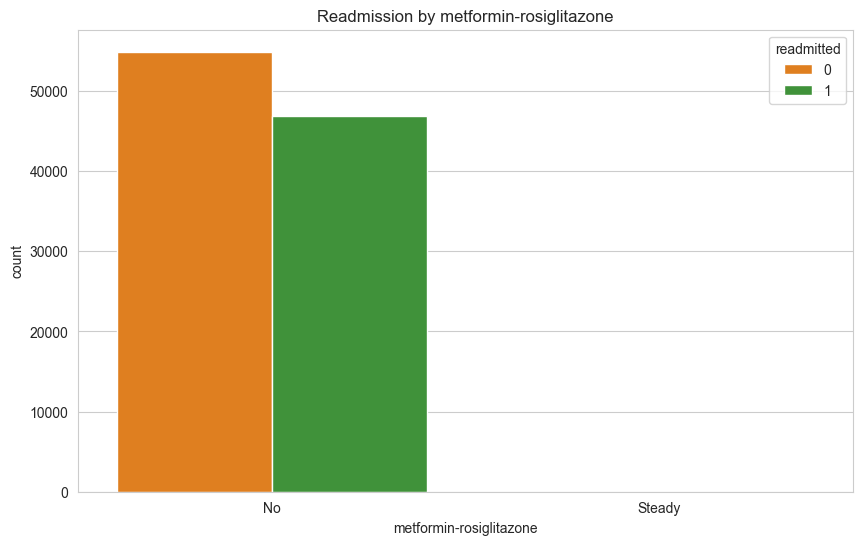

In [99]:
#plot the distribution of metformin-rosiglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-rosiglitazone', hue='metformin-rosiglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of metformin-rosiglitazone')

# plot to see the relation between metformin-rosiglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-rosiglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin-rosiglitazone')

[0.4608899021264887, 0.0]


Text(0.5, 1.0, 'Readmission percentage by metformin-rosiglitazone')

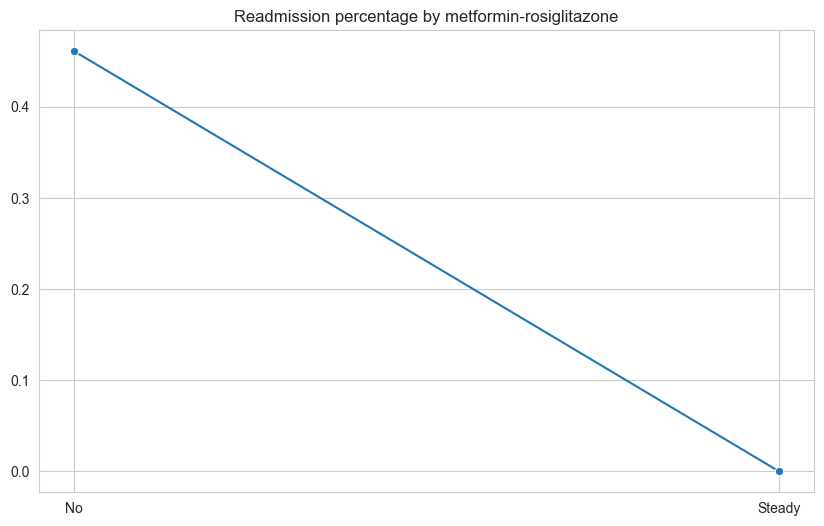

In [100]:
# readmission percentage by metformin-rosiglitazone
print(readmission_percentage('metformin-rosiglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin-rosiglitazone'].unique(),y=readmission_percentage('metformin-rosiglitazone'),marker='o')
plt.title('Readmission percentage by metformin-rosiglitazone')

The prescription for metformin-rosiglitazone results the admission rate go down when keeping the dosage steady.

## metformin-pioglitazone

Text(0.5, 1.0, 'Readmission by metformin-pioglitazone')

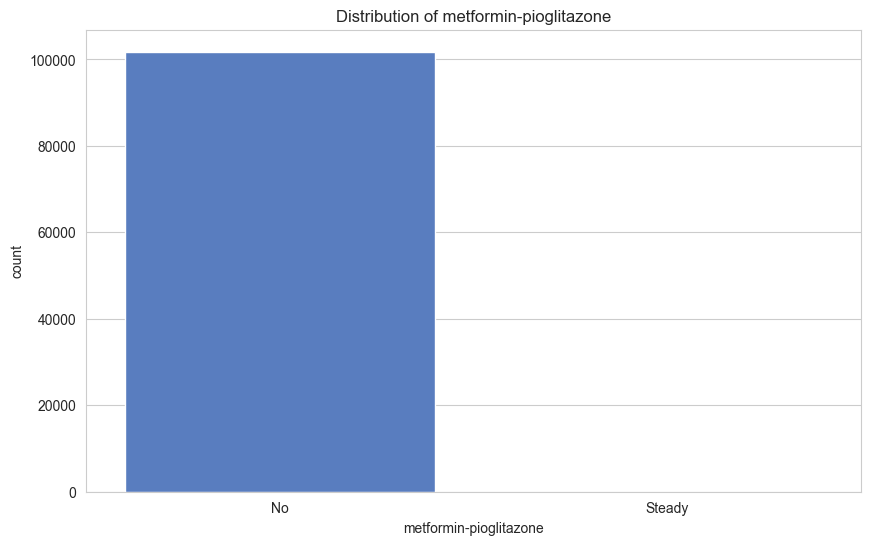

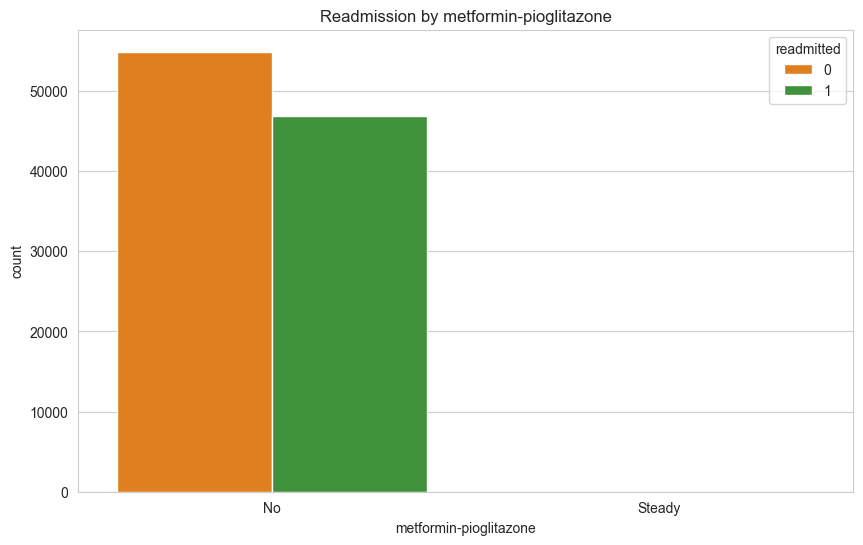

In [101]:
#plot the distribution of metformin-pioglitazone
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-pioglitazone', hue='metformin-pioglitazone', data=df, palette='muted',legend=False)
plt.title('Distribution of metformin-pioglitazone')

# plot to see the relation between metformin-pioglitazone and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin-pioglitazone', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by metformin-pioglitazone')

[0.46088537316366135, 0.0]


Text(0.5, 1.0, 'Readmission percentage by metformin-pioglitazone')

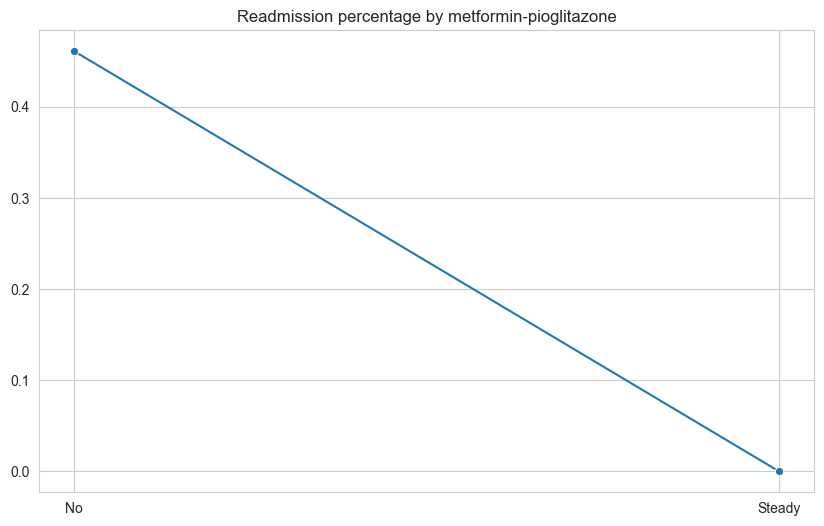

In [102]:
# readmission percentage by metformin-pioglitazone
print(readmission_percentage('metformin-pioglitazone'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['metformin-pioglitazone'].unique(),y=readmission_percentage('metformin-pioglitazone'),marker='o')
plt.title('Readmission percentage by metformin-pioglitazone')

The prescription for metformin-pioglitazone results the admission rate go down when keeping the dosage steady.

C:\Users\buiha\AppData\Local\Temp\ipykernel_17936\4285248673.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['change'].replace(())


Text(0.5, 1.0, 'Readmission by change')

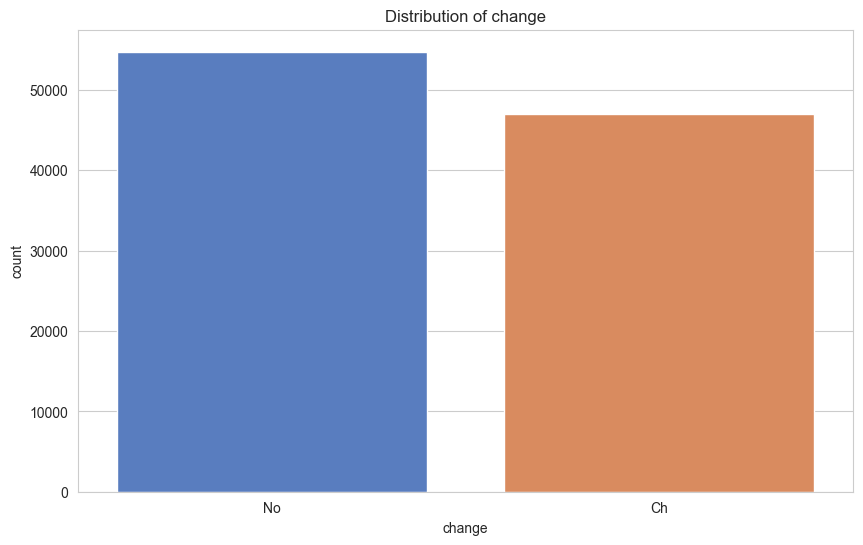

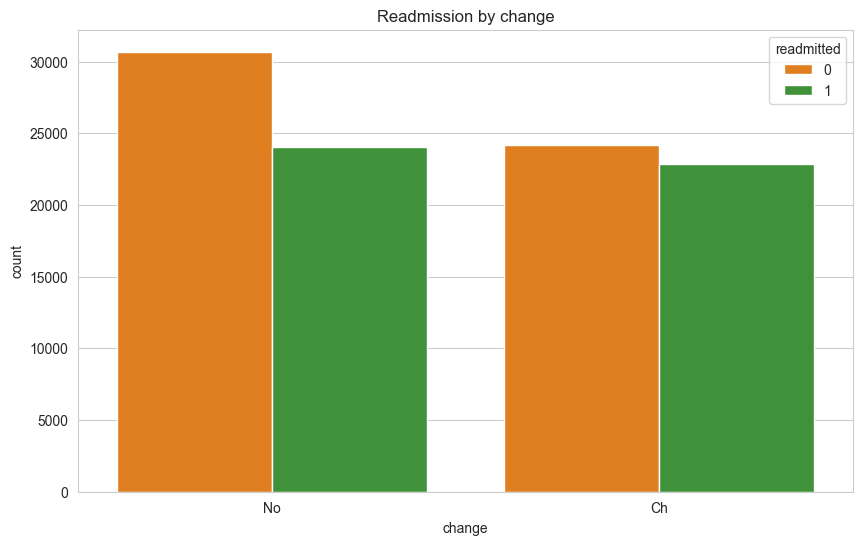

In [103]:
#plot the distribution of change
plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='change', data=df, palette='muted',legend=False)
plt.title('Distribution of change')

df['change'].replace(())

# plot to see the relation between change and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by change')

[0.4396310839192768, 0.4856310225266427]


Text(0.5, 1.0, 'Readmission percentage by change')

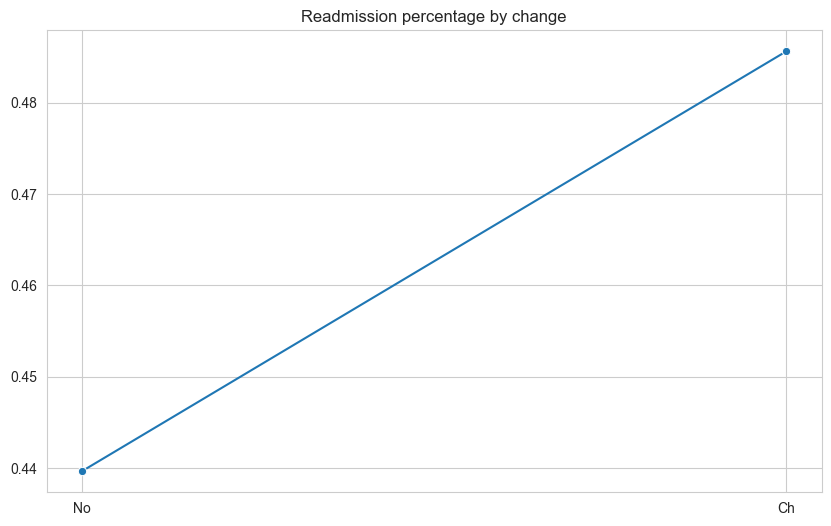

In [104]:
# readmission percentage by change
print(readmission_percentage('change'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['change'].unique(),y=readmission_percentage('change'),marker='o')
plt.title('Readmission percentage by change')

Based on the line we can see that the reatmission rate increase when the medication of the patient changed.  That means the patients have the higher percentages when their medication is changed.

Text(0.5, 1.0, 'Readmission by diabetesMed')

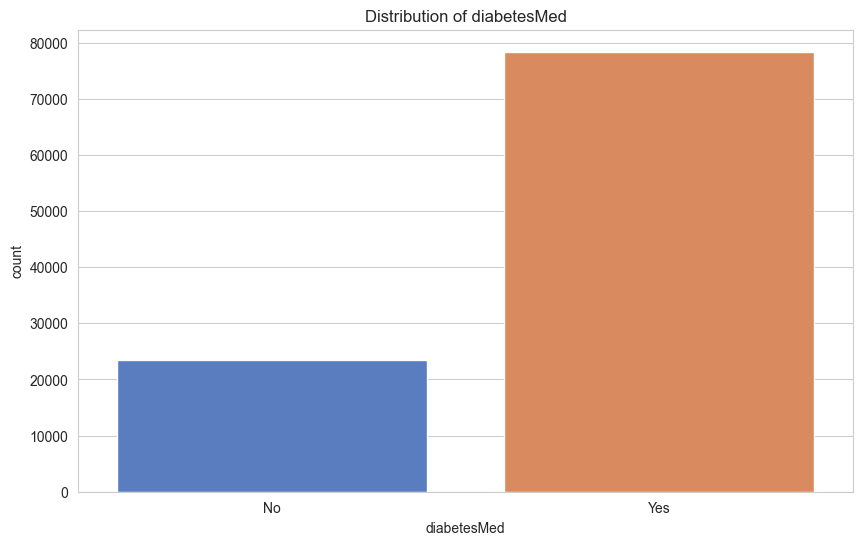

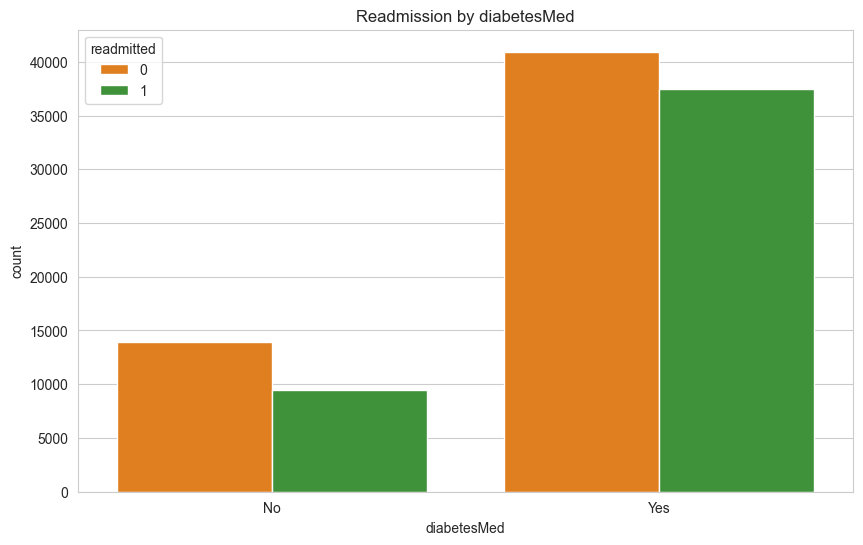

In [105]:
#plot the distribution of diabetesMed
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='diabetesMed', data=df, palette='muted',legend=False)
plt.title('Distribution of diabetesMed')

# plot to see the relation between diabetesMed and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by diabetesMed')

[0.40477716532068536, 0.47763612929571353]


Text(0.5, 1.0, 'Readmission percentage by diabetesMed')

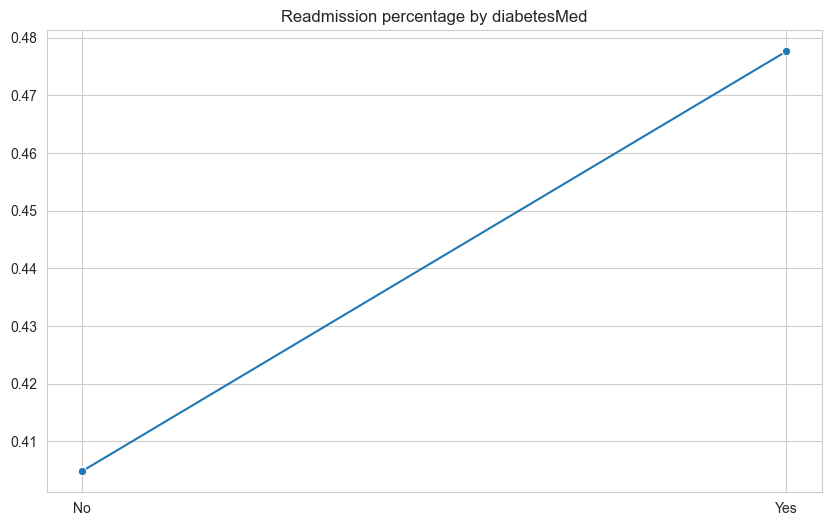

In [106]:
# readmission percentage by diabetesMed
print(readmission_percentage('diabetesMed'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['diabetesMed'].unique(),y=readmission_percentage('diabetesMed'),marker='o')
plt.title('Readmission percentage by diabetesMed')

Based on the line we can see that the reatmission rate increase when the patient have their diabetes medicaition

# Handling Outliers

In [107]:
df_new = df.copy()
summary(df_new)

dtypes  missing#  missing%  unique   count
encounter_id               int64         0  0.000000  101766  101766
patient_nbr                int64         0  0.000000   71518  101766
gender                    object         3  0.000029       3  101766
age                       object         0  0.000000      10  101766
admission_type_id          int64         0  0.000000       8  101766
discharge_disposition_id   int64         0  0.000000      26  101766
admission_source_id        int64         0  0.000000      17  101766
time_in_hospital           int64         0  0.000000      14  101766
num_procedures             int64         0  0.000000       7  101766
number_outpatient          int64         0  0.000000      39  101766
number_emergency           int64         0  0.000000      33  101766
number_inpatient           int64         0  0.000000      21  101766
diag_1                    object        21  0.000206     717  101766
diag_2                    object       358  0.003518     749  101766
diag_3                    object      1423  0.013983     790  101766
number_diagnoses           int64         0  0.000000      16  101766
metformin                 object         0  0.000000       4  101766
repaglinide               object         0  0.000000       4  101766
nateglinide               object         0  0.000000       4  101766
chlorpropamide            object         0  0.000000       4  101766
glimepiride               object         0  0.000000       4  101766
acetohexamide             object         0  0.000000       2  101766
glipizide                 object         0  0.000000       4  101766
glyburide                 object         0  0.000000       4  101766
tolbutamide               object         0  0.000000       2  101766
pioglitazone              object         0  0.000000       4  101766
rosiglitazone             object         0  0.000000       4  101766
acarbose                  object         0  0.000000       4  101766
miglitol                  object         0  0.000000       4  101766
troglitazone              object         0  0.000000       2  101766
tolazamide                object         0  0.000000       3  101766
examide                   object         0  0.000000       1  101766
citoglipton               object         0  0.000000       1  101766
insulin                   object         0  0.000000       4  101766
glyburide-metformin       object         0  0.000000       4  101766
glipizide-metformin       object         0  0.000000       2  101766
glimepiride-pioglitazone  object         0  0.000000       2  101766
metformin-rosiglitazone   object         0  0.000000       2  101766
metformin-pioglitazone    object         0  0.000000       2  101766
change                    object         0  0.000000       2  101766
diabetesMed               object         0  0.000000       2  101766
readmitted                 int64         0  0.000000       2  101766
encounter_num              int64         0  0.000000      25  101766

In [108]:
# impute missing values for diag_1, diag_2, diag_3, gender
df_new['diag_1'].replace('?',np.nan,inplace=True)
df_new['diag_2'].replace('?',np.nan,inplace=True)
df_new['diag_3'].replace('?',np.nan,inplace=True)
df_new['gender'].replace('Unknown/Invalid',np.nan,inplace=True)

df_new.head()

encounter_id  patient_nbr  gender      age  admission_type_id  \
0       2278392      8222157  Female   [0-10)                  6   
1        149190     55629189  Female  [10-20)                  1   
2         64410     86047875  Female  [20-30)                  1   
3        500364     82442376    Male  [30-40)                  1   
4         16680     42519267    Male  [40-50)                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_procedures  number_outpatient  number_emergency  number_inpatient  \
0               0                  0                 0                 0   
1               0                  0                 0                 0   
2               5                  2                 0                 1   
3               1                  0                 0                 0   
4               0                  0                 0                 0   

   diag_1  diag_2 diag_3  number_diagnoses metformin repaglinide nateglinide  \
0  250.83     NaN    NaN                 1        No          No          No   
1     276  250.01    255                 9        No          No          No   
2     648     250    V27                 6        No          No          No   
3       8  250.43    403                 7        No          No          No   
4     197     157    250                 5        No          No          No   

  chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide  \
0             No          No            No        No        No          No   
1             No          No            No        No        No          No   
2             No          No            No    Steady        No          No   
3             No          No            No        No        No          No   
4             No          No            No    Steady        No          No   

  pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide  \
0           No            No       No       No           No         No   
1           No            No       No       No           No         No   
2           No            No       No       No           No         No   
3           No            No       No       No           No         No   
4           No            No       No       No           No         No   

  examide citoglipton insulin glyburide-metformin glipizide-metformin  \
0      No          No      No                  No                  No   
1      No          No      Up                  No                  No   
2      No          No      No                  No                  No   
3      No          No      Up                  No                  No   
4      No          No  Steady                  No                  No   

  glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
0                       No                      No                     No   
1                       No                      No                     No   
2                       No                      No                     No   
3                       No                      No                     No   
4                       No                      No                     No   

  change diabetesMed  readmitted  encounter_num  
0     No          No           0              1  
1     Ch         Yes           1              1  
2     No         Yes           0              1  
3     Ch         Yes           0              1  
4     Ch         Yes           0              1

In [109]:
#imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_new['diag_1'] = imputer.fit_transform(df_new[['diag_1']]).ravel()
df_new['diag_2'] = imputer.fit_transform(df_new[['diag_2']]).ravel()
df_new['diag_3'] = imputer.fit_transform(df_new[['diag_3']]).ravel()
df_new['gender'] = imputer.fit_transform(df_new[['gender']]).ravel()

summary(df_new)

dtypes  missing#  missing%  unique   count
encounter_id               int64         0       0.0  101766  101766
patient_nbr                int64         0       0.0   71518  101766
gender                    object         0       0.0       2  101766
age                       object         0       0.0      10  101766
admission_type_id          int64         0       0.0       8  101766
discharge_disposition_id   int64         0       0.0      26  101766
admission_source_id        int64         0       0.0      17  101766
time_in_hospital           int64         0       0.0      14  101766
num_procedures             int64         0       0.0       7  101766
number_outpatient          int64         0       0.0      39  101766
number_emergency           int64         0       0.0      33  101766
number_inpatient           int64         0       0.0      21  101766
diag_1                    object         0       0.0     716  101766
diag_2                    object         0       0.0     748  101766
diag_3                    object         0       0.0     789  101766
number_diagnoses           int64         0       0.0      16  101766
metformin                 object         0       0.0       4  101766
repaglinide               object         0       0.0       4  101766
nateglinide               object         0       0.0       4  101766
chlorpropamide            object         0       0.0       4  101766
glimepiride               object         0       0.0       4  101766
acetohexamide             object         0       0.0       2  101766
glipizide                 object         0       0.0       4  101766
glyburide                 object         0       0.0       4  101766
tolbutamide               object         0       0.0       2  101766
pioglitazone              object         0       0.0       4  101766
rosiglitazone             object         0       0.0       4  101766
acarbose                  object         0       0.0       4  101766
miglitol                  object         0       0.0       4  101766
troglitazone              object         0       0.0       2  101766
tolazamide                object         0       0.0       3  101766
examide                   object         0       0.0       1  101766
citoglipton               object         0       0.0       1  101766
insulin                   object         0       0.0       4  101766
glyburide-metformin       object         0       0.0       4  101766
glipizide-metformin       object         0       0.0       2  101766
glimepiride-pioglitazone  object         0       0.0       2  101766
metformin-rosiglitazone   object         0       0.0       2  101766
metformin-pioglitazone    object         0       0.0       2  101766
change                    object         0       0.0       2  101766
diabetesMed               object         0       0.0       2  101766
readmitted                 int64         0       0.0       2  101766
encounter_num              int64         0       0.0      25  101766

In [110]:
# Handling Outliers

num_col = df_new.select_dtypes(exclude=['object']).columns.to_list()
num_col.remove('readmitted')
num_col.remove('encounter_id')
num_col.remove('patient_nbr')
num_col.remove('admission_type_id')
num_col.remove('discharge_disposition_id')
num_col.remove('admission_source_id')

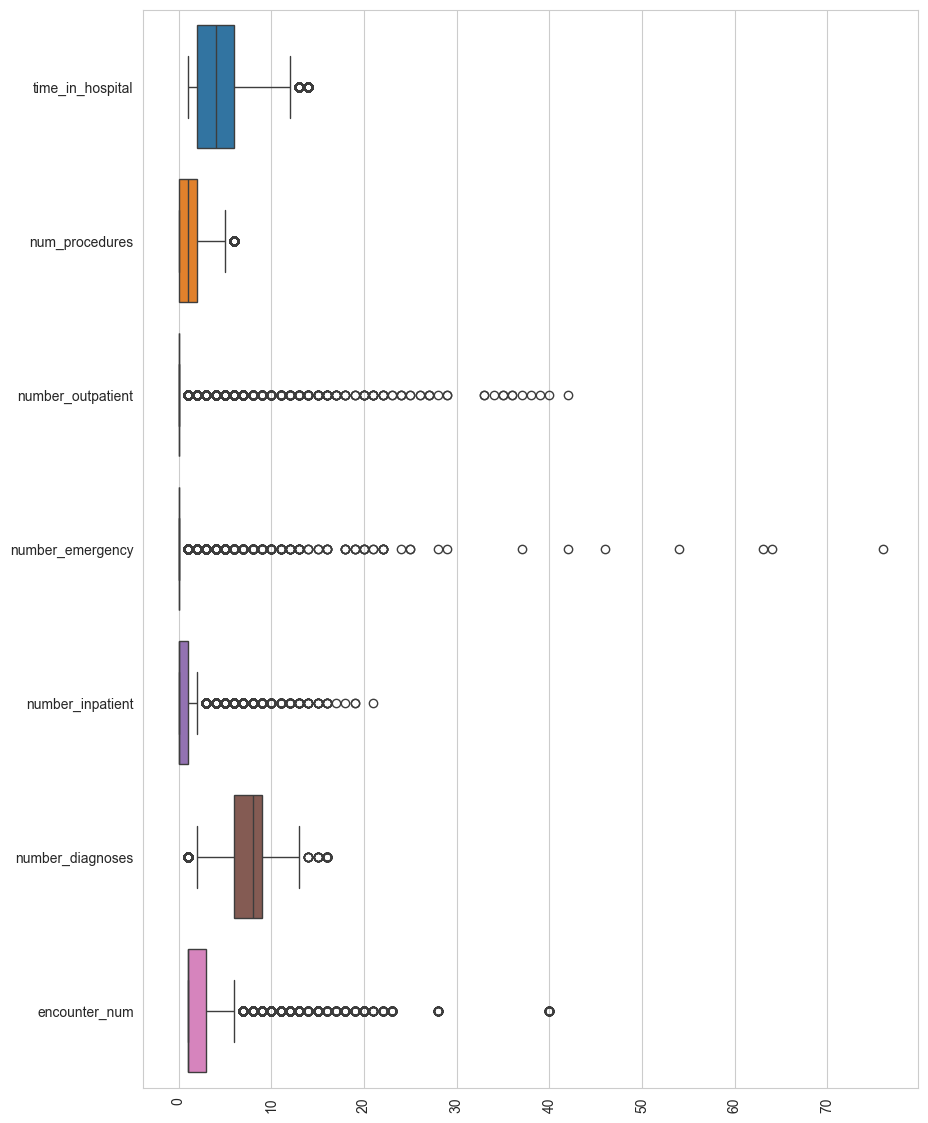

{'time_in_hospital': 2252,
 'num_procedures': 4954,
 'number_outpatient': 16739,
 'number_emergency': 11383,
 'number_inpatient': 7049,
 'number_diagnoses': 281,
 'encounter_num': 4824}

In [111]:
# plot boxplot for numeric features
plt.figure(figsize=(10, 14))
# make the plot horizontal
sns.boxplot(data=df_new[num_col],vert=False,orient='h')
plt.xticks(rotation=90)
plt.show()


# Based on those boxplots, we count the number of outliers for each feature
outlier_count = {}
for i in num_col:
    q1 = df_new[i].quantile(0.25)
    q3 = df_new[i].quantile(0.75)
    iqr = q3 - q1
    outlier_count[i] = len(df_new[(df_new[i] < (q1 - 1.5 * iqr)) | (df_new[i] > (q3 + 1.5 * iqr))])
outlier_count

In [112]:


# Define a function to handle outliers using a threshold (e.g., 3 standard deviations)
def handle_outliers(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = np.abs(z_scores) > threshold
    data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)

# Apply the function to each numerical column
for col in num_col:
    handle_outliers(df_new, col)
outlier_count = {}
for i in num_col:
    q1 = df_new[i].quantile(0.25)
    q3 = df_new[i].quantile(0.75)
    iqr = q3 - q1
    outlier_count[i] = len(df_new[(df_new[i] < (q1 - 1.5 * iqr)) | (df_new[i] > (q3 + 1.5 * iqr))])
print("After handling outlier: ",outlier_count)
print(df_new.shape)

After handling outlier:  {'time_in_hospital': 1210, 'num_procedures': 4954, 'number_outpatient': 15282, 'number_emergency': 9719, 'number_inpatient': 5033, 'number_diagnoses': 0, 'encounter_num': 14312}
(101766, 43)


C:\Users\buiha\AppData\Local\Temp\ipykernel_17936\440967600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)
C:\Users\buiha\AppData\Local\Temp\ipykernel_17936\440967600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)
C:\Users\buiha\AppData\Local\Temp\ipykernel_17936\440967600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



# Train Model with data

In [113]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in df_new.columns:
    if df_new[col].dtype == 'object':
        le = LabelEncoder()
        df_new[col] = le.fit_transform(df_new[col])
df_new.head()

encounter_id  patient_nbr  gender  age  admission_type_id  \
0       2278392      8222157       0    0                  6   
1        149190     55629189       0    1                  1   
2         64410     86047875       0    2                  1   
3        500364     82442376       1    3                  1   
4         16680     42519267       1    4                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                        25                    1                 1   
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   

   num_procedures  number_outpatient  number_emergency  number_inpatient  \
0               0                  0                 0                 0   
1               0                  0                 0                 0   
2               5                  2                 0                 1   
3               1                  0                 0                 0   
4               0                  0                 0                 0   

   diag_1  diag_2  diag_3  number_diagnoses  metformin  repaglinide  \
0     124     133      86                 8          1            1   
1     143      79     121                 9          1            1   
2     454      78     766                 6          1            1   
3     554      97     248                 7          1            1   
4      54      24      86                 5          1            1   

   nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  \
0            1               1            1              0          1   
1            1               1            1              0          1   
2            1               1            1              0          2   
3            1               1            1              0          1   
4            1               1            1              0          2   

   glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  \
0          1            0             1              1         1         1   
1          1            0             1              1         1         1   
2          1            0             1              1         1         1   
3          1            0             1              1         1         1   
4          1            0             1              1         1         1   

   troglitazone  tolazamide  examide  citoglipton  insulin  \
0             0           0        0            0        1   
1             0           0        0            0        3   
2             0           0        0            0        1   
3             0           0        0            0        3   
4             0           0        0            0        2   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                    1                    0                         0   
1                    1                    0                         0   
2                    1                    0                         0   
3                    1                    0                         0   
4                    1                    0                         0   

   metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  \
0                        0                       0       1            0   
1                        0                       0       0            1   
2                        0                       0       1            1   
3                        0                       0       0            1   
4                        0                       0       0            1   

   readmitted  encounter_num  
0           0              1  
1           1              1  
2           0              1  
3           0     

In [114]:
# train test split
from sklearn.model_selection import train_test_split
df_train = df_new.copy().iloc[:40000,:]
X = df_train.drop('readmitted',axis=1)
y = df_train['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# check the shape of train and test data
print(X_train.shape)
print(X_test.shape)




(28000, 42)
(12000, 42)


In [115]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Feature Selection

In [116]:
# Feature selection using SelectKBest with chi-squared test
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(chi2, k=15)  # You can specify the number of top features with k
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

#get those selected features
mask = k_best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_features.append(feature)
new_features

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_3',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'encounter_num']

In [117]:
# # Train KNN model with feature selection
# from sklearn.neighbors import KNeighborsClassifier

# k = round(np.sqrt(len(X_train)))
# knn = KNeighborsClassifier(n_neighbors=250, n_jobs=-1, weights='distance', p=2, metric='minkowski', leaf_size=30, algorithm='auto')

# # Train a model on the selected features and evaluate its performance
# knn.fit(X_train_selected, y_train)
# y_pred = knn.predict(X_test_selected)



In [118]:
# # Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))

# # plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(4, 3))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# Neural Network

In [119]:
# df_train_ANN = df_new.copy()
# X = df_train_ANN.drop('readmitted',axis=1)
# y = df_train_ANN['readmitted']
# X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# # scale the data
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [120]:
# # using ANN
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout,ActivityRegularization
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l1,l2


# # create model
# model = Sequential()
# model.add(Dense(1286, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))

# #possible values for activation function

# # compile model
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# # early stopping
# early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# # train model
# model.fit(x=X_train_scaled,y=y_train.values,epochs=100,validation_data=(X_test_scaled,y_test.values),callbacks=[early_stop])

# # evaluate model
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()
# plt.show()

# Comparing to the previous version - without new feature (ENCOUNTER_NUM)
-------------------------------------------------------------------------------------------------------
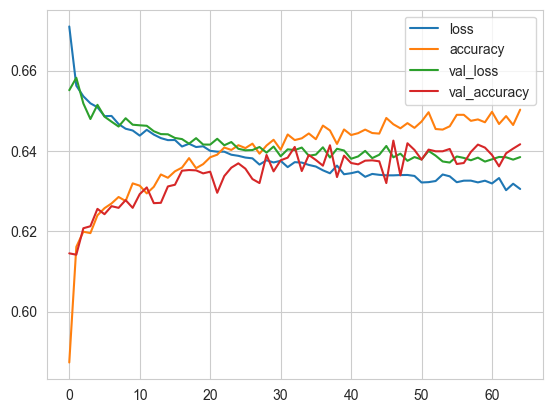
### This run has impressive improvement, the loss decrease to almost 0.63 and we got approximately 0.641 for val_acc and 0.65 for acc, The model is as followed:
#### create model
+ model = Sequential()
+ model.add(Dense(128, activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(64,activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(32,activation='relu'))
+ model.add(Dense(1,activation='sigmoid'))

#possible values for activation function

#### compile model
+ model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### early stopping
+ early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

### Unlike knn, ANN need lots of data, so we used a whole dataset instead of just 40000-50000 rows
----------------------------------------------------------------------------------------------------------



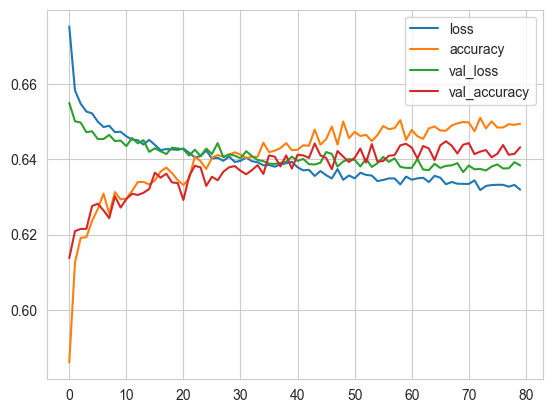
# Code for this version
#### create model
+ model = Sequential()
+ model.add(Dense(128, activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(64,activation='tanh'))
+ model.add(Dropout(0.5))
+ model.add(Dense(32,activation='tanh'))
+ model.add(Dense(1,activation='sigmoid'))

#possible values for activation function

#### compile model
+ model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### early stopping
+ early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
----------------------------------------------------------------------------------------------

![image-2.png](attachment:image-2.png)

This used tanh for most of layers beside output layer


# Gradient Boosting

[[14372  2192]
 [ 3822 10144]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     16564
           1       0.82      0.73      0.77     13966

    accuracy                           0.80     30530
   macro avg       0.81      0.80      0.80     30530
weighted avg       0.80      0.80      0.80     30530

0.8030134294136915


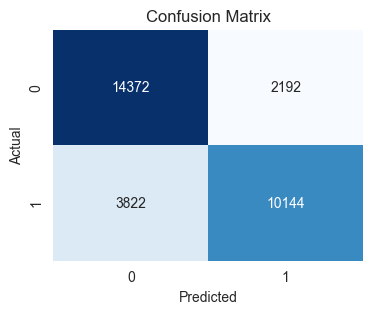

In [121]:
# Using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# data
df_train_gb = df_new.copy()
X = df_train_gb.drop('readmitted',axis=1)
y = df_train_gb['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
y_pred = gb.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


[[12165  4399]
 [ 4092  9874]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     16564
           1       0.69      0.71      0.70     13966

    accuracy                           0.72     30530
   macro avg       0.72      0.72      0.72     30530
weighted avg       0.72      0.72      0.72     30530

0.7218801179168032


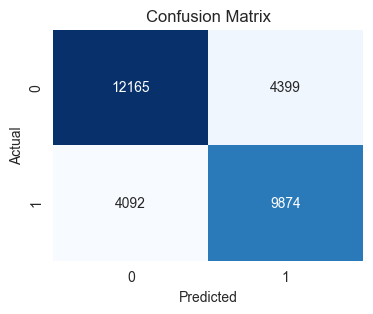

In [122]:
# Decision tree with no hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train_scaled, y_train)

y_pred = dct.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[14130  2434]
 [ 3642 10324]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     16564
           1       0.81      0.74      0.77     13966

    accuracy                           0.80     30530
   macro avg       0.80      0.80      0.80     30530
weighted avg       0.80      0.80      0.80     30530

0.8009826400262038


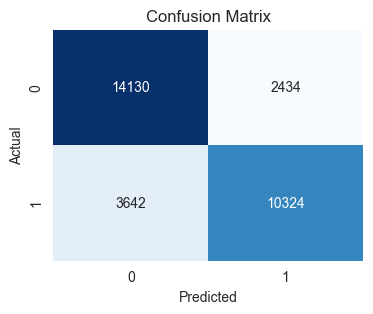

In [123]:
# Using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
